# Analysing the Attrition Rate of a Company

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -
1.	The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
2.	A sizeable department has to be maintained, for the purposes of recruiting new talent
3.	More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.


# Import libraries and dataset

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import xgboost as xgb

from sklearn.metrics import classification_report
from sklearn import metrics

sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
pd.set_option('display.max_columns',29)

In [86]:
df = pd.read_csv("general_data.csv")

# Exploring data

In [87]:
df.head()

EmployeeID  Age Attrition     BusinessTravel              Department  \
0           1   51        No      Travel_Rarely                   Sales   
1           2   31       Yes  Travel_Frequently  Research & Development   
2           3   32        No  Travel_Frequently  Research & Development   
3           4   38        No         Non-Travel  Research & Development   
4           5   32        No      Travel_Rarely  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  Gender  \
0                 6          2  Life Sciences              1  Female   
1                10          1  Life Sciences              1  Female   
2                17          4          Other              1    Male   
3                 2          5  Life Sciences              1    Male   
4                10          1        Medical              1    Male   

   JobLevel                    JobRole MaritalStatus  MonthlyIncome  \
0         1  Healthcare Representative       Married         131160   
1         1         Research Scientist        Single          41890   
2         4            Sales Executive       Married         193280   
3         3            Human Resources       Married          83210   
4         1            Sales Executive        Single          23420   

   NumCompaniesWorked Over18  PercentSalaryHike  StandardHours  \
0                 1.0      Y                 11              8   
1                 0.0      Y                 23              8   
2                 1.0      Y                 15              8   
3                 3.0      Y                 11              8   
4                 4.0      Y                 12              8   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0                1.0                      6               1   
1                 1                6.0                      3               5   
2                 3                5.0                      2               5   
3                 3               13.0                      5               8   
4                 2                9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  EnvironmentSatisfaction  \
0                        0                     0                      3.0   
1                        1                     4                      3.0   
2                        0                     3                      2.0   
3                        7                     5                      4.0   
4                        0                     4                      4.0   

   JobSatisfaction  WorkLifeBalance  JobInvolvement  PerformanceRating  
0              4.0              2.0               3                  3  
1              2.0              4.0               2                  4  
2              2.0              1.0               3                  3  
3              4.0              3.0               2                  3  
4              1.0              3.0               3                  3

In [88]:
df.tail()

EmployeeID  Age Attrition BusinessTravel              Department  \
4405        4406   42        No  Travel_Rarely  Research & Development   
4406        4407   29        No  Travel_Rarely  Research & Development   
4407        4408   25        No  Travel_Rarely  Research & Development   
4408        4409   42        No  Travel_Rarely                   Sales   
4409        4410   40        No  Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  Gender  \
4405                 5          4        Medical              1  Female   
4406                 2          4        Medical              1    Male   
4407                25          2  Life Sciences              1    Male   
4408                18          2        Medical              1    Male   
4409                28          3        Medical              1    Male   

      JobLevel                JobRole MaritalStatus  MonthlyIncome  \
4405         1     Research Scientist        Single          60290   
4406         1  Laboratory Technician      Divorced          26790   
4407         2        Sales Executive       Married          37020   
4408         1  Laboratory Technician      Divorced          23980   
4409         2  Laboratory Technician      Divorced          54680   

      NumCompaniesWorked Over18  PercentSalaryHike  StandardHours  \
4405                 3.0      Y                 17              8   
4406                 2.0      Y                 15              8   
4407                 0.0      Y                 20              8   
4408                 0.0      Y                 14              8   
4409                 0.0      Y                 12              8   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
4405                 1               10.0                      5   
4406                 0               10.0                      2   
4407                 0                5.0                      4   
4408                 1               10.0                      2   
4409                 0                NaN                      6   

      YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager  \
4405               3                        0                     2   
4406               3                        0                     2   
4407               4                        1                     2   
4408               9                        7                     8   
4409              21                        3                     9   

      EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  \
4405                      4.0              1.0              3.0   
4406                      4.0              4.0              3.0   
4407                      1.0              3.0              3.0   
4408                      4.0              1.0              3.0   
4409                      1.0              3.0              NaN   

      JobInvolvement  PerformanceRating  
4405               3                  3  
4406               2                  3  
4407               3                  4  
4408               2                  3  
4409               4                  3

In [89]:
print("Shape of the dataset:",df.shape,'\n')
print("Total number of rows (excluding column name):",df.shape[0],'\n')
print("Total number of column:",df.shape[1],'\n')
print("Columns name: ", df.columns)

Shape of the dataset: (4410, 29) 

Total number of rows (excluding column name): 4410 

Total number of column: 29 

Columns name:  Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')


#### Our dataset has 4410 rows and 29 columns.

# Null values, Dtype handling, and checking zeros

In [90]:
print(df.info(),"\n\n")
print("Checking null values: \n")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

#### Some columns has null values. By using ffill method in fillna function, we have to be replace this null vlaues.
#### Columns name which has null values are: NumCompaniesWorked, TotalWorkingYears, EnvironmentSatisfaction, JobSatisfaction, and WorkLifeBalance.
#### Also 'NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', and 'WorkLifeBalance' columns should have dtypes of int64 but it is float. We have to change it to int64. 

#### Firstly, we should handle null values then only we have to handle dtypes otherwise error will occur if we change dtype first.

## Replacing Null values

In [91]:
df.fillna(method = 'ffill', inplace=True)
print(df.isnull().sum())

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

#### All null values replaced using forward fill method of fillna function

## Handling Dtype

In [93]:
df.NumCompaniesWorked = df.NumCompaniesWorked.astype("int64")
df.TotalWorkingYears = df.TotalWorkingYears.astype("int64")
df.EnvironmentSatisfaction = df.EnvironmentSatisfaction.astype("int64")
df.JobSatisfaction = df.JobSatisfaction.astype("int64")
df.WorkLifeBalance = df.WorkLifeBalance.astype("int64")

In [94]:
df.dtypes

EmployeeID                  int64
Age                         int64
Attrition                  object
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeCount               int64
Gender                     object
JobLevel                    int64
JobRole                    object
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
Over18                     object
PercentSalaryHike           int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
EnvironmentSatisfaction     int64
JobSatisfaction             int64
WorkLifeBalance             int64
JobInvolvement              int64
PerformanceRating           int64
dtype: object

## Checking zeros

#### We have to check that some columns like Age have zero values or not. If yes then we have to remove/replace it as age of a employee can not be zero. 

In [95]:
for i in df.columns:
    print(i,len(df[df[i] == 0]))

EmployeeID 0
Age 0
Attrition 0
BusinessTravel 0
Department 0
DistanceFromHome 0
Education 0
EducationField 0
EmployeeCount 0
Gender 0
JobLevel 0
JobRole 0
MaritalStatus 0
MonthlyIncome 0
NumCompaniesWorked 588
Over18 0
PercentSalaryHike 0
StandardHours 0
StockOptionLevel 1893
TotalWorkingYears 33
TrainingTimesLastYear 162
YearsAtCompany 132
YearsSinceLastPromotion 1743
YearsWithCurrManager 789
EnvironmentSatisfaction 0
JobSatisfaction 0
WorkLifeBalance 0
JobInvolvement 0
PerformanceRating 0


#### There are 588 employees who are working for first time.
#### 1893 employees are there with stock option level as zero.
#### There are 33 employees who joined the company for first time this year only and there are 132 employees who joined this company, maybe for first time or maybe not, this year only.
#### 162 employees has not trained last year.
#### 1743 employees got promotion this year.
#### 789 employees didn't complete yet 1 year with their current manager.
### So there is no problem with zeros in this dataset.

# Exploratory data analysis

In [96]:
print(sorted(df.Age.unique()),"\n")
x = sorted(df.Age.unique())
print("Age group who are working in the company:", x[0], "-", x[-1])

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60] 

Age group who are working in the company: 18 - 60


#### Employees have age in the range of 18 to 60.
#### As (60 - 18) + 1 = 43, which means there are employees with 43 different age, ranging between 18 to 60, working in the company.

## Exploring Categorical features

In [97]:
col=['Age','Attrition','BusinessTravel','Department','Education','EducationField','Gender', 'StandardHours', 'JobLevel','JobRole','MaritalStatus','NumCompaniesWorked','Over18','StockOptionLevel','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','JobInvolvement','PerformanceRating']
for x in col:
    print('{}: {}'.format(x.upper(),sorted(df[x].unique())), "\n")

AGE: [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60] 

ATTRITION: ['No', 'Yes'] 

BUSINESSTRAVEL: ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'] 

DEPARTMENT: ['Human Resources', 'Research & Development', 'Sales'] 

EDUCATION: [1, 2, 3, 4, 5] 

EDUCATIONFIELD: ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree'] 

GENDER: ['Female', 'Male'] 

STANDARDHOURS: [8] 

JOBLEVEL: [1, 2, 3, 4, 5] 

JOBROLE: ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative'] 

MARITALSTATUS: ['Divorced', 'Married', 'Single'] 

NUMCOMPANIESWORKED: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 

OVER18: ['Y'] 

STOCKOPTIONLEVEL: [0, 1, 2, 3] 

ENVIRONMENTSATISFACTION: [1, 2, 3, 4] 

JOBSATISFACTION: [1, 2, 3, 4] 

WORKL

## Counts of each category

In [98]:
col1 = ['Age','Attrition','BusinessTravel','Department', 'EmployeeCount', 'StandardHours', 'JobRole','EducationField','Education','Gender','JobLevel','MaritalStatus','Over18']
for x in col1:
    print('{}: \n{}'.format(x.upper(),df[x].value_counts()), "\n\n")

AGE: 
35    234
34    231
31    207
36    207
29    204
32    183
30    180
33    174
38    174
40    171
37    150
27    144
28    144
42    138
39    126
45    123
41    120
26    117
44     99
46     99
43     96
50     90
24     78
25     78
47     72
49     72
55     66
53     57
51     57
48     57
54     54
52     54
22     48
58     42
23     42
56     42
21     39
20     33
59     30
19     27
18     24
60     15
57     12
Name: Age, dtype: int64 


ATTRITION: 
No     3699
Yes     711
Name: Attrition, dtype: int64 


BUSINESSTRAVEL: 
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64 


DEPARTMENT: 
Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64 


EMPLOYEECOUNT: 
1    4410
Name: EmployeeCount, dtype: int64 


STANDARDHOURS: 
8    4410
Name: StandardHours, dtype: int64 


JOBROLE: 
Sales Executive              978
Research Scientist        

#### There are 4410 employees with 18 or above age. It means that all employees are of age 18 or above.
#### Among which 2019 are married and 1410 are single while 981 are divorced.
#### 2646 employees are Male and 1764 employees are female.
#### There are 711 employees who left company. While 3699 employees are still working for comany (didn't left the comapny yet).

# Pre-processing the data

## Dropping some columns

#### Columns like EmployeeCount can be drop as it has no information which will be helpful for us during analysis. 
#### Also Over 18 column has no sense as all employees are over 18 only. We can drop this also. 
#### Similarly, EmployeeID also have no use in our data analysis, so we can drop it also. 
#### Column StandardHours have only one values for all employees i.e. 8. so we can drop this also.

In [99]:
df.drop(['Over18', 'EmployeeCount', 'EmployeeID', 'StandardHours'], axis=1, inplace=True)
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating'],
      dtype='object')


# Visualization of  the Data

## Attrition Pie plot

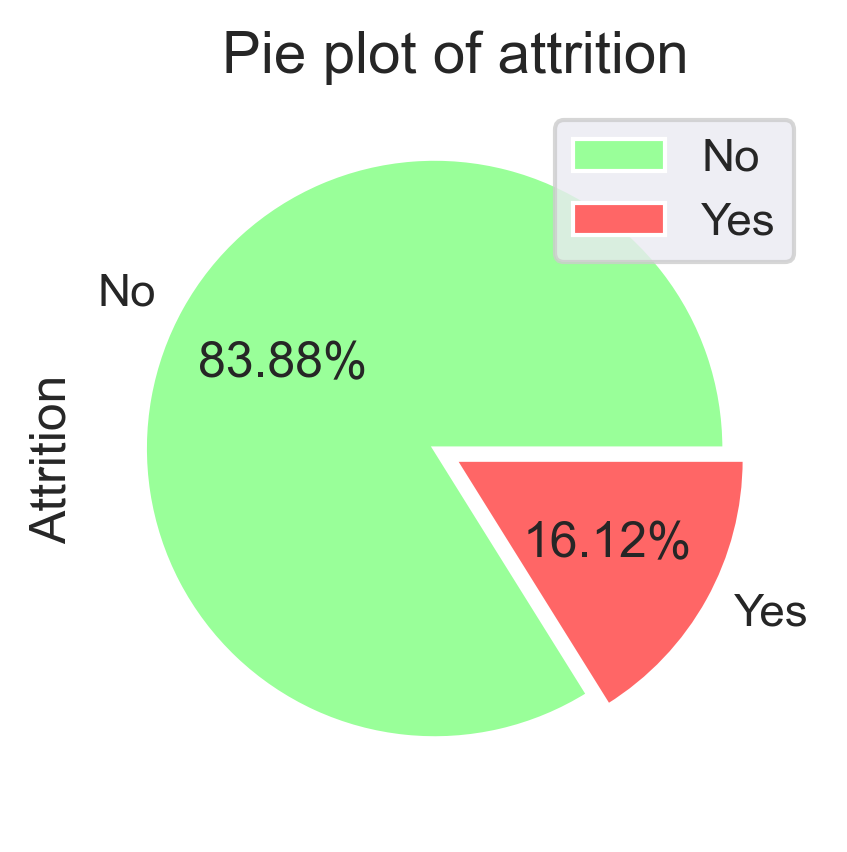

In [100]:
explode=(0.08,0)

df['Attrition'].value_counts().plot.pie(autopct='%1.2f%%',figsize=(3,3),explode=explode,colors=['#99ff99','#ff6666'])
plt.title("Pie plot of attrition", fontsize=14)
plt.tight_layout()
plt.legend()
plt.show()

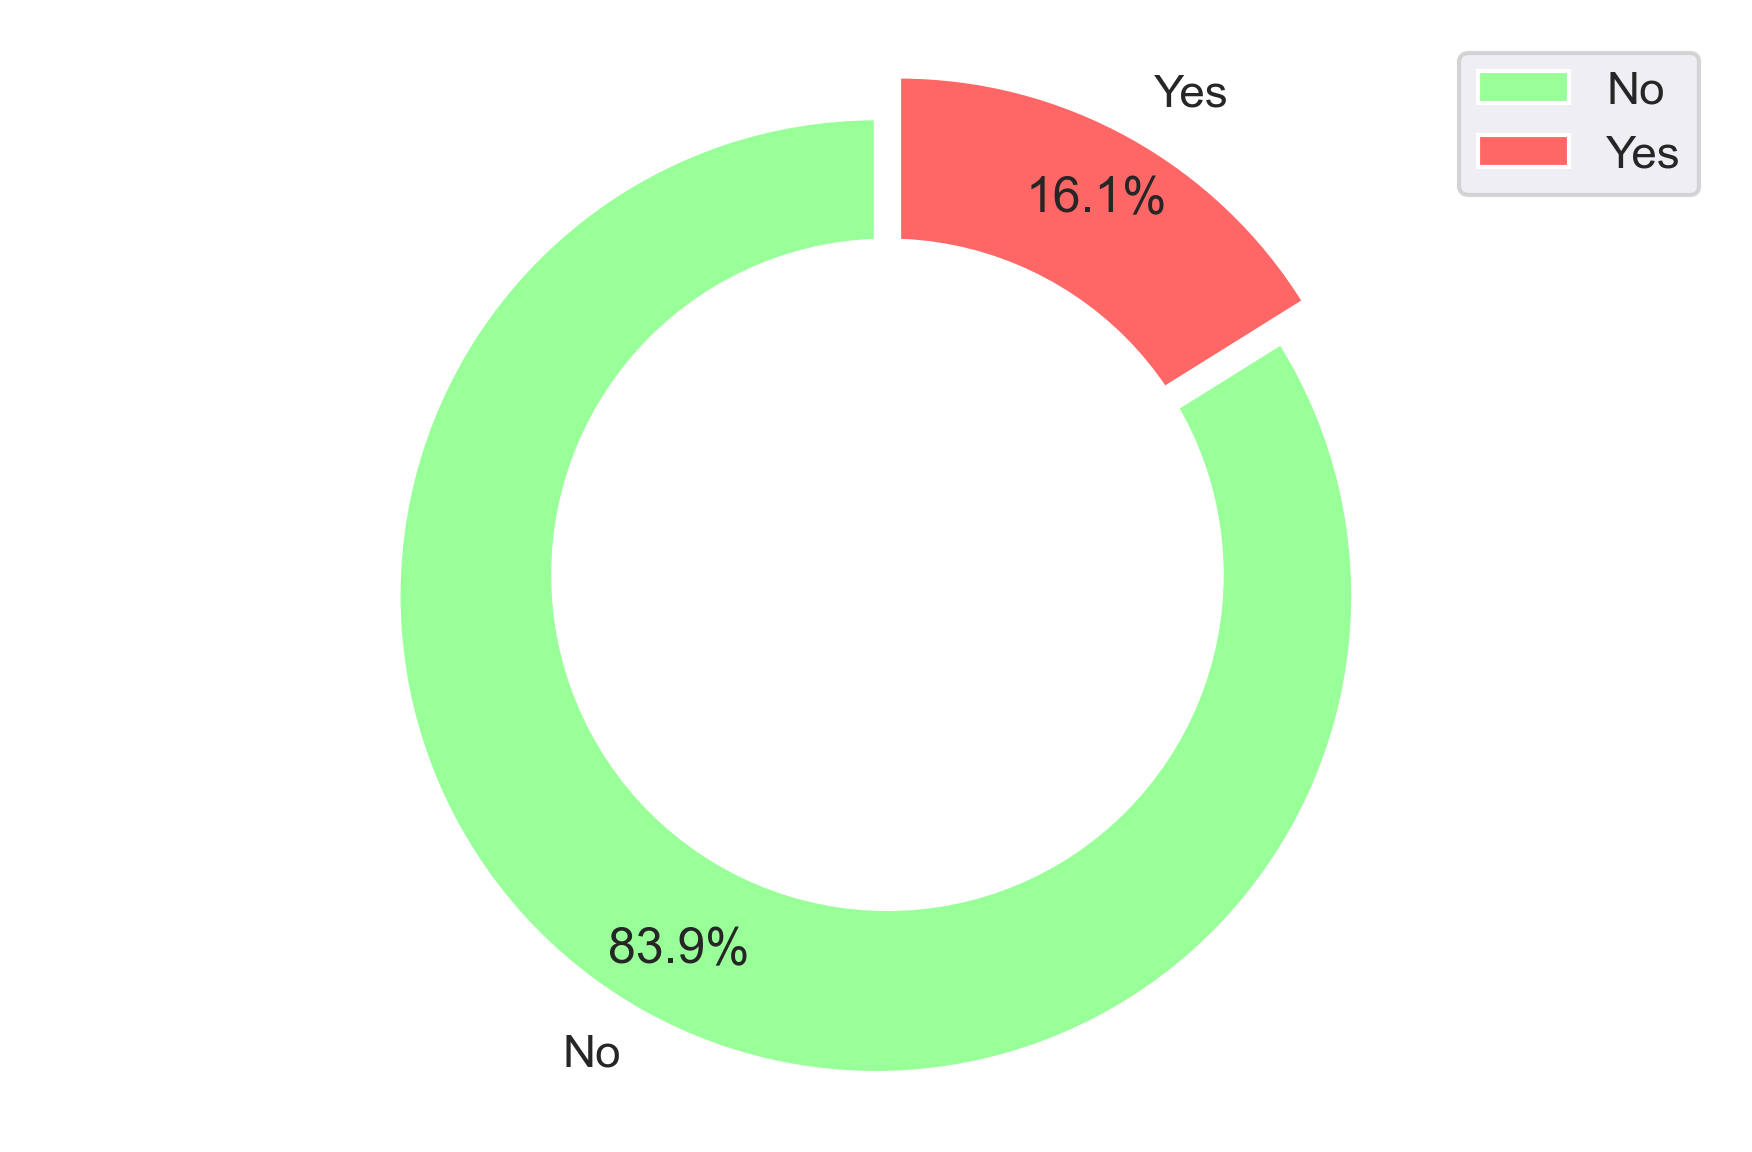

In [101]:
labels = df['Attrition'].unique()
sizes = df['Attrition'].value_counts()
colors=['#99ff99','#ff6666']
explode = (0.05,0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', pctdistance=0.85, startangle=90, explode=explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

#### 16.1% of total employee has left the company while 83.9% of total employees are still in the company.

## Ratio of Attrition based on Gender

In [102]:
df1 = df.groupby(['Attrition','Gender']).agg({'Gender':'count'})
df1 = df1.rename({'Gender': 'Gender_count'}, axis=1)
df1.reset_index(inplace=True)

print(df1.head())

  Attrition  Gender  Gender_count
0        No  Female          1494
1        No    Male          2205
2       Yes  Female           270
3       Yes    Male           441


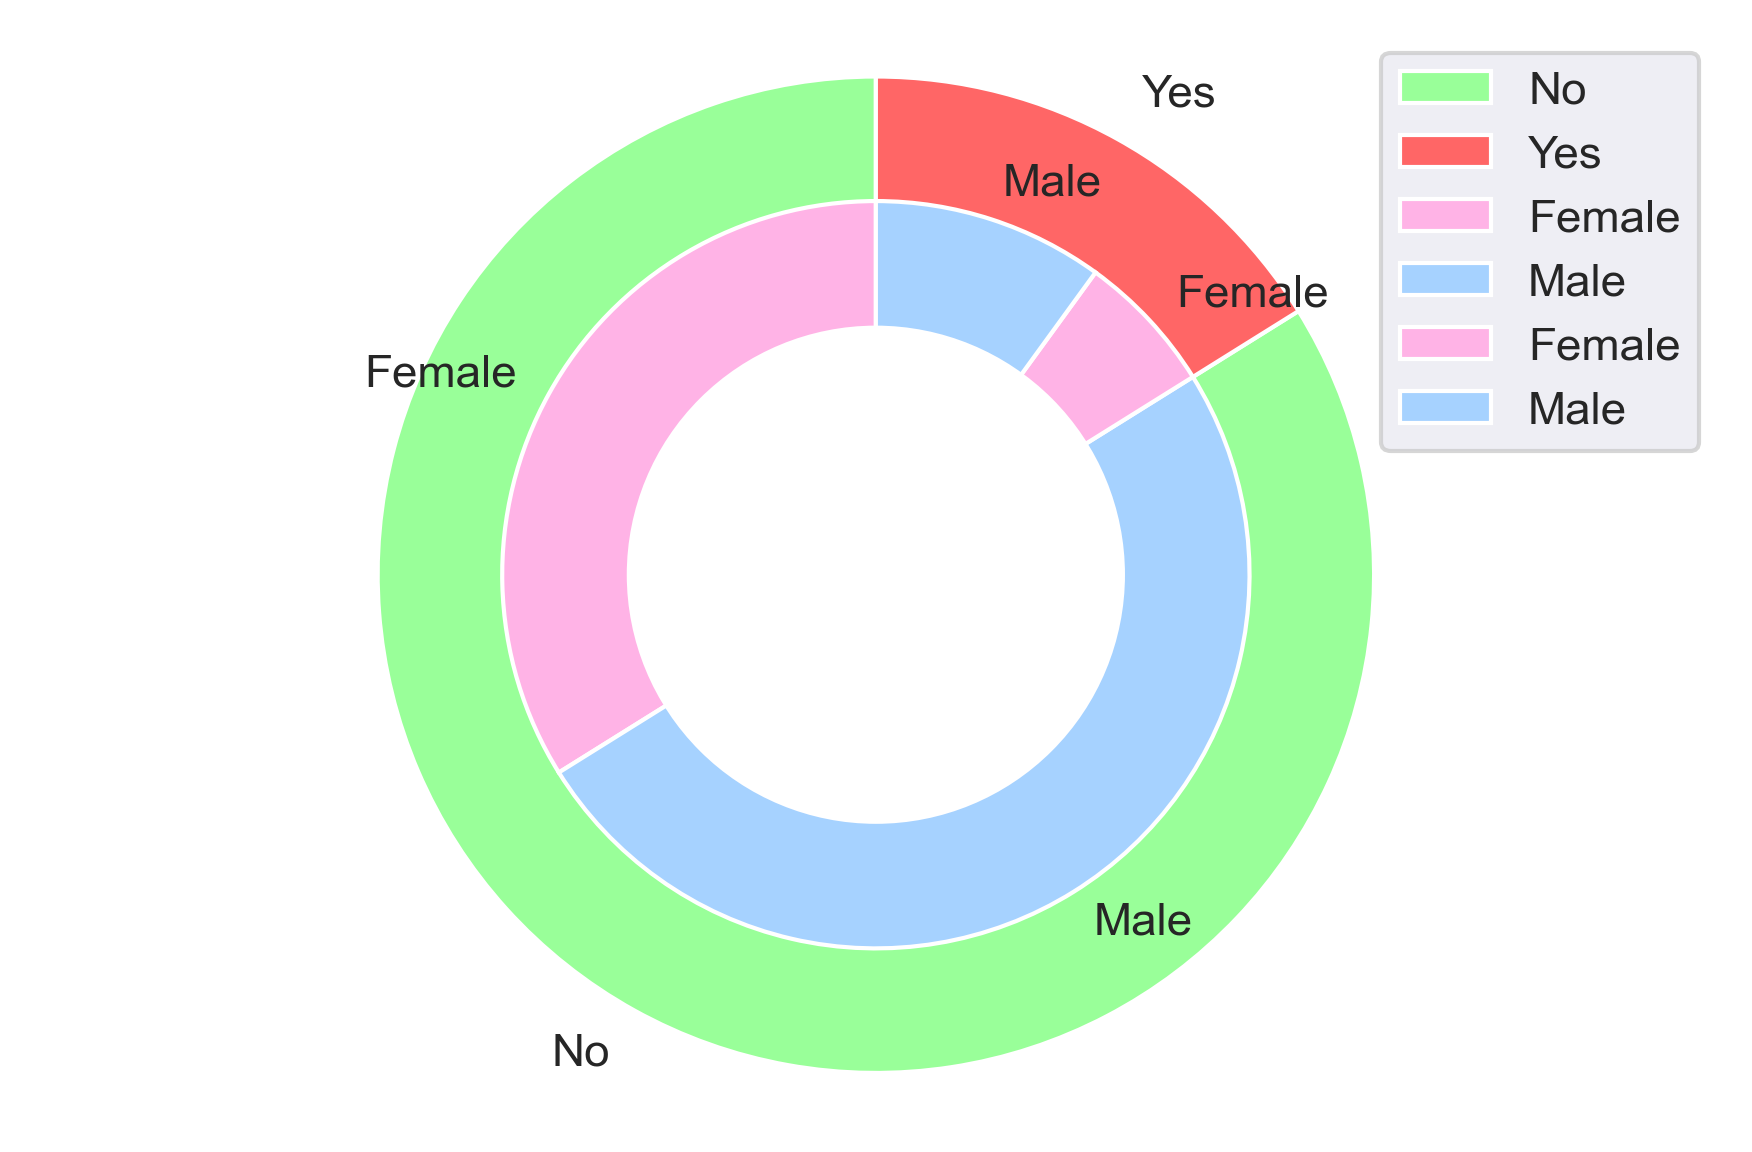

In [103]:
labels1 = df.Attrition.unique()
size1 = df.Attrition.value_counts()

labels2 = df1.Gender
size2 = df1.Gender_count

colors1 = ['#99ff99','#ff6666']
colors2 = ['#ffb3e6','#a6d2ff','#ffb3e6','#a6d2ff']

plt.pie(size1, labels=labels1, colors=colors1, startangle=90,frame=True)
plt.pie(size2, labels=labels2, colors=colors2,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.legend()
plt.show()

Text(0.5, 1.0, 'Gender and Attrition')

<Figure size 3000x3000 with 0 Axes>

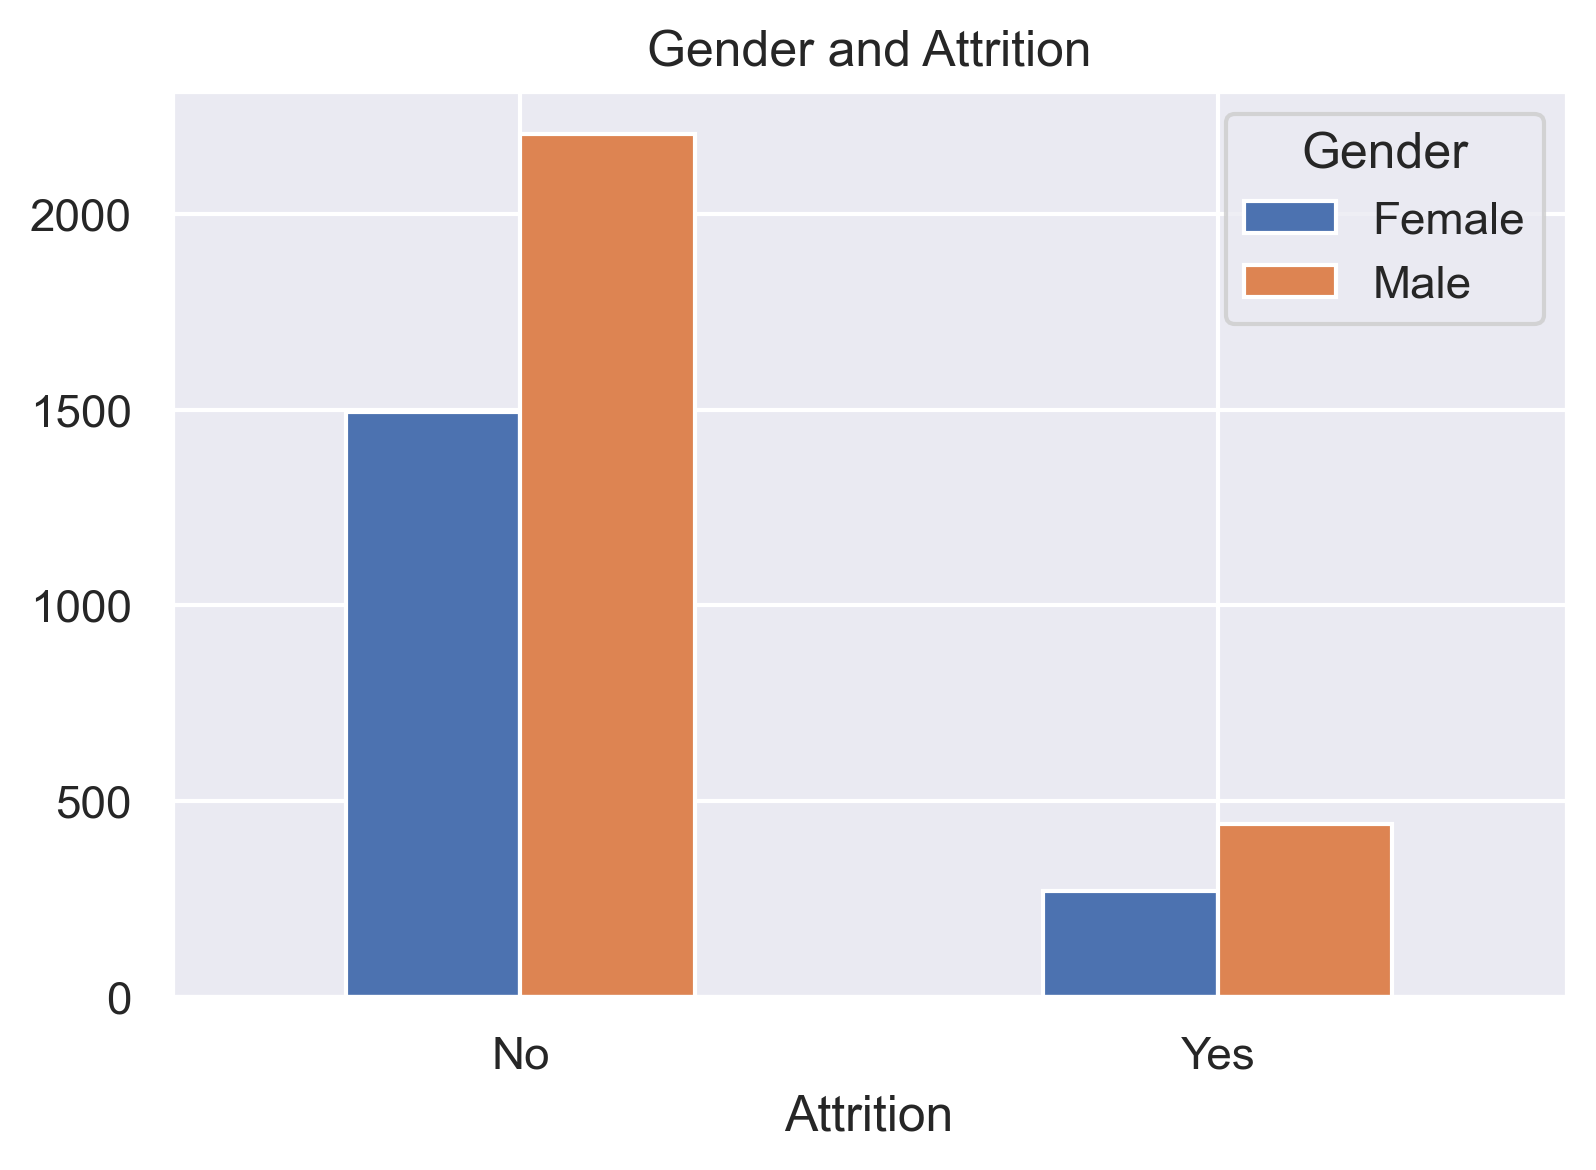

In [104]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['Attrition'],df['Gender'])

ax=prd_gender.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Gender and Attrition")

#### As compare to female employees, number of male employees who left the comapny is slightly higher.
#### 441 Male employees had left the company while 270 Female employees had left the company.
#### 2205 Male employees and 1494 Female employees are still working for the company, means they didn't left the company yet.

## Ratio of Attrition based on Job Satisfaction Level

In [105]:
df1 = df.groupby(['Attrition','JobSatisfaction']).agg({'JobSatisfaction':'count'})
df1 = df1.rename({'JobSatisfaction': 'JobSatisfaction_count'}, axis=1)
df1.reset_index(inplace=True)
print(df1)

  Attrition  JobSatisfaction  JobSatisfaction_count
0        No                1                    664
1        No                2                    707
2        No                3                   1111
3        No                4                   1217
4       Yes                1                    197
5       Yes                2                    139
6       Yes                3                    219
7       Yes                4                    156


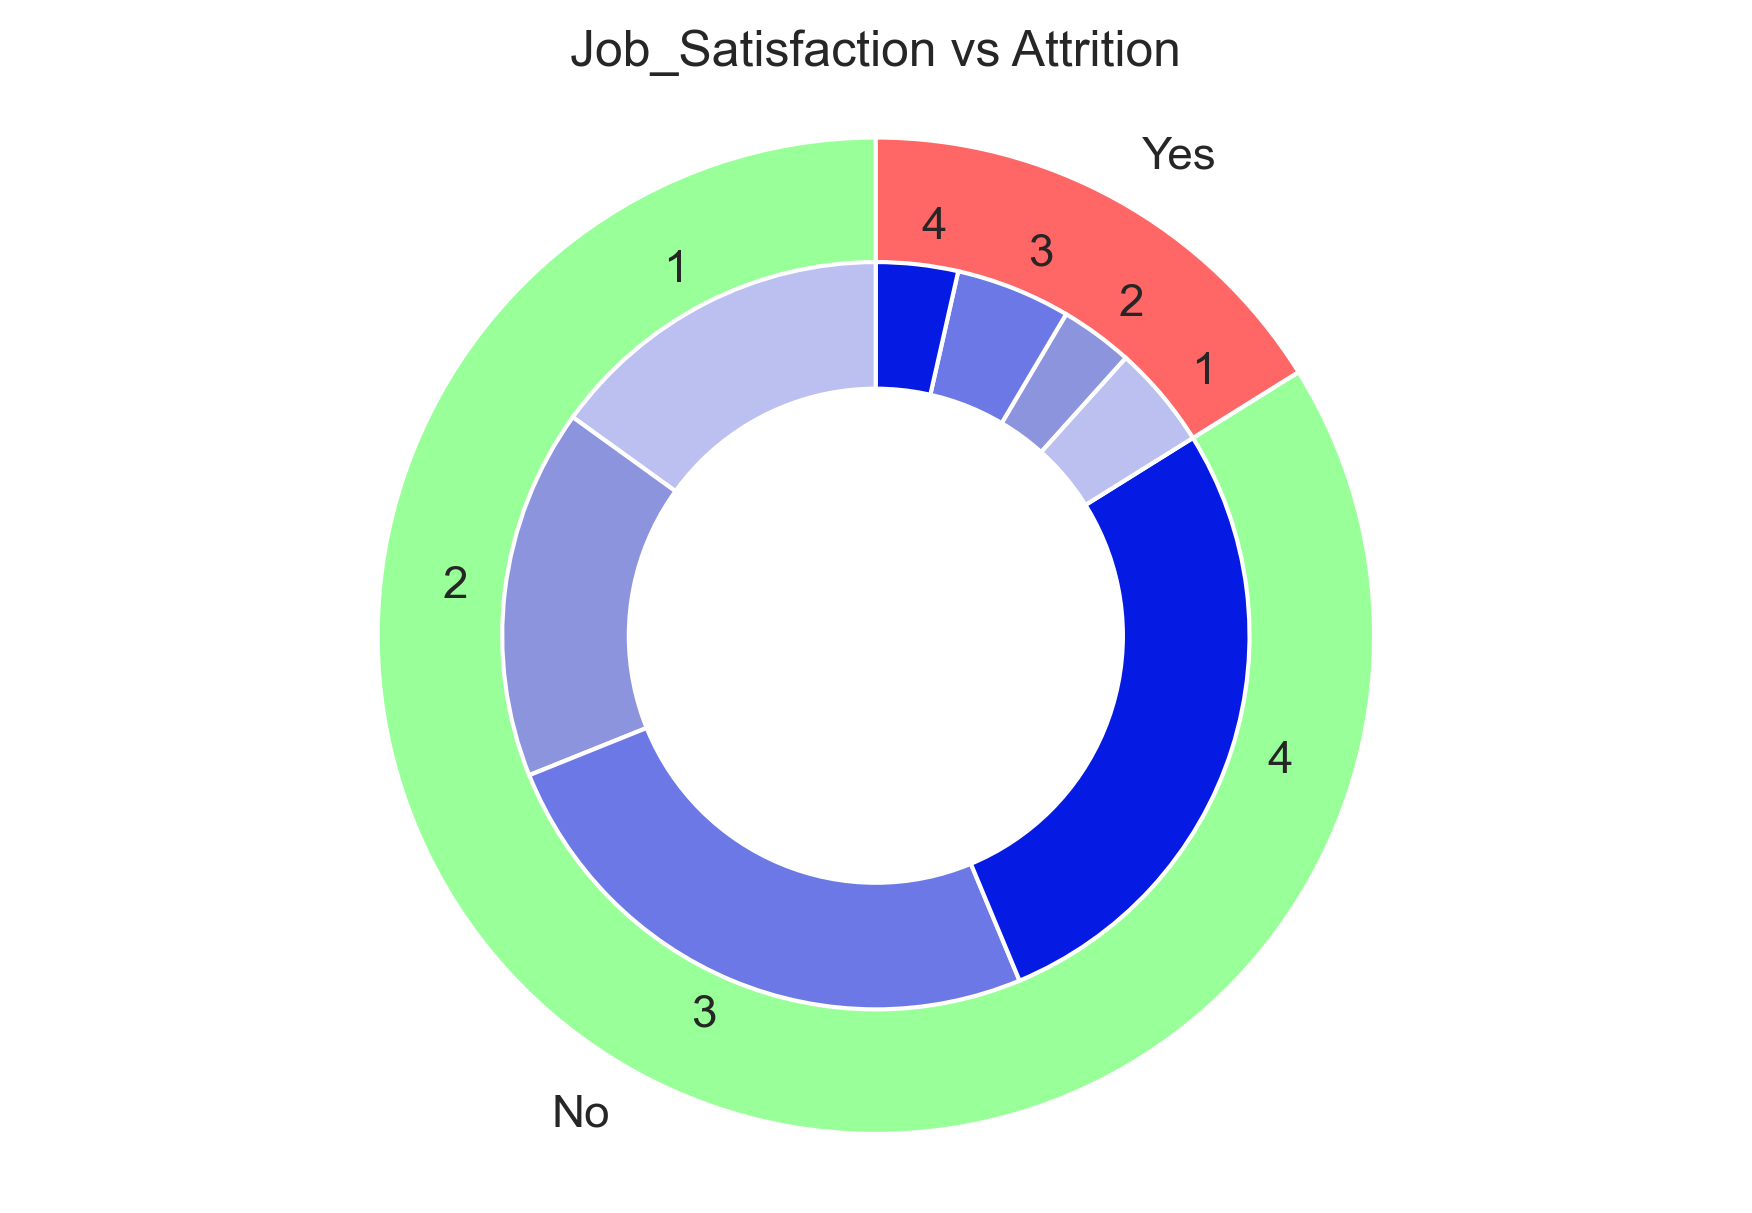

In [106]:
labels1 = df.Attrition.unique()
size1 = df.Attrition.value_counts()

labels2 = df1.JobSatisfaction
size2 = df1.JobSatisfaction_count

colors1 = ['#99ff99','#ff6666']
colors2 = ['#bbc0f0','#8c94de','#6c78e6','#051ae3']

plt.pie(size1, labels=labels1, colors=colors1, startangle=90,frame=True)
plt.pie(size2, labels=labels2, colors=colors2,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.title("Job_Satisfaction vs Attrition")
plt.show()

Text(0.5, 1.0, 'Job_Satisfaction vs Attrition')

<Figure size 3000x3000 with 0 Axes>

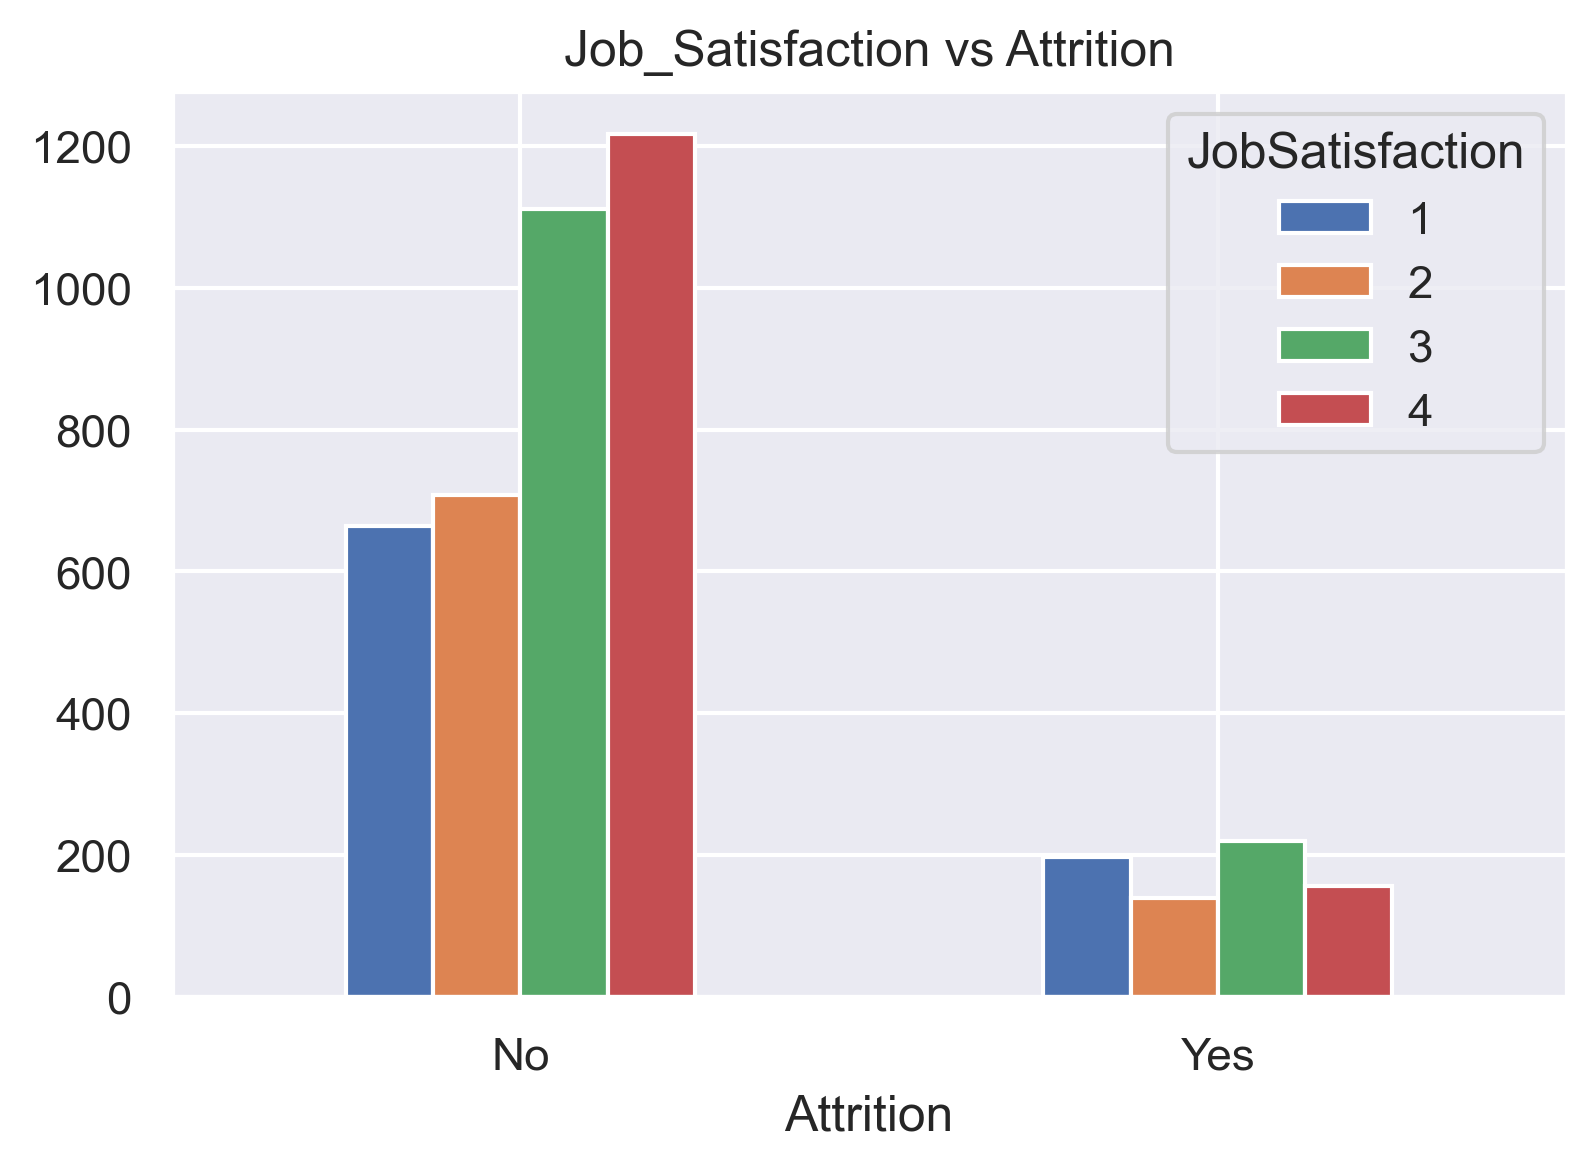

In [107]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['Attrition'],df['JobSatisfaction'])

ax=prd_gender.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Job_Satisfaction vs Attrition")

#### 664 employees with Job Satisfaction level 1, 707 employees with Job Satisfaction level 2, 1111 employees with Job Satisfaction level 3, and 1217 employees with Job Satisfaction level 4 has didn't left the company yet, which means they are still working for the company.
#### While, 197 employees with Job Satisfaction level 1, 139 employees with Job Satisfaction level 2, 219 employees with Job Satisfaction level 3, and 156 employees with Job Satisfaction level 4 had left the company.
#### It seems that there is no correlation between Job Satisfaction level and Attrition.

## Ratio of Attrition based on Work Life Balance

In [108]:
df1 = df.groupby(['Attrition','WorkLifeBalance']).agg({'WorkLifeBalance':'count'})
df1 = df1.rename({'WorkLifeBalance': 'WorkLifeBalance_count'}, axis=1)
df1.reset_index(inplace=True)
print(df1)

  Attrition  WorkLifeBalance  WorkLifeBalance_count
0        No                1                    167
1        No                2                    855
2        No                3                   2303
3        No                4                    374
4       Yes                1                     75
5       Yes                2                    173
6       Yes                3                    382
7       Yes                4                     81


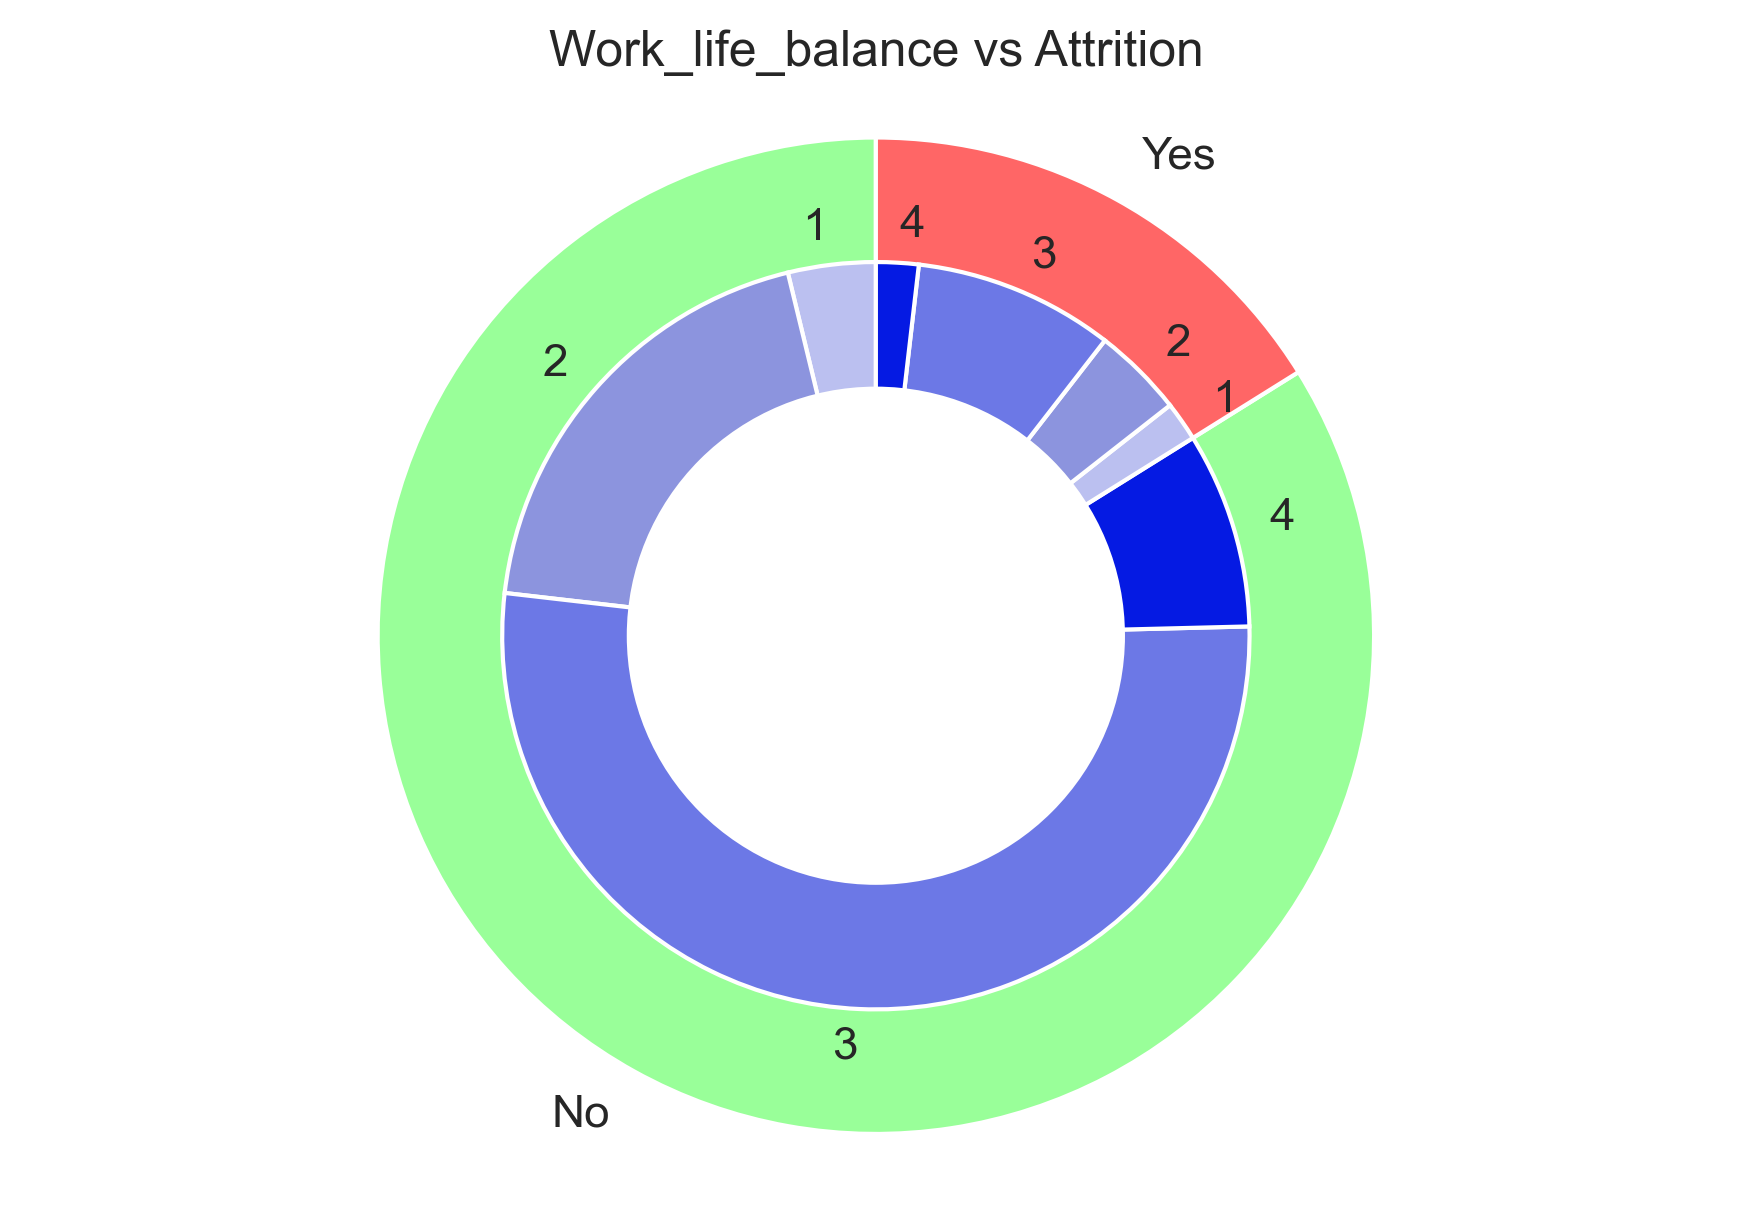

In [109]:
labels1 = df.Attrition.unique()
size1 = df.Attrition.value_counts()

labels2 = df1.WorkLifeBalance
size2 = df1.WorkLifeBalance_count

colors1 = ['#99ff99','#ff6666']
colors2 = ['#bbc0f0','#8c94de','#6c78e6','#051ae3']

plt.pie(size1, labels=labels1, colors=colors1, startangle=90,frame=True)
plt.pie(size2, labels=labels2, colors=colors2,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.title("Work_life_balance vs Attrition")
plt.show()

Text(0.5, 1.0, 'Work_life_balance vs Attrition')

<Figure size 3000x3000 with 0 Axes>

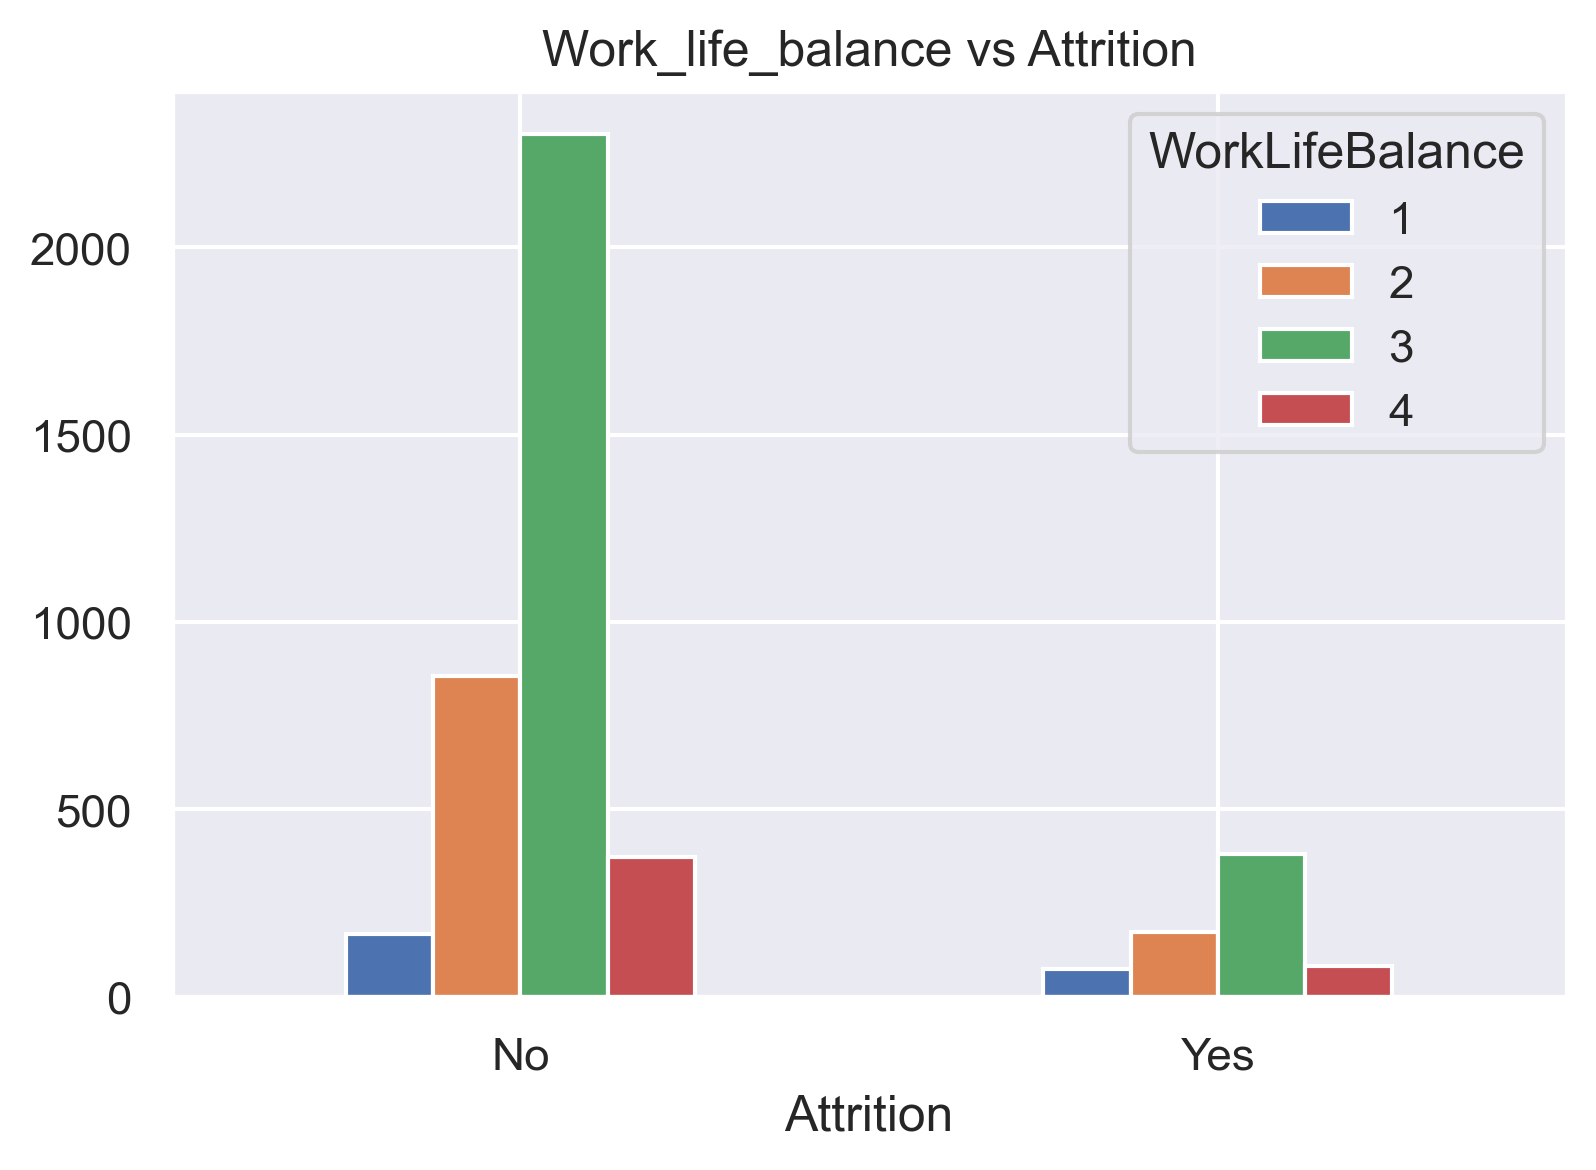

In [110]:
plt.figure(figsize=(10,10))
prd_gender=pd.crosstab(df['Attrition'],df['WorkLifeBalance'])

ax=prd_gender.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Work_life_balance vs Attrition")

#### 167 employees with Worklife balance level 1, 855 employees with Worklife balance level 2, 2303 employees with Worklife balance level 3, and 374 employees with Worklife balance level 4 has didn't left the company yet, which means they are still working for the company.
#### While, 75 employees with Worklife balance level 1, 173 employees with Worklife balance level 2, 382 employees with Worklife balance level 3, and 81 employees with Worklife balance level 4 had left the company.
#### It seems that there is no correlation between Worklife balance level and Attrition.

# Age group showing higher Attrition Rate

#### Just checking Age and its count first

In [111]:
df1 = df.groupby(['Attrition','Age']).agg({'Age':'count'})
df1 = df1.rename({'Age': 'Age_count'}, axis=1)
df1.reset_index(inplace=True)
print(df1)

   Attrition  Age  Age_count
0         No   18         12
1         No   19          9
2         No   20         15
3         No   21         21
4         No   22         33
..       ...  ...        ...
77       Yes   52          9
78       Yes   53          6
79       Yes   55          9
80       Yes   56          9
81       Yes   58         15

[82 rows x 3 columns]


Text(0, 0.5, 'Count')

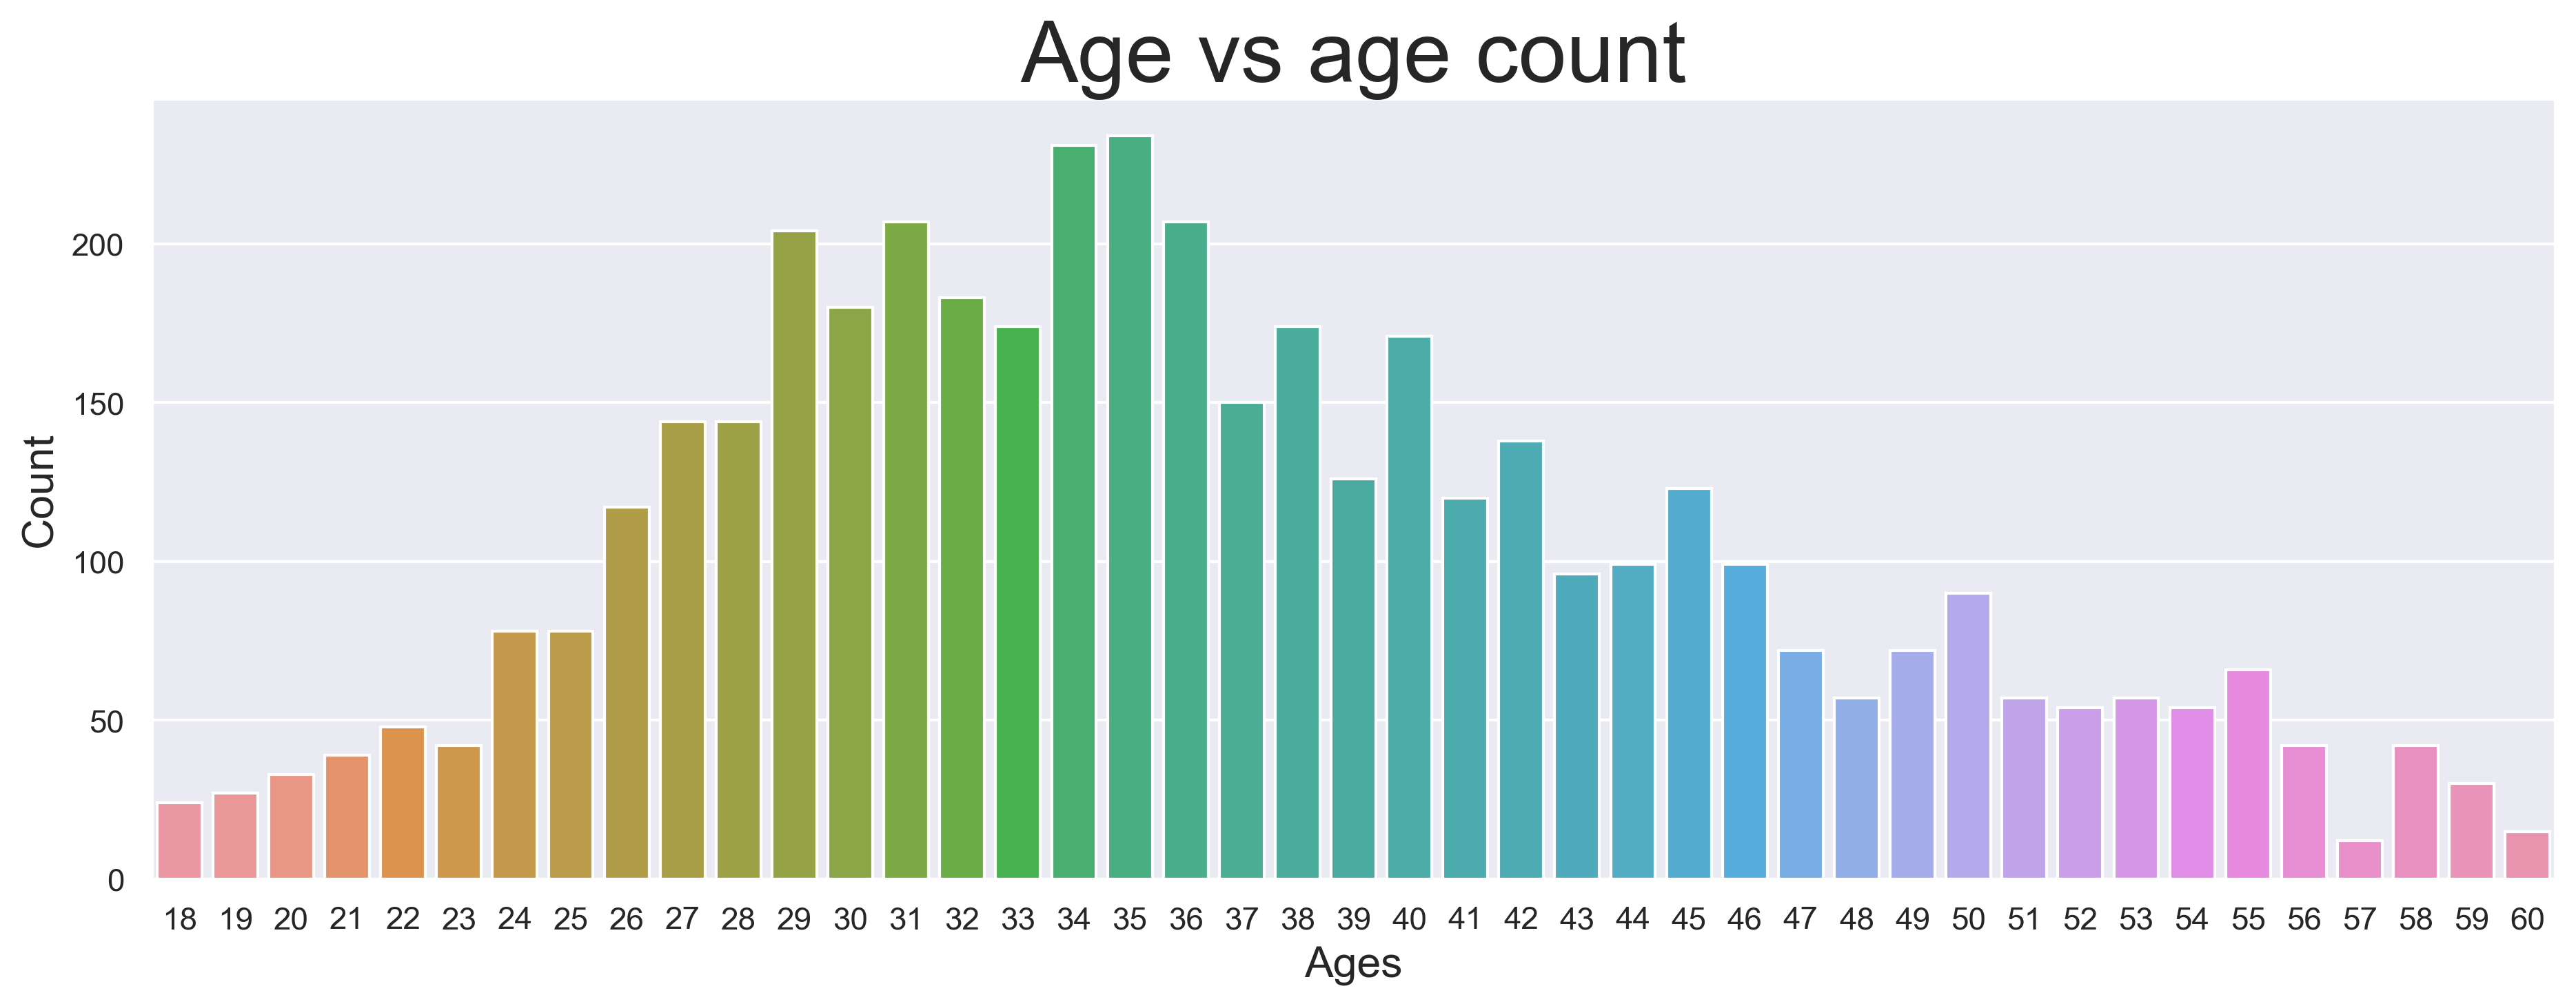

In [112]:
plt.figure(figsize=(15, 5))
x_age = sorted(df['Age'].value_counts().index)
sns.countplot(data=df, x='Age', order=x_age)

plt.title('Age vs age count', fontsize = 30)
plt.xlabel('Ages', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

## Plotting Attrition vs Age barplot and lineplot

<AxesSubplot:xlabel='Age', ylabel='count'>

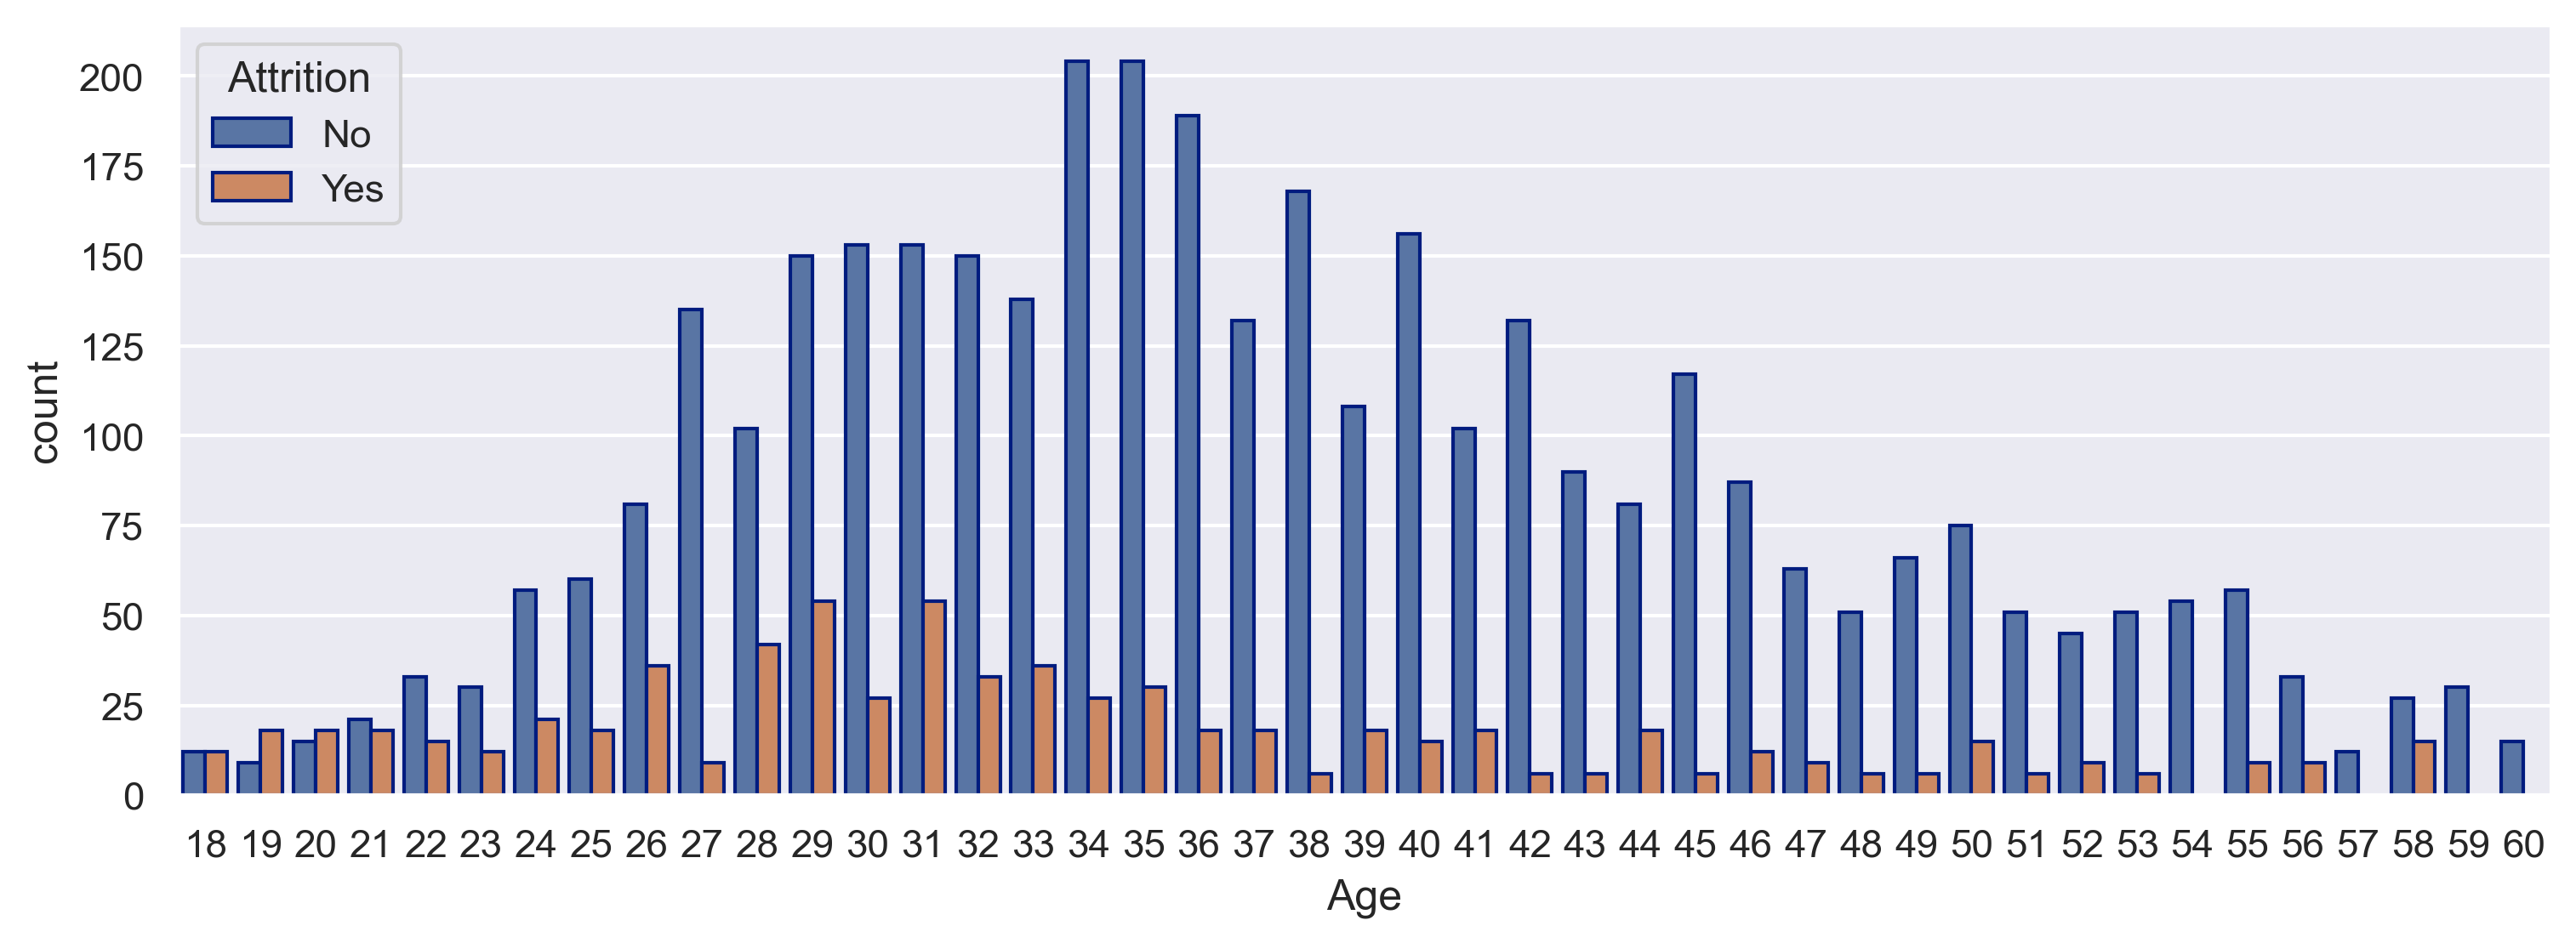

In [113]:
fig_dims=(12,4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Age', hue='Attrition', ax=ax, data=df, edgecolor=sns.color_palette("dark", n_colors=1))

In [114]:
df1 = df.groupby(['Attrition','Age']).agg({'Age':'count'})
df1 = df1.rename({'Age': 'Age_count'}, axis=1)
df1.reset_index(inplace=True)
print(df1)

   Attrition  Age  Age_count
0         No   18         12
1         No   19          9
2         No   20         15
3         No   21         21
4         No   22         33
..       ...  ...        ...
77       Yes   52          9
78       Yes   53          6
79       Yes   55          9
80       Yes   56          9
81       Yes   58         15

[82 rows x 3 columns]


In [115]:
df1.Attrition.value_counts()

No     43
Yes    39
Name: Attrition, dtype: int64

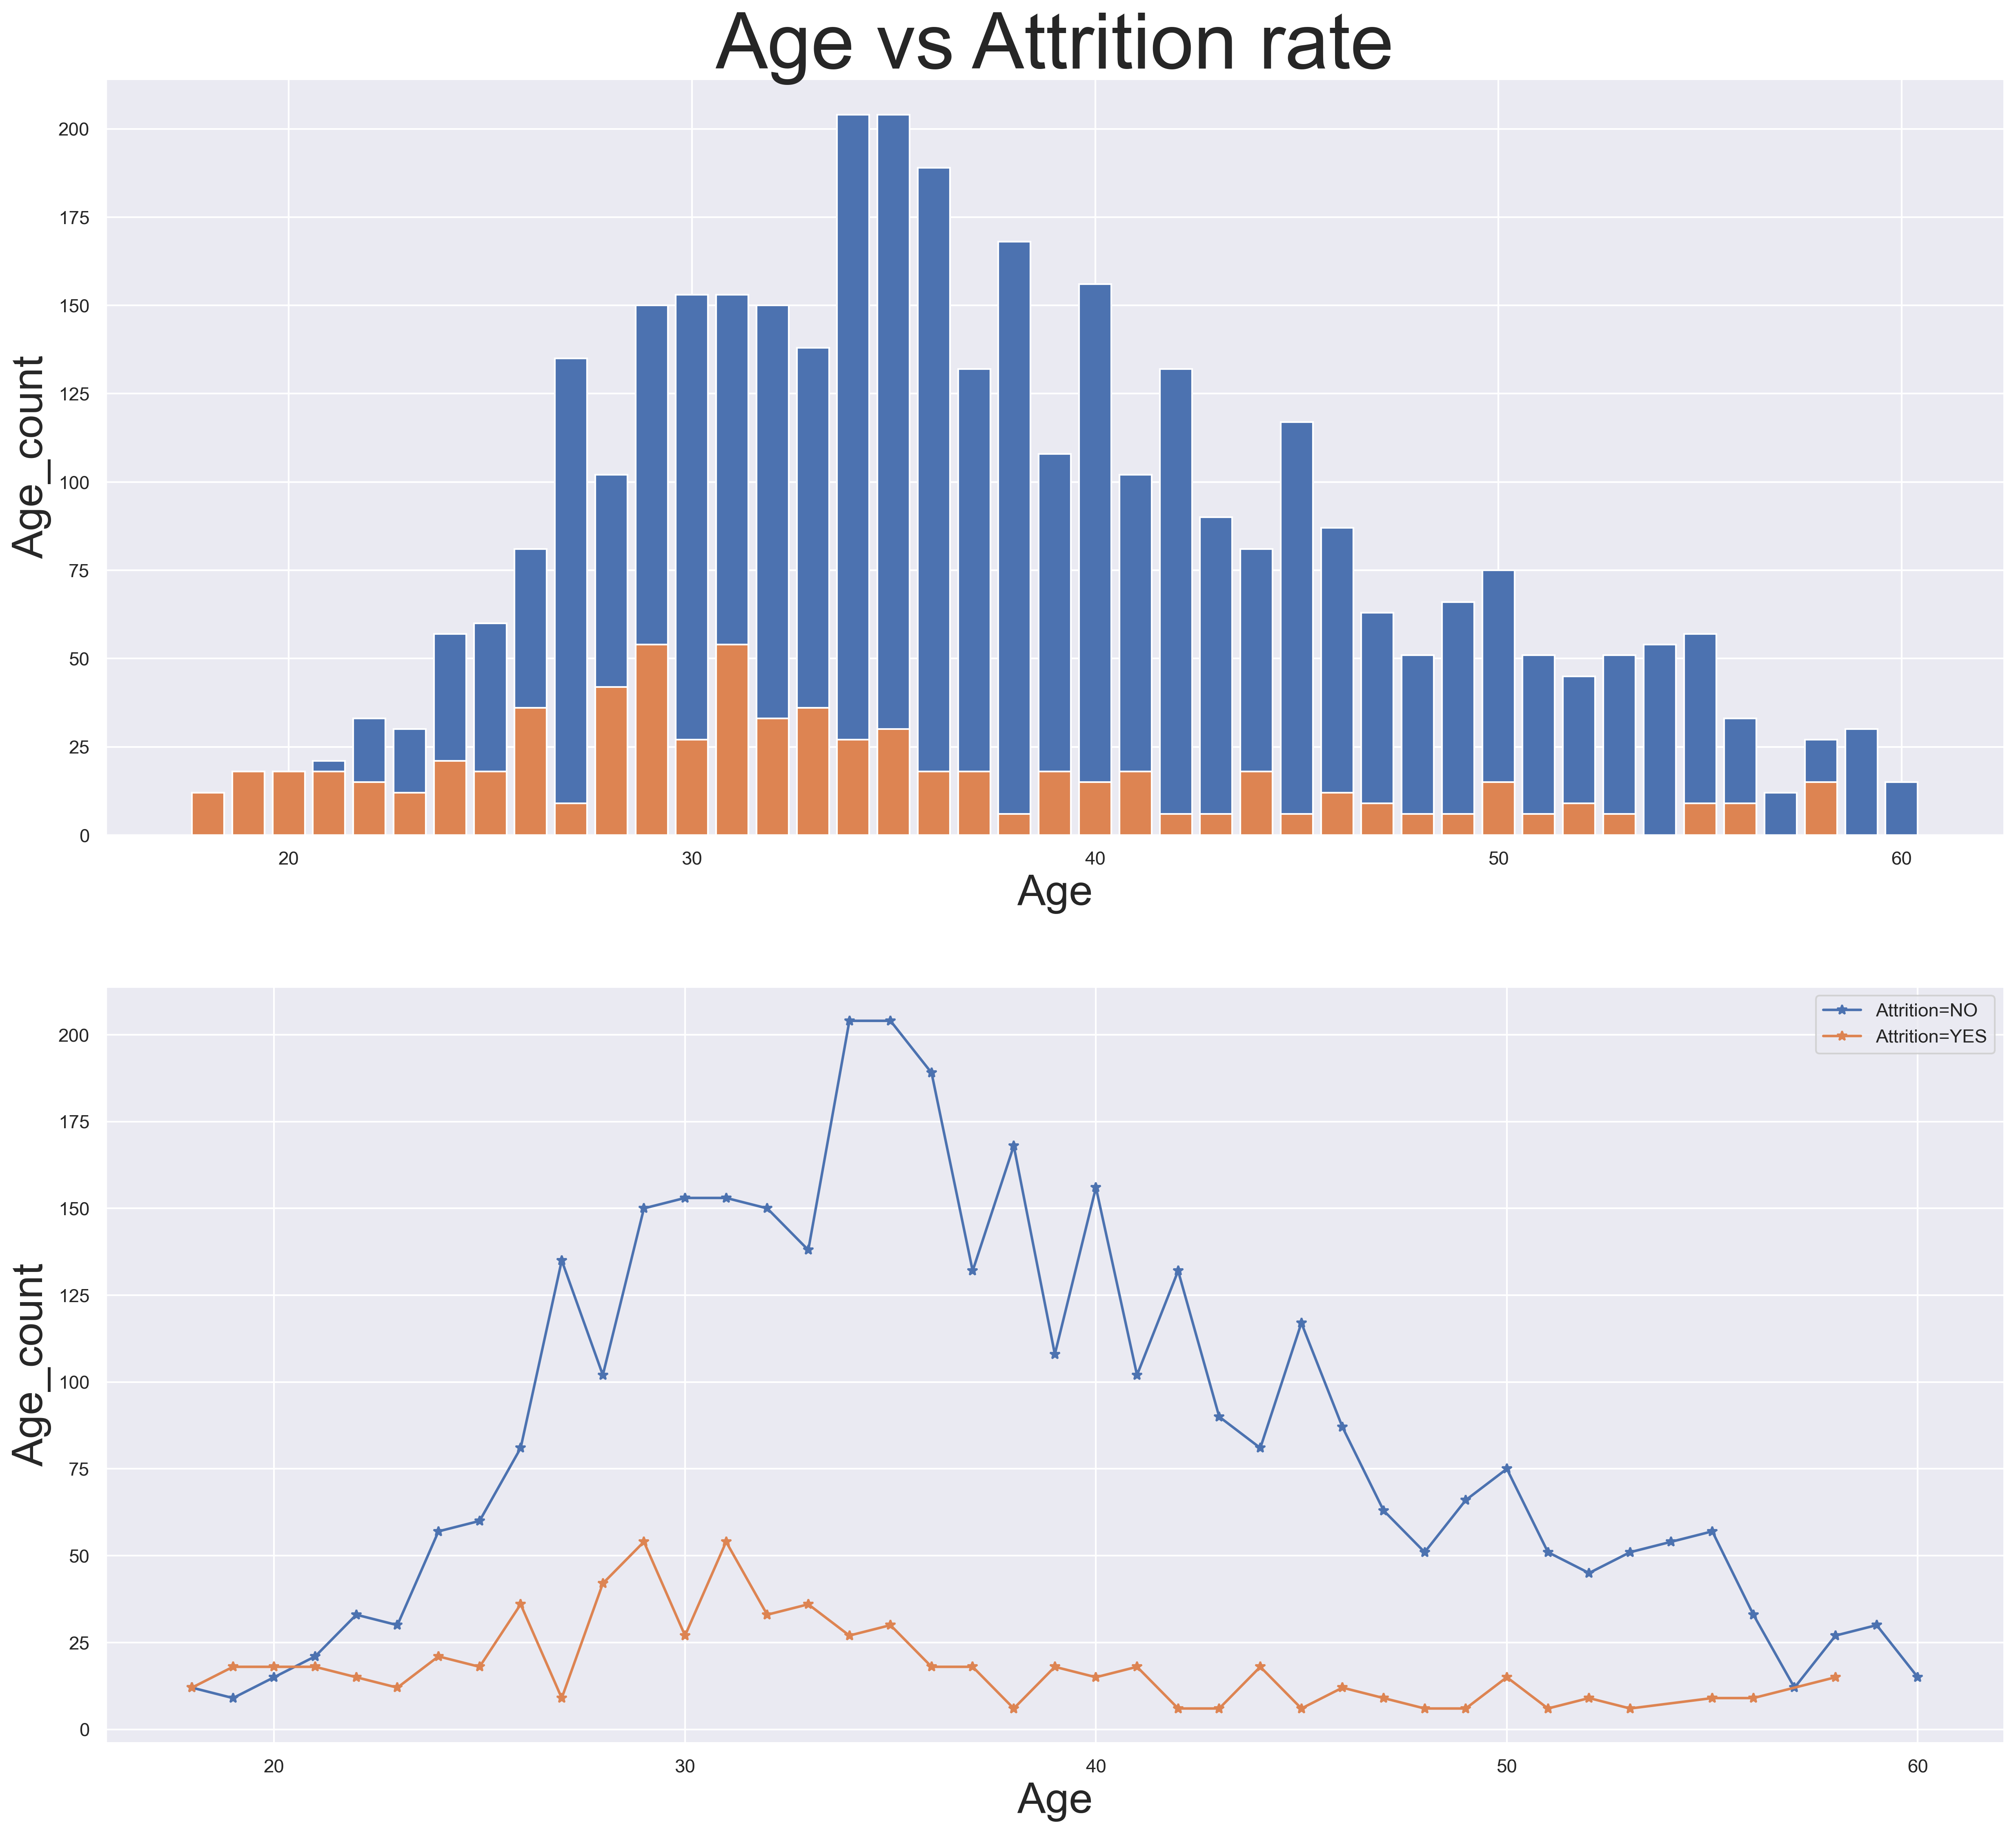

In [116]:
fig, ax =plt.subplots(2,1,figsize=(20,18))

ax[0].bar(df1['Age'].iloc[:43].unique(), df1["Age_count"].iloc[:43])
ax[0].bar(df1['Age'].iloc[43:].unique(), df1["Age_count"].iloc[43:])
ax[0].set_title("Age vs Attrition rate", fontsize=46)
ax[0].set_xlabel('Age', fontsize=25)
ax[0].set_ylabel('Age_count', fontsize=25)
plt.grid(True)

ax[1].plot(df1.Age.iloc[:43], df1.Age_count.iloc[:43], label='Attrition=NO', marker='*')
ax[1].plot(df1.Age.iloc[43:], df1.Age_count.iloc[43:], label='Attrition=YES', marker='*')
ax[1].set_xlabel('Age', fontsize=25)
ax[1].set_ylabel('Age_count', fontsize=25)
plt.legend()

#### Employees with age 29 and 30 left more than others. While employees with age of 54, 57, 59, and 60 didn't left the company.
#### It seems attrition is more in age group 24-37. While attrition is less in age group above 45.

## Correlation Heatmap

<AxesSubplot:>

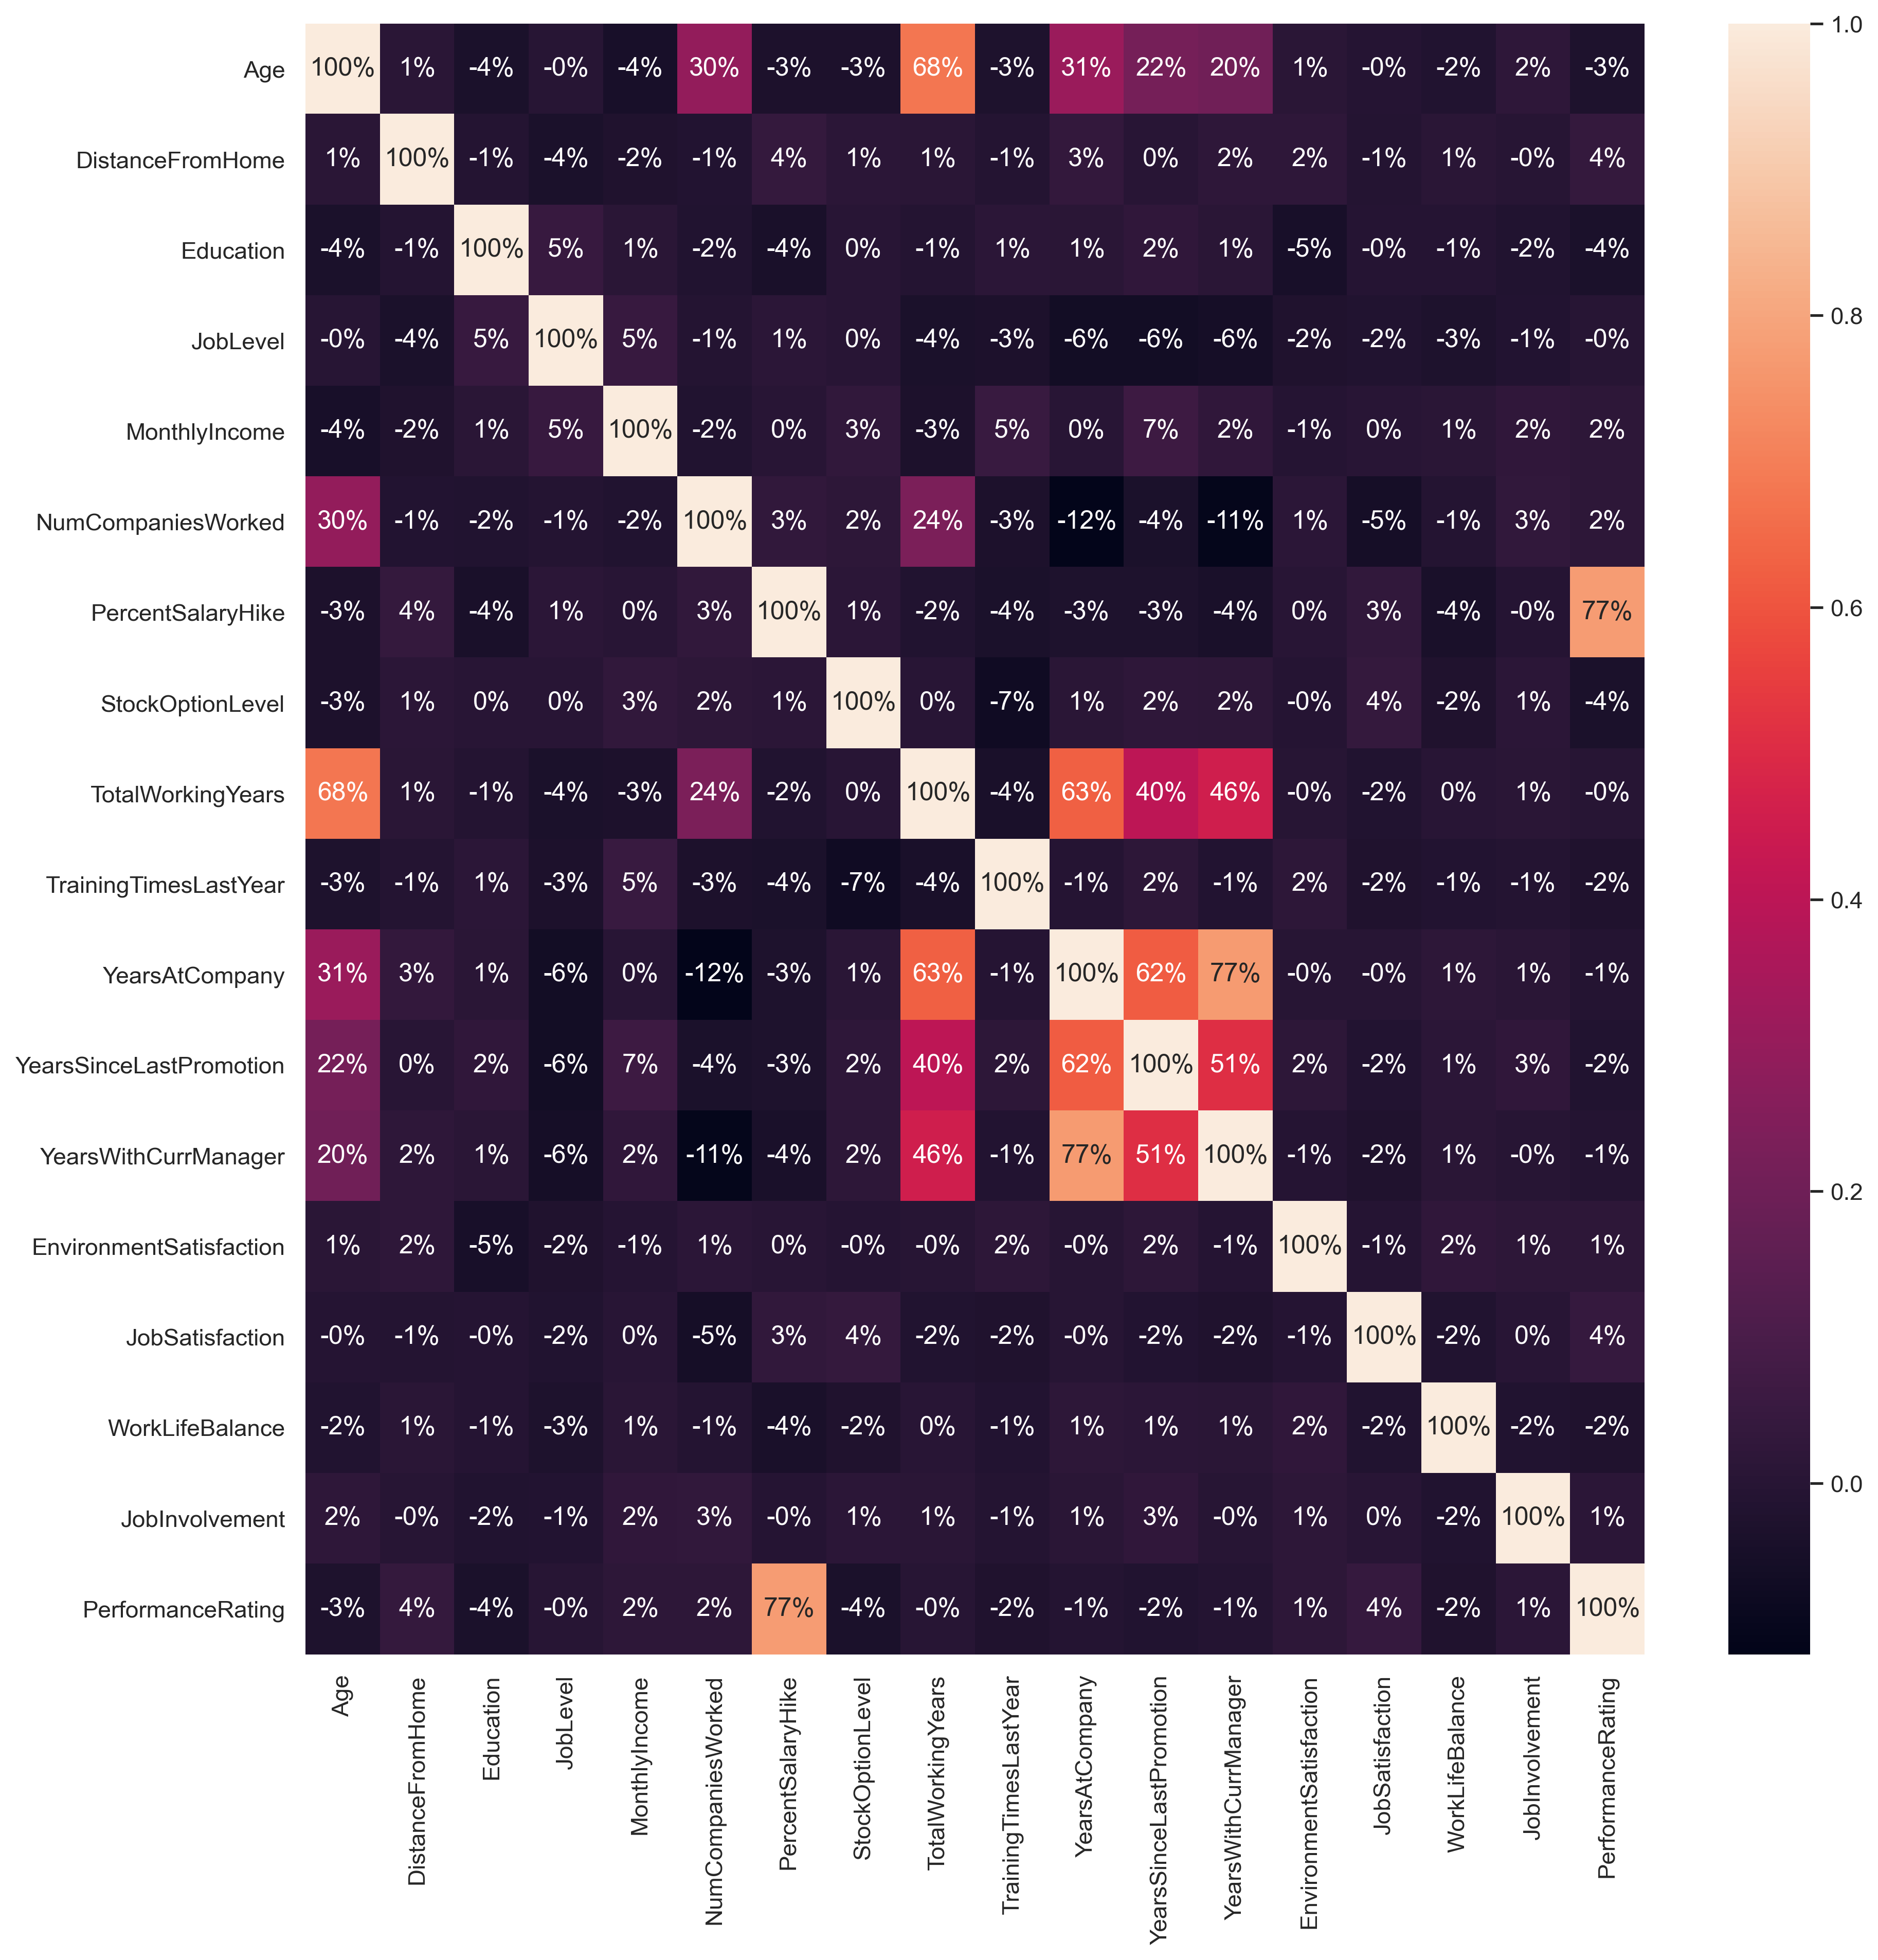

In [117]:
sns.set(font_scale=1.0)
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt = '.0%')

### It is noticable that this correlation heatmap include only columns of dtype int64. So now we will convert all categorical column with dtype object to dtype int64 and then we will do correlation heatmap plot again.


# Label Encoding

#### Label encoding will convert all categorical column with object as dtype to int64 as dtype. Example: Yes or No to 1 or 0.

In [118]:
df.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  Gender  JobLevel                    JobRole  \
0          2  Life Sciences  Female         1  Healthcare Representative   
1          1  Life Sciences  Female         1         Research Scientist   
2          4          Other    Male         4            Sales Executive   
3          5  Life Sciences    Male         3            Human Resources   
4          1        Medical    Male         1            Sales Executive   

  MaritalStatus  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
0       Married         131160                   1                 11   
1        Single          41890                   0                 23   
2       Married         193280                   1                 15   
3       Married          83210                   3                 11   
4        Single          23420                   4                 12   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0                  1                      6               1   
1                 1                  6                      3               5   
2                 3                  5                      2               5   
3                 3                 13                      5               8   
4                 2                  9                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  EnvironmentSatisfaction  \
0                        0                     0                        3   
1                        1                     4                        3   
2                        0                     3                        2   
3                        7                     5                        4   
4                        0                     4                        4   

   JobSatisfaction  WorkLifeBalance  JobInvolvement  PerformanceRating  
0                4                2               3                  3  
1                2                4               2                  4  
2                2                1               3                  3  
3                4                3               2                  3  
4                1                3               3                  3

In [119]:
col = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

#df['Attrition'] = encoder.fit_transform(df['Attrition'])

df.head()

Age  Attrition  BusinessTravel  Department  DistanceFromHome  Education  \
0   33          0               2           2                 5          1   
1   13          1               1           1                 9          0   
2   14          0               1           1                16          3   
3   20          0               0           1                 1          4   
4   14          0               2           1                 9          0   

   EducationField  Gender  JobLevel  JobRole  MaritalStatus  MonthlyIncome  \
0               1       0         0        0              1           1166   
1               1       0         0        6              2            505   
2               4       1         3        7              1           1318   
3               1       1         2        1              1            984   
4               3       1         0        7              2            145   

   NumCompaniesWorked  PercentSalaryHike  StockOptionLevel  TotalWorkingYears  \
0                   1                  0                 0                  1   
1                   0                 12                 1                  6   
2                   1                  4                 3                  5   
3                   3                  0                 3                 13   
4                   4                  1                 2                  9   

   TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
0                      6               1                        0   
1                      3               5                        1   
2                      2               5                        0   
3                      5               8                        7   
4                      2               6                        0   

   YearsWithCurrManager  EnvironmentSatisfaction  JobSatisfaction  \
0                     0                        2                3   
1                     4                        2                1   
2                     3                        1                1   
3                     5                        3                3   
4                     4                        3                0   

   WorkLifeBalance  JobInvolvement  PerformanceRating  
0                1               2                  0  
1                3               1                  1  
2                0               2                  0  
3                2               1                  0  
4                2               2                  0

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      4410 non-null   int64
 1   Attrition                4410 non-null   int32
 2   BusinessTravel           4410 non-null   int32
 3   Department               4410 non-null   int32
 4   DistanceFromHome         4410 non-null   int64
 5   Education                4410 non-null   int64
 6   EducationField           4410 non-null   int32
 7   Gender                   4410 non-null   int32
 8   JobLevel                 4410 non-null   int64
 9   JobRole                  4410 non-null   int32
 10  MaritalStatus            4410 non-null   int32
 11  MonthlyIncome            4410 non-null   int64
 12  NumCompaniesWorked       4410 non-null   int64
 13  PercentSalaryHike        4410 non-null   int64
 14  StockOptionLevel         4410 non-null   int64
 15  Tota

#### We converted all object categorical to int categorical, it will surely increase the performance of our model.
#### We also standardise the scale of our data by using MinMaxScaler. This will also help in increasing the performance of the model and increasing accuracy.

# Correlation Heatmap

<AxesSubplot:>

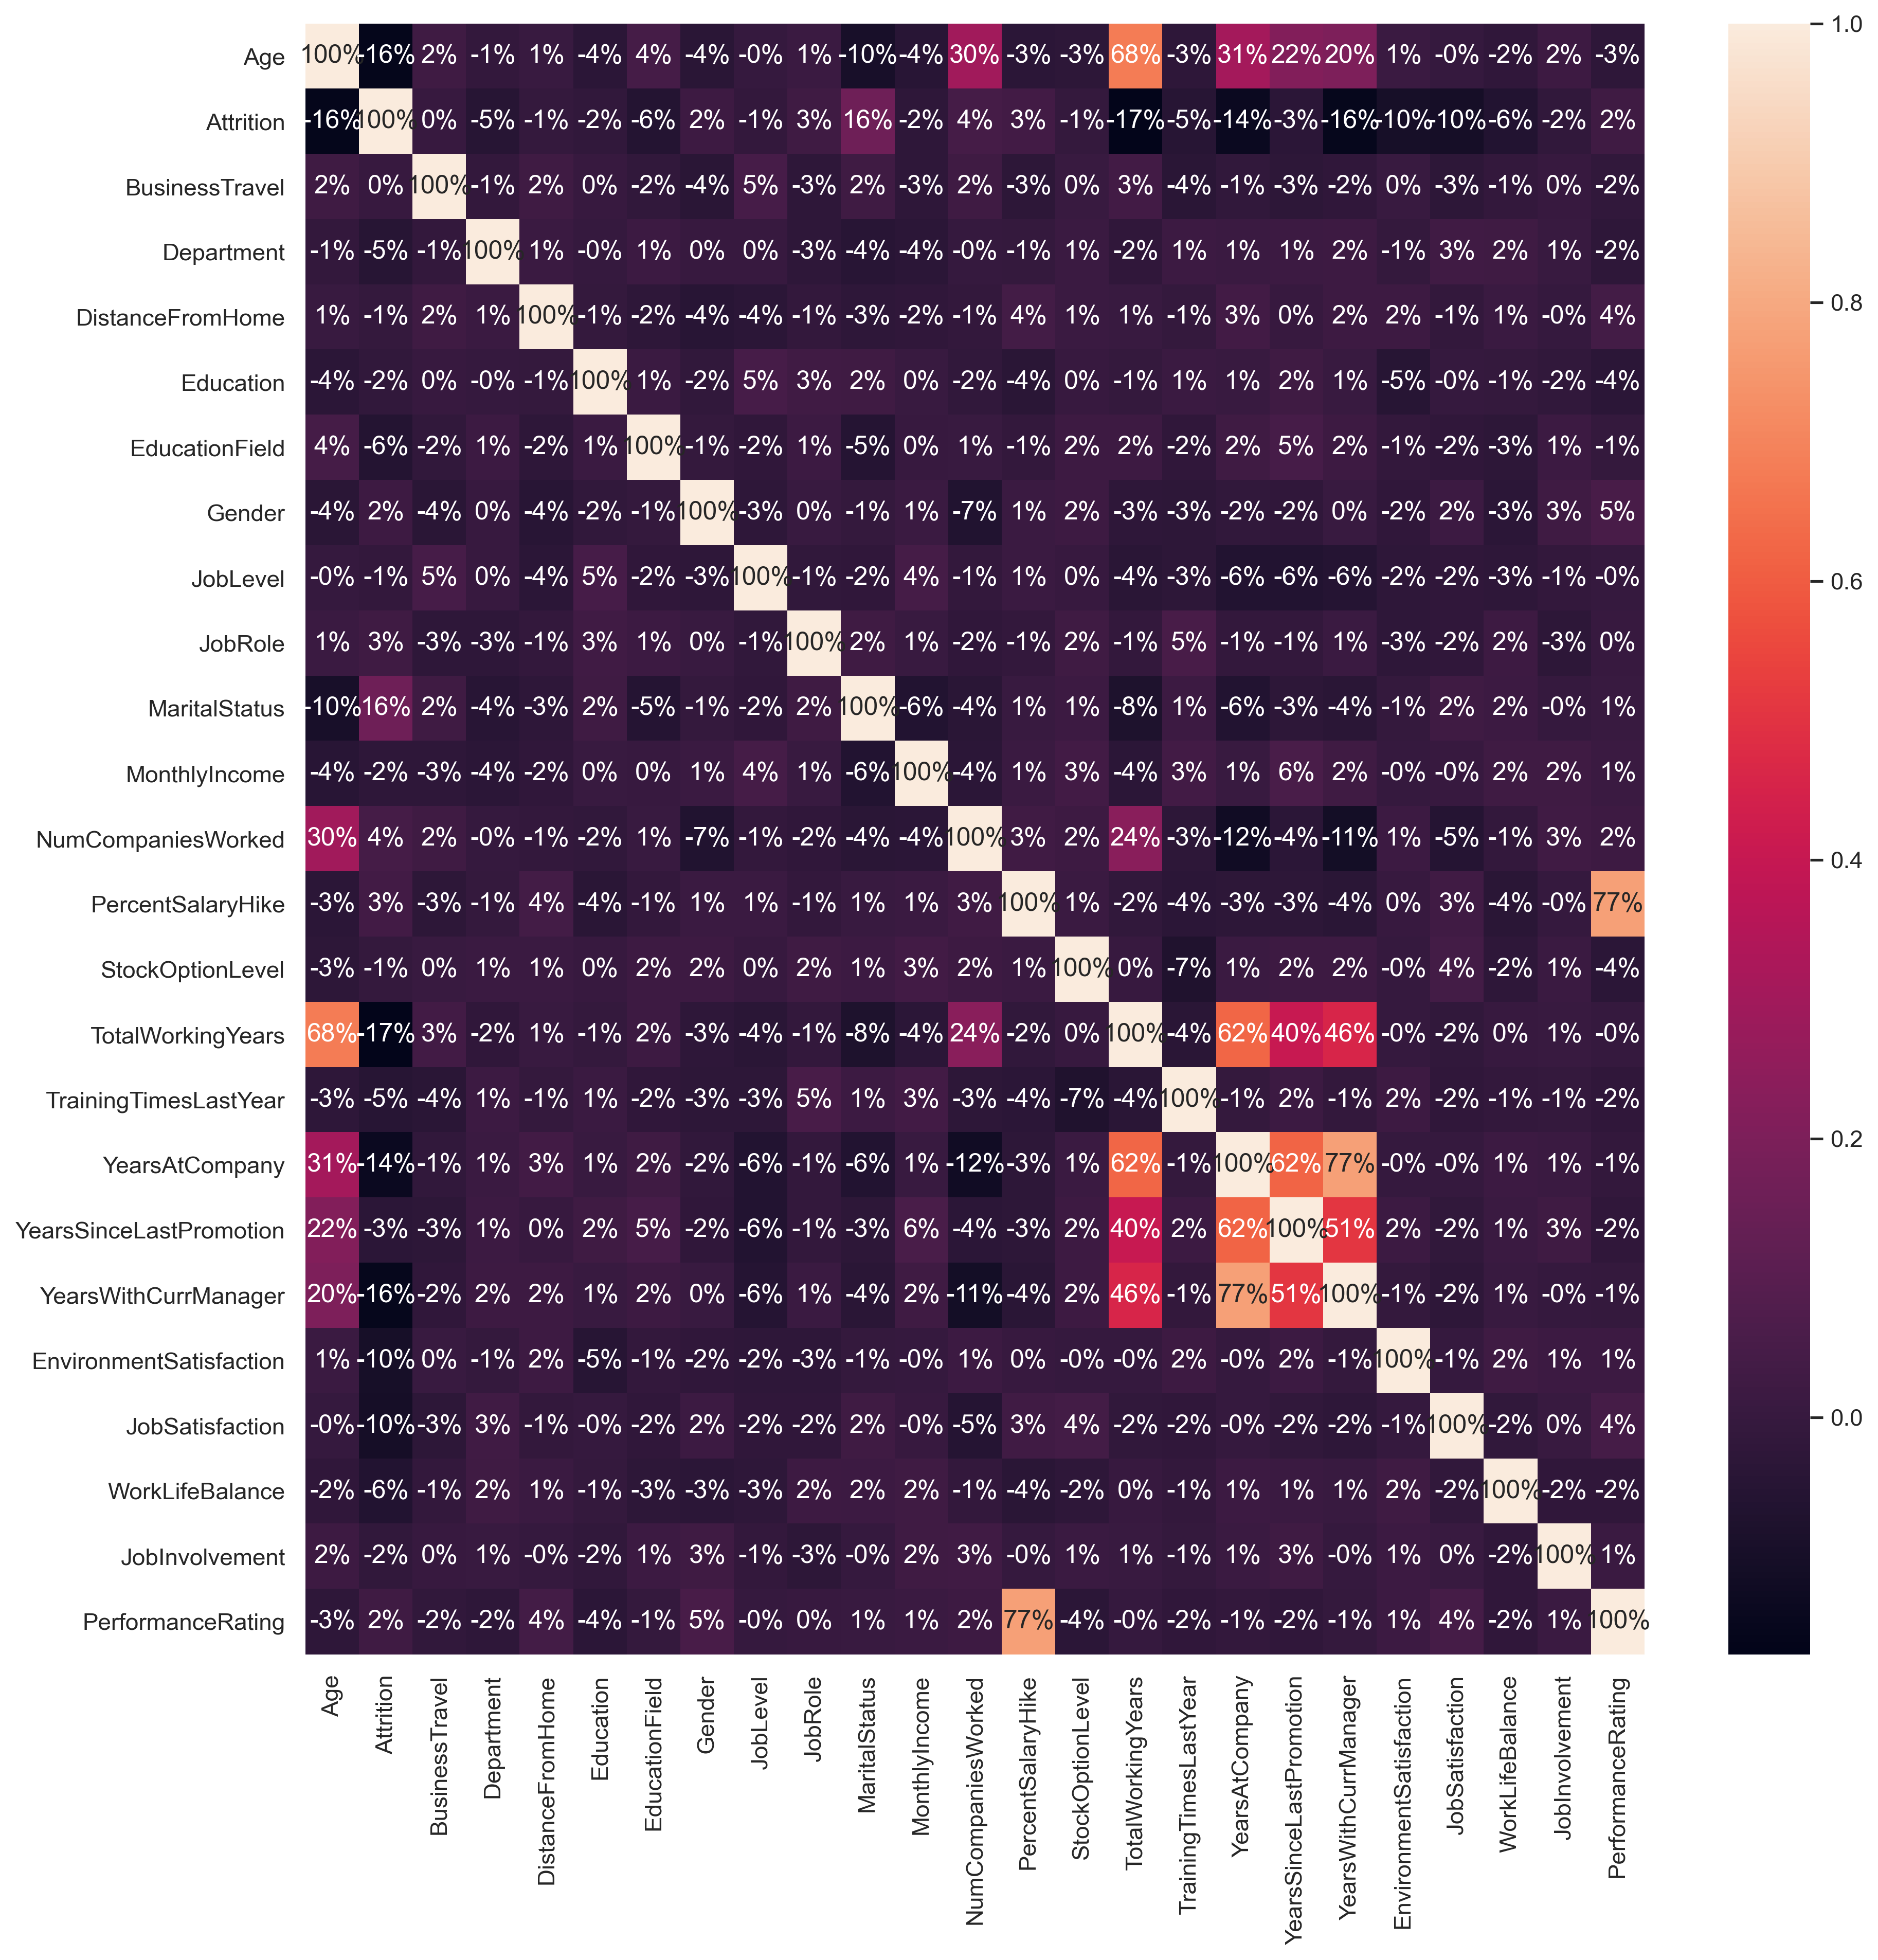

In [121]:
sns.set(font_scale=1.0)
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt = '.0%')

#### Percentage salary hike and performance rating are highly correlated i.e. 77% correlation is there.
#### Years with current manager and years at company is also highly correlated i.e. 77% correlation is there.
#### Similarly, Total working years and age is also correlated, which is obvious also, i.e. 68% correlation is there.
#### Years at Company is also correlated with Total working years i.e. 62% correlation is there.
#### Years at Company is also correlated with Years since last promotion i.e. 62% correlation is there.
#### Years with current manager and years since last promotion is also 51% correlated.
#### Others few column also have correlation with another column but that all are have below 50% correlated.

# Seperating Attrition column

In [122]:
x = df.drop("Attrition", axis=1)
y = df.Attrition

# Scaling the data

#### Monthly Income column has value too large as comapared to other columns. We should try to take in normal scale which will be comparable to others features.

In [123]:
scaler = MinMaxScaler()
features = scaler.fit_transform(x)
features

array([[0.78571429, 1.        , 1.        , ..., 0.33333333, 0.66666667,
        0.        ],
       [0.30952381, 0.5       , 0.5       , ..., 1.        , 0.33333333,
        1.        ],
       [0.33333333, 0.5       , 0.5       , ..., 0.        , 0.66666667,
        0.        ],
       ...,
       [0.16666667, 1.        , 0.5       , ..., 0.66666667, 0.66666667,
        1.        ],
       [0.57142857, 1.        , 1.        , ..., 0.66666667, 0.33333333,
        0.        ],
       [0.52380952, 1.        , 0.5       , ..., 0.66666667, 1.        ,
        0.        ]])

# Splitting the data into train and test data

In [124]:
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=1) 
x_train

array([[0.19047619, 0.5       , 0.5       , ..., 0.66666667, 0.66666667,
        1.        ],
       [0.42857143, 1.        , 0.5       , ..., 0.66666667, 1.        ,
        0.        ],
       [0.11904762, 1.        , 0.5       , ..., 1.        , 0.66666667,
        0.        ],
       ...,
       [0.45238095, 1.        , 0.5       , ..., 0.        , 0.66666667,
        0.        ],
       [0.66666667, 1.        , 0.5       , ..., 1.        , 0.66666667,
        0.        ],
       [0.61904762, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [125]:
y_train

3296    1
615     0
2620    0
3096    1
516     0
       ..
2895    0
2763    0
905     0
3980    1
235     0
Name: Attrition, Length: 3087, dtype: int32

In [126]:
x_test

array([[0.71428571, 0.        , 1.        , ..., 0.66666667, 0.66666667,
        0.        ],
       [0.07142857, 1.        , 1.        , ..., 0.66666667, 0.66666667,
        0.        ],
       [0.76190476, 0.5       , 1.        , ..., 0.66666667, 0.66666667,
        0.        ],
       ...,
       [0.38095238, 0.5       , 0.5       , ..., 0.33333333, 0.66666667,
        1.        ],
       [0.23809524, 1.        , 0.5       , ..., 0.33333333, 0.33333333,
        0.        ],
       [0.71428571, 0.5       , 1.        , ..., 0.66666667, 0.        ,
        0.        ]])

In [127]:
y_test

2016    0
4118    0
219     0
4402    1
787     0
       ..
137     0
973     0
797     0
3755    0
2416    1
Name: Attrition, Length: 1323, dtype: int32

# Making a Model

# Logistic Regression

In [128]:
lr =LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1100
           1       0.67      0.12      0.20       223

    accuracy                           0.84      1323
   macro avg       0.76      0.55      0.56      1323
weighted avg       0.82      0.84      0.79      1323

Accuracy: 0.8412698412698413
Precision: 0.6666666666666666
Recall: 0.11659192825112108


#### Accuracy = Proportion of correct prediction over total prediction
#### When an employee left, how often does my classifier predict that correctly? This measurement is called “recall”
#### Recall = Out of actual positive(True positive + False negative), how many are True positive
#### Precision Out of predicted positive (true positive + False positive), how many are True positive

In [129]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.8522837706511176
0.8412698412698413


## Confusion matrix of Logistic regression model

<AxesSubplot:>

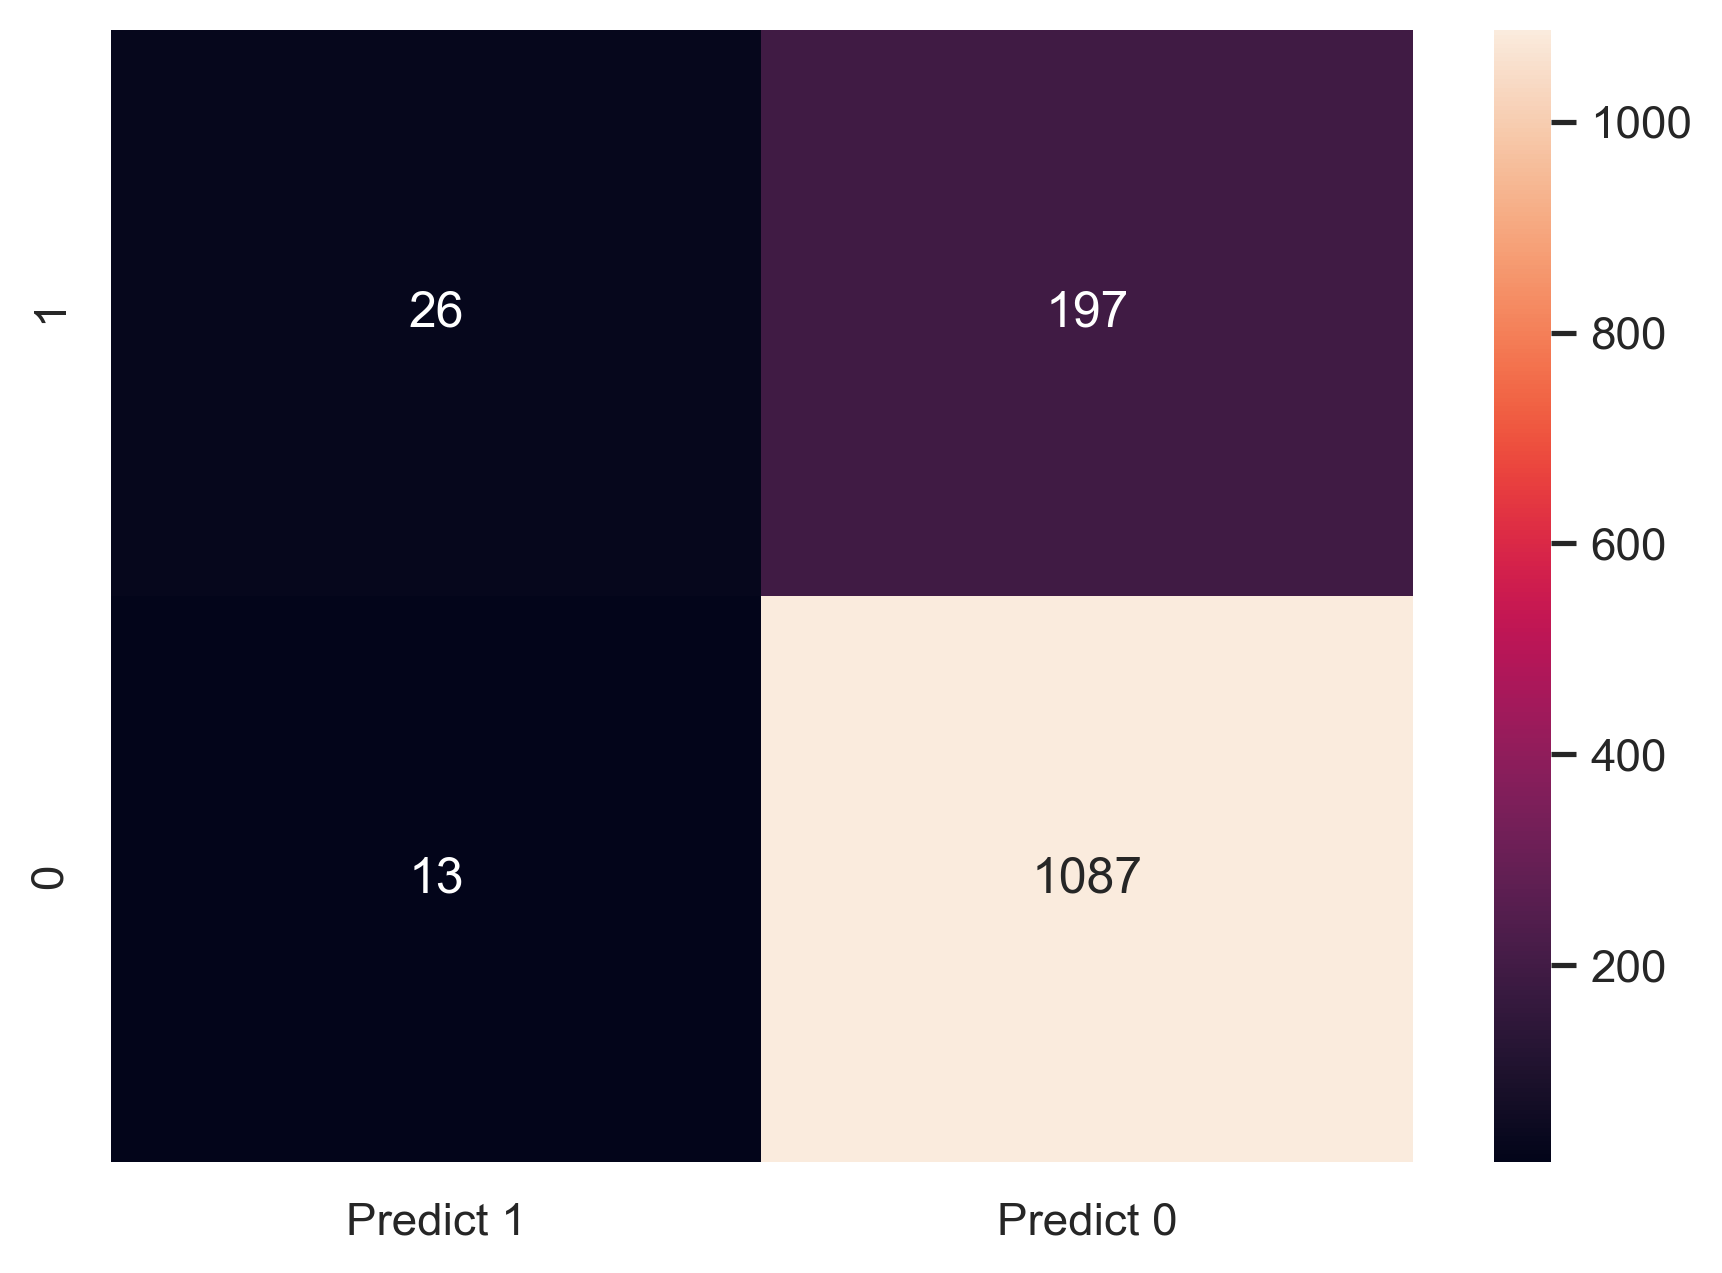

In [130]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## AUC of Logistic regression model

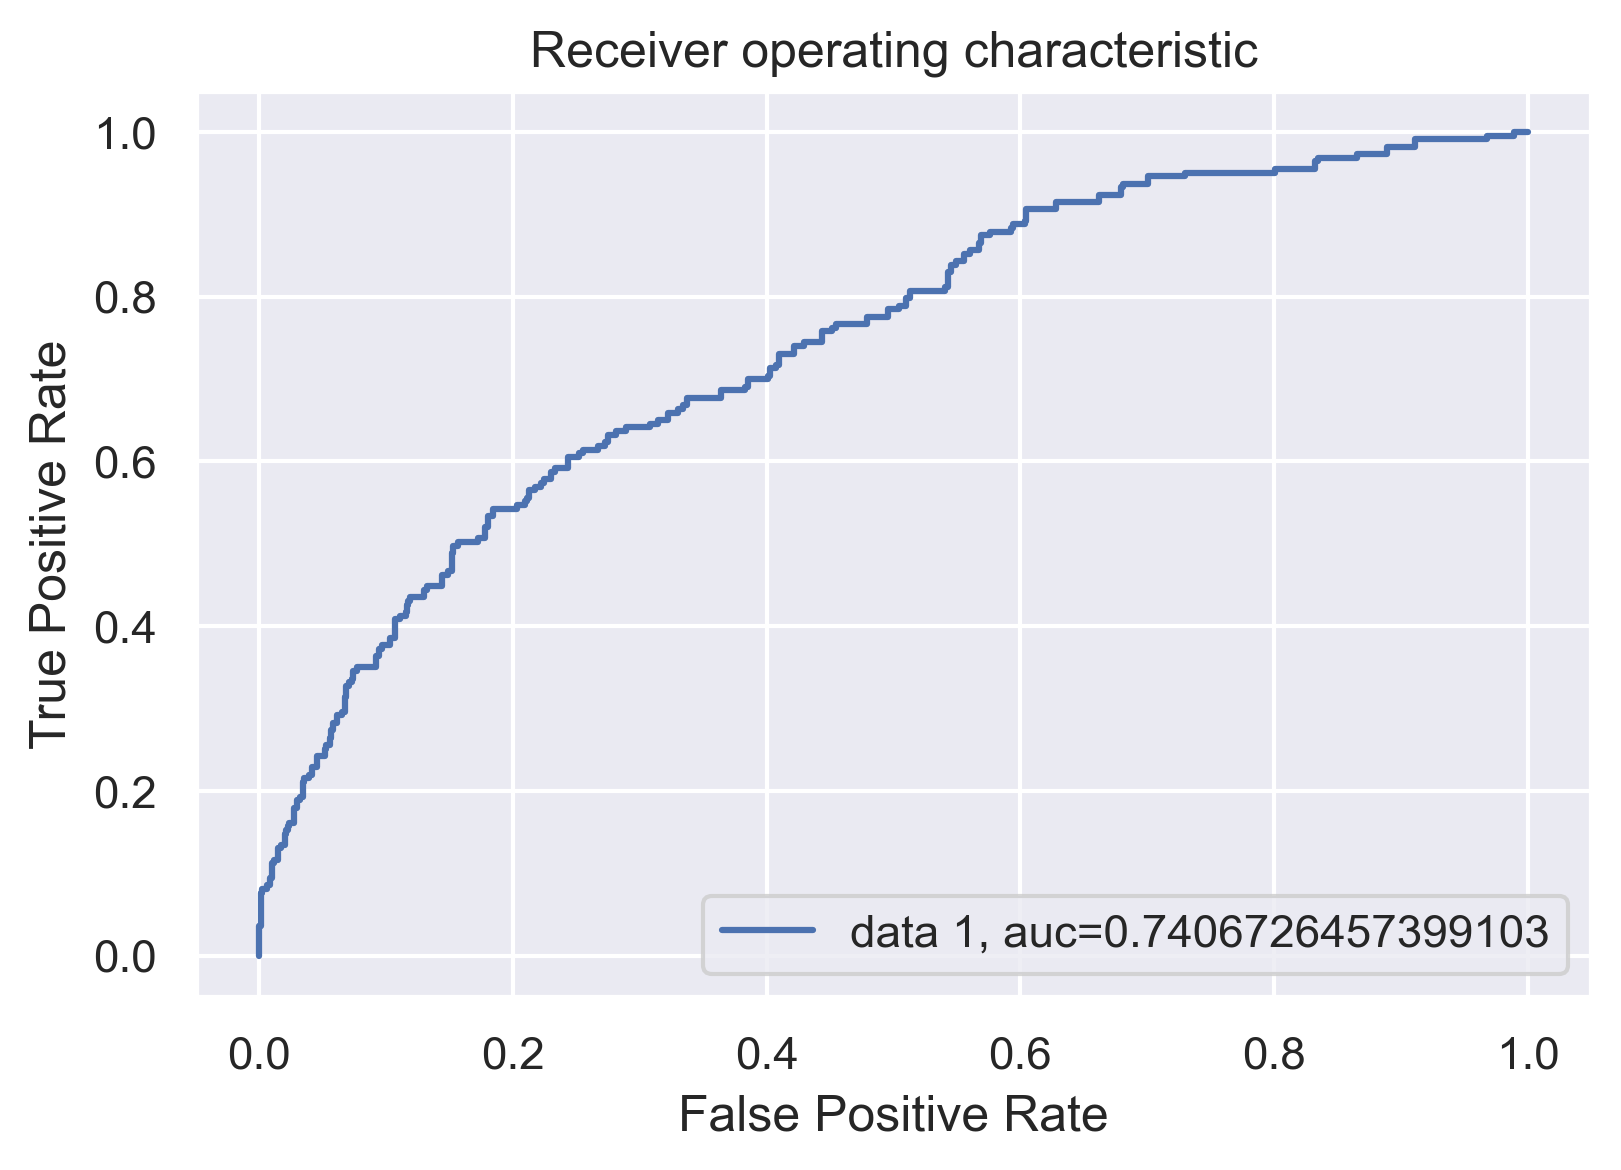

In [131]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Decision Tree Classifier

In [132]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
dt.fit(x_train,y_train)
y_pred1 = dt.predict(x_test)

print(classification_report(y_test, y_pred1))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1100
           1       0.94      0.91      0.92       223

    accuracy                           0.97      1323
   macro avg       0.96      0.95      0.95      1323
weighted avg       0.97      0.97      0.97      1323

Accuracy: 0.9743008314436886
Precision: 0.9395348837209302
Recall: 0.905829596412556


In [133]:
print(dt.score(x_train,y_train))
print(dt.score(x_test,y_test))

1.0
0.9743008314436886


## Confusion matrix of DecisionTree model

<AxesSubplot:>

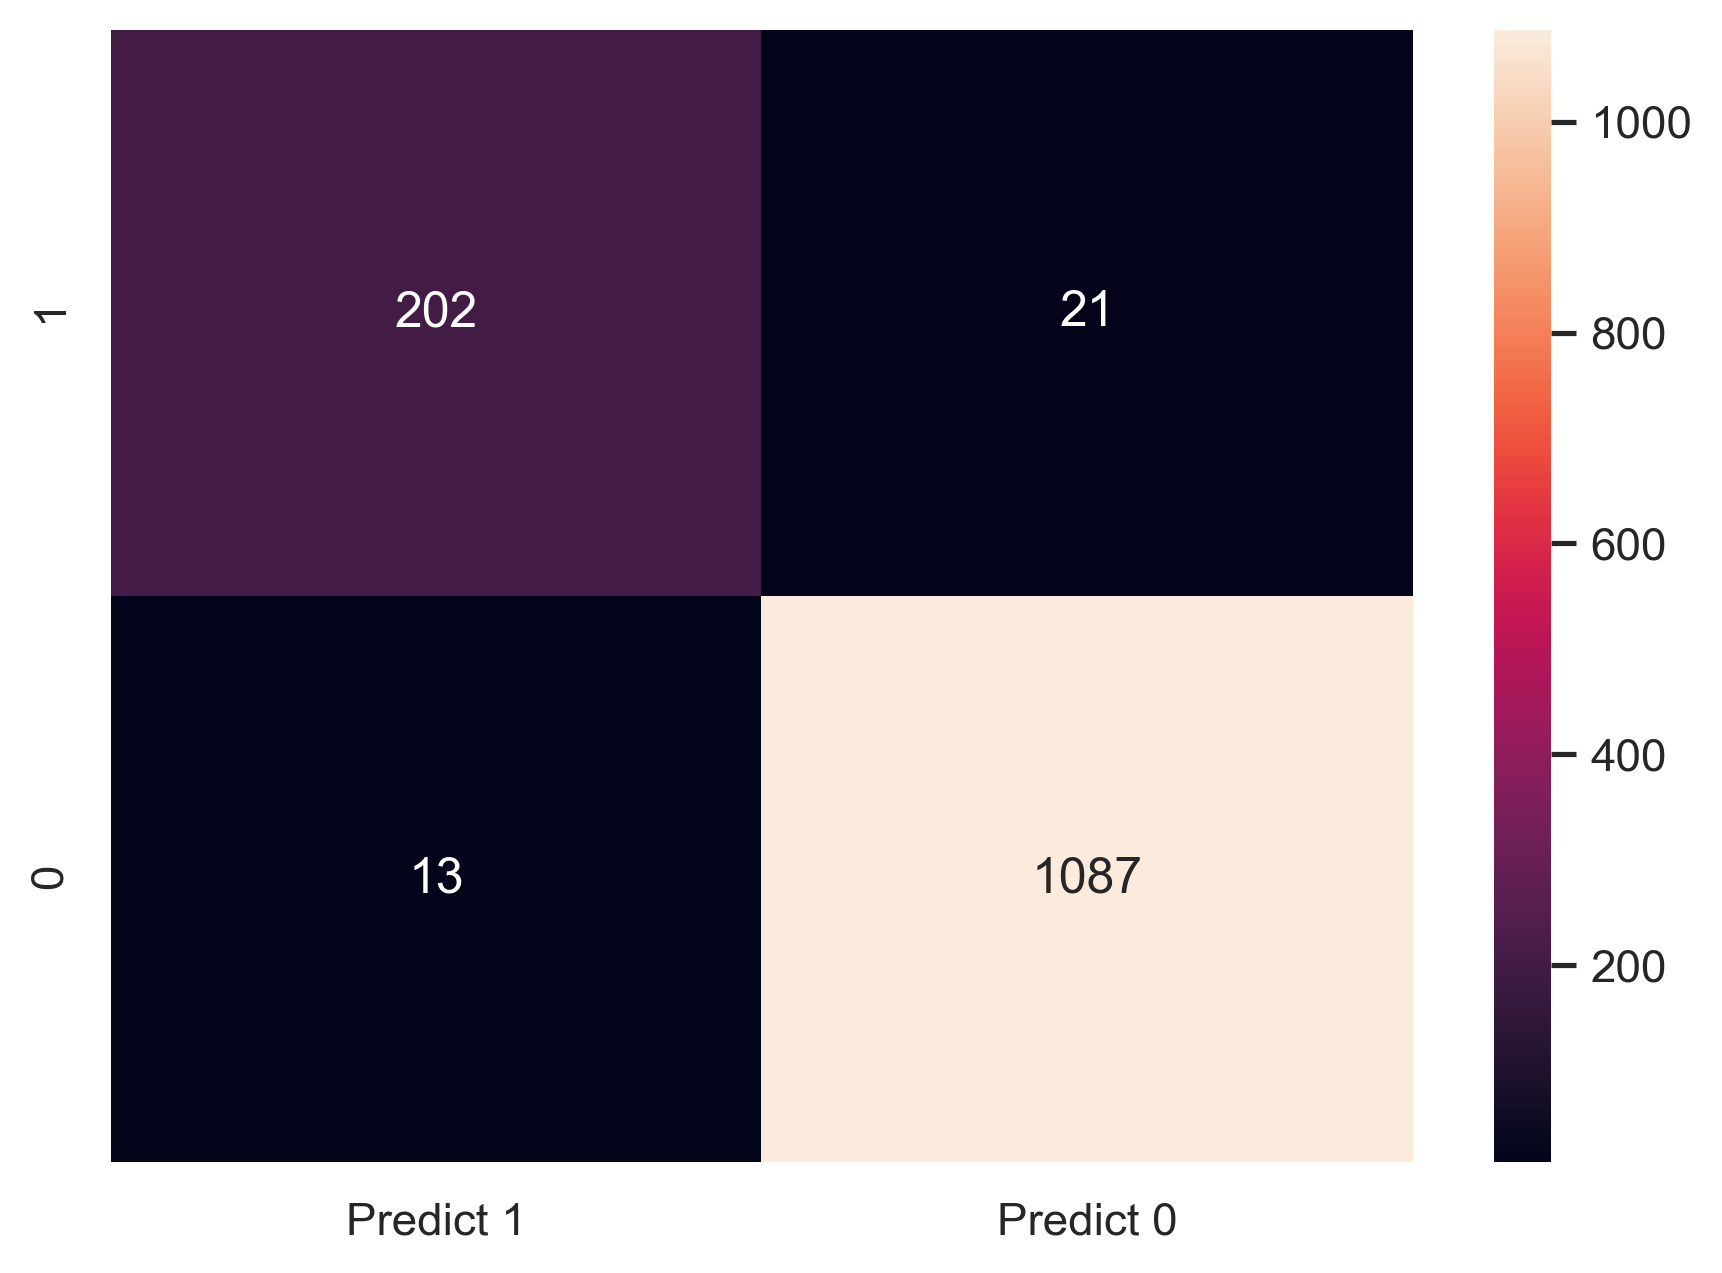

In [134]:
cm = metrics.confusion_matrix(y_test, y_pred1, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## AUC of DecisionTree model

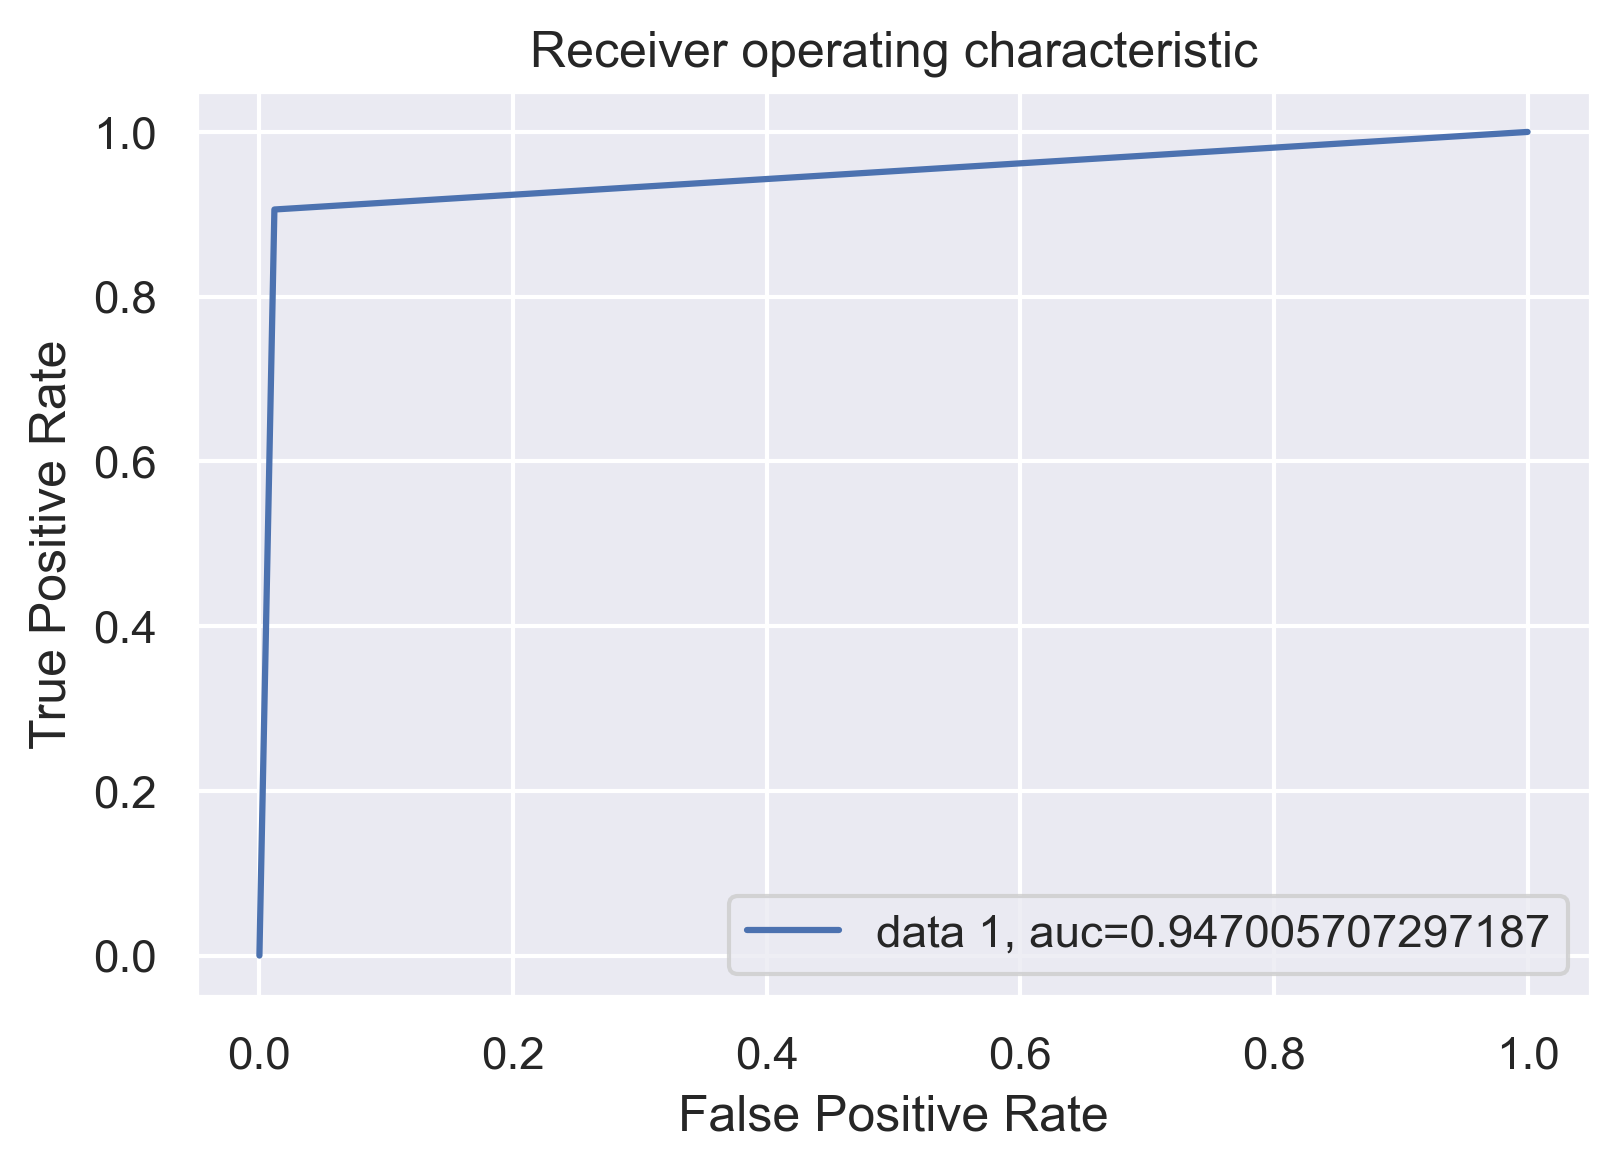

In [135]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Ensemble learning - Bagging

In [136]:
bgcl = BaggingClassifier(n_estimators = 100, base_estimator=dt, random_state=42)

bgcl = bgcl.fit(x_train, y_train)
y_pred3 = bgcl.predict(x_test)

In [137]:
print(classification_report(y_test, y_pred3))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print("Precision:",metrics.precision_score(y_test, y_pred3))
print("Recall:",metrics.recall_score(y_test, y_pred3))

print("\n")
print(bgcl.score(x_train,y_train))
print(bgcl.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1100
           1       1.00      0.89      0.94       223

    accuracy                           0.98      1323
   macro avg       0.99      0.94      0.96      1323
weighted avg       0.98      0.98      0.98      1323

Accuracy: 0.981103552532124
Precision: 1.0
Recall: 0.8878923766816144


1.0
0.981103552532124


## Confusion Matrix of Bagging model

<AxesSubplot:>

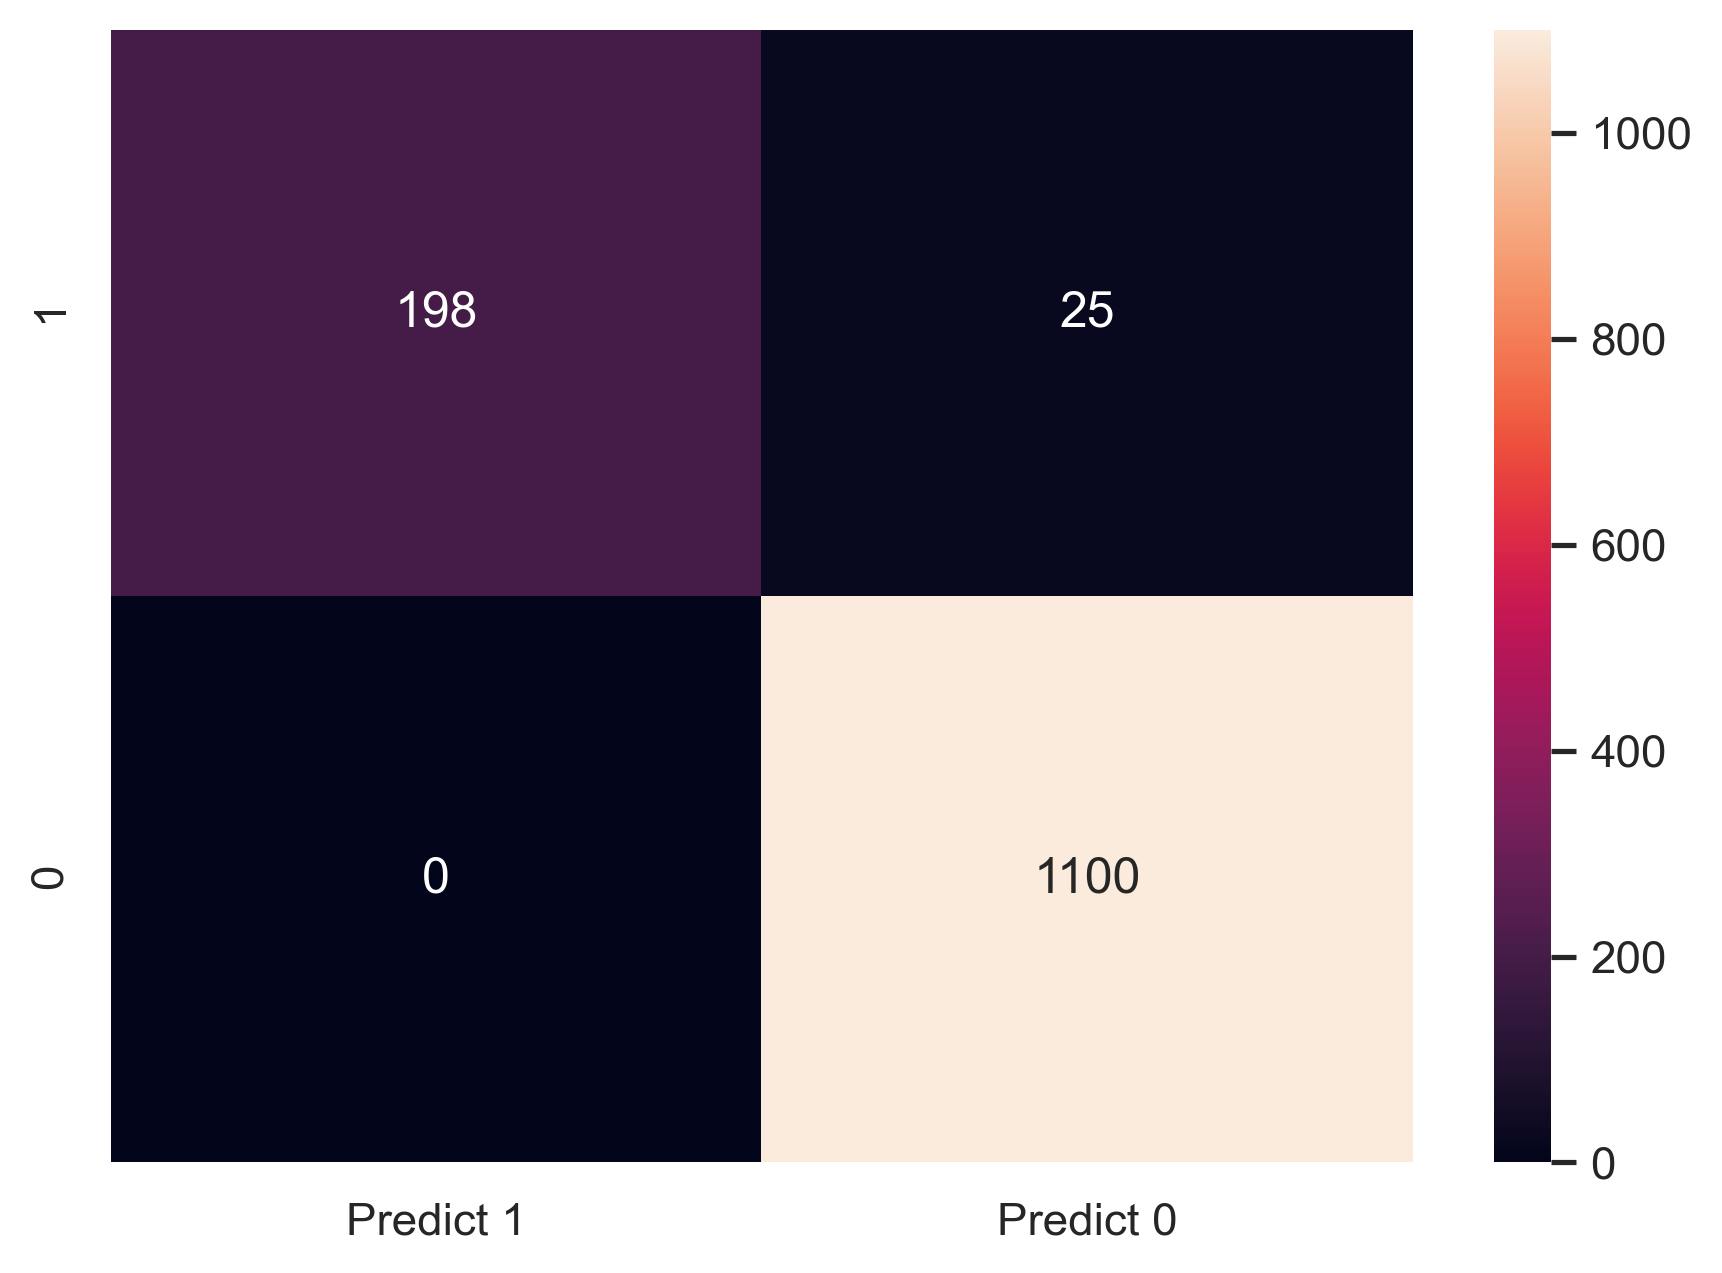

In [138]:
cm = metrics.confusion_matrix(y_test, y_pred3, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## AUC of Bagging model

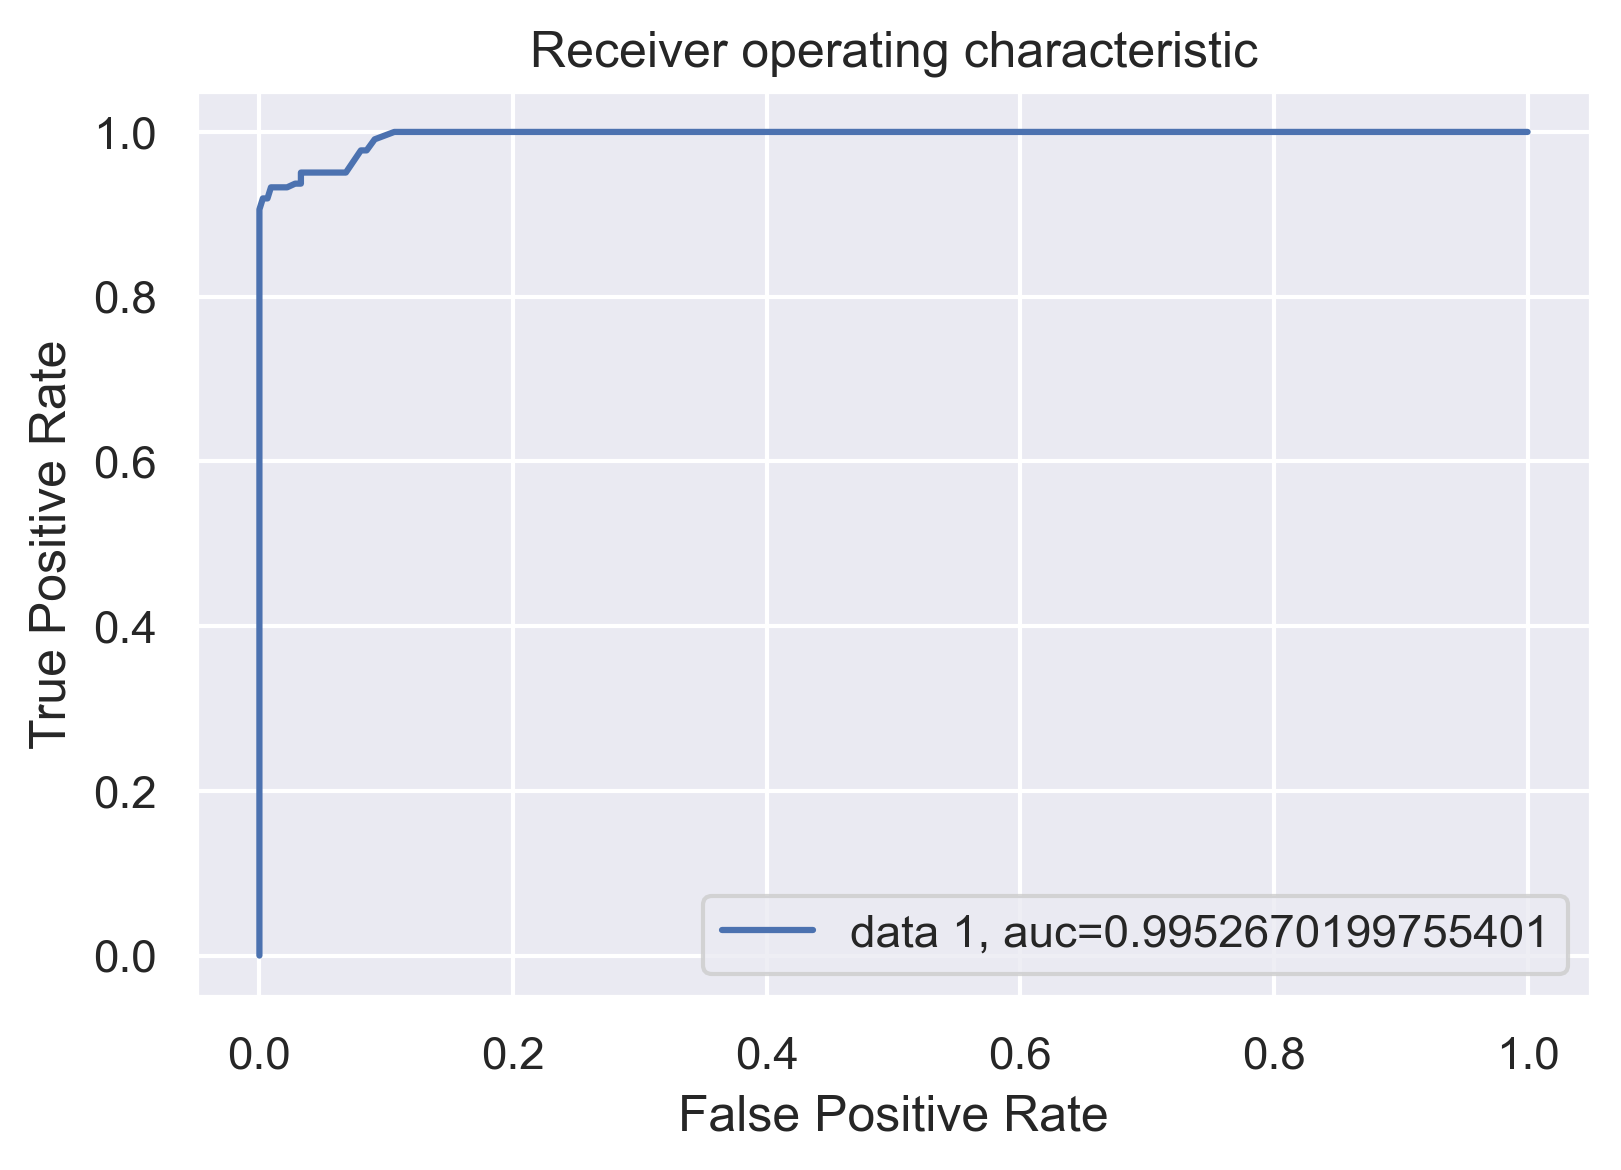

In [139]:
y_pred_proba = bgcl.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Ensemble learning - AdaBoosting

In [140]:
abcl = AdaBoostClassifier(n_estimators=45, random_state=42)
abcl = abcl.fit(x_train, y_train)
y_pred4 = abcl.predict(x_test)

In [141]:
print(classification_report(y_test, y_pred4))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))
print("Precision:",metrics.precision_score(y_test, y_pred4))
print("Recall:",metrics.recall_score(y_test, y_pred4))

print("\n")
print(abcl.score(x_train,y_train))
print(abcl.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1100
           1       0.67      0.28      0.39       223

    accuracy                           0.86      1323
   macro avg       0.77      0.63      0.66      1323
weighted avg       0.84      0.86      0.83      1323

Accuracy: 0.8556311413454271
Precision: 0.6739130434782609
Recall: 0.27802690582959644


0.876255264010366
0.8556311413454271


## Confusion Matrix AdaBoosting model

<AxesSubplot:>

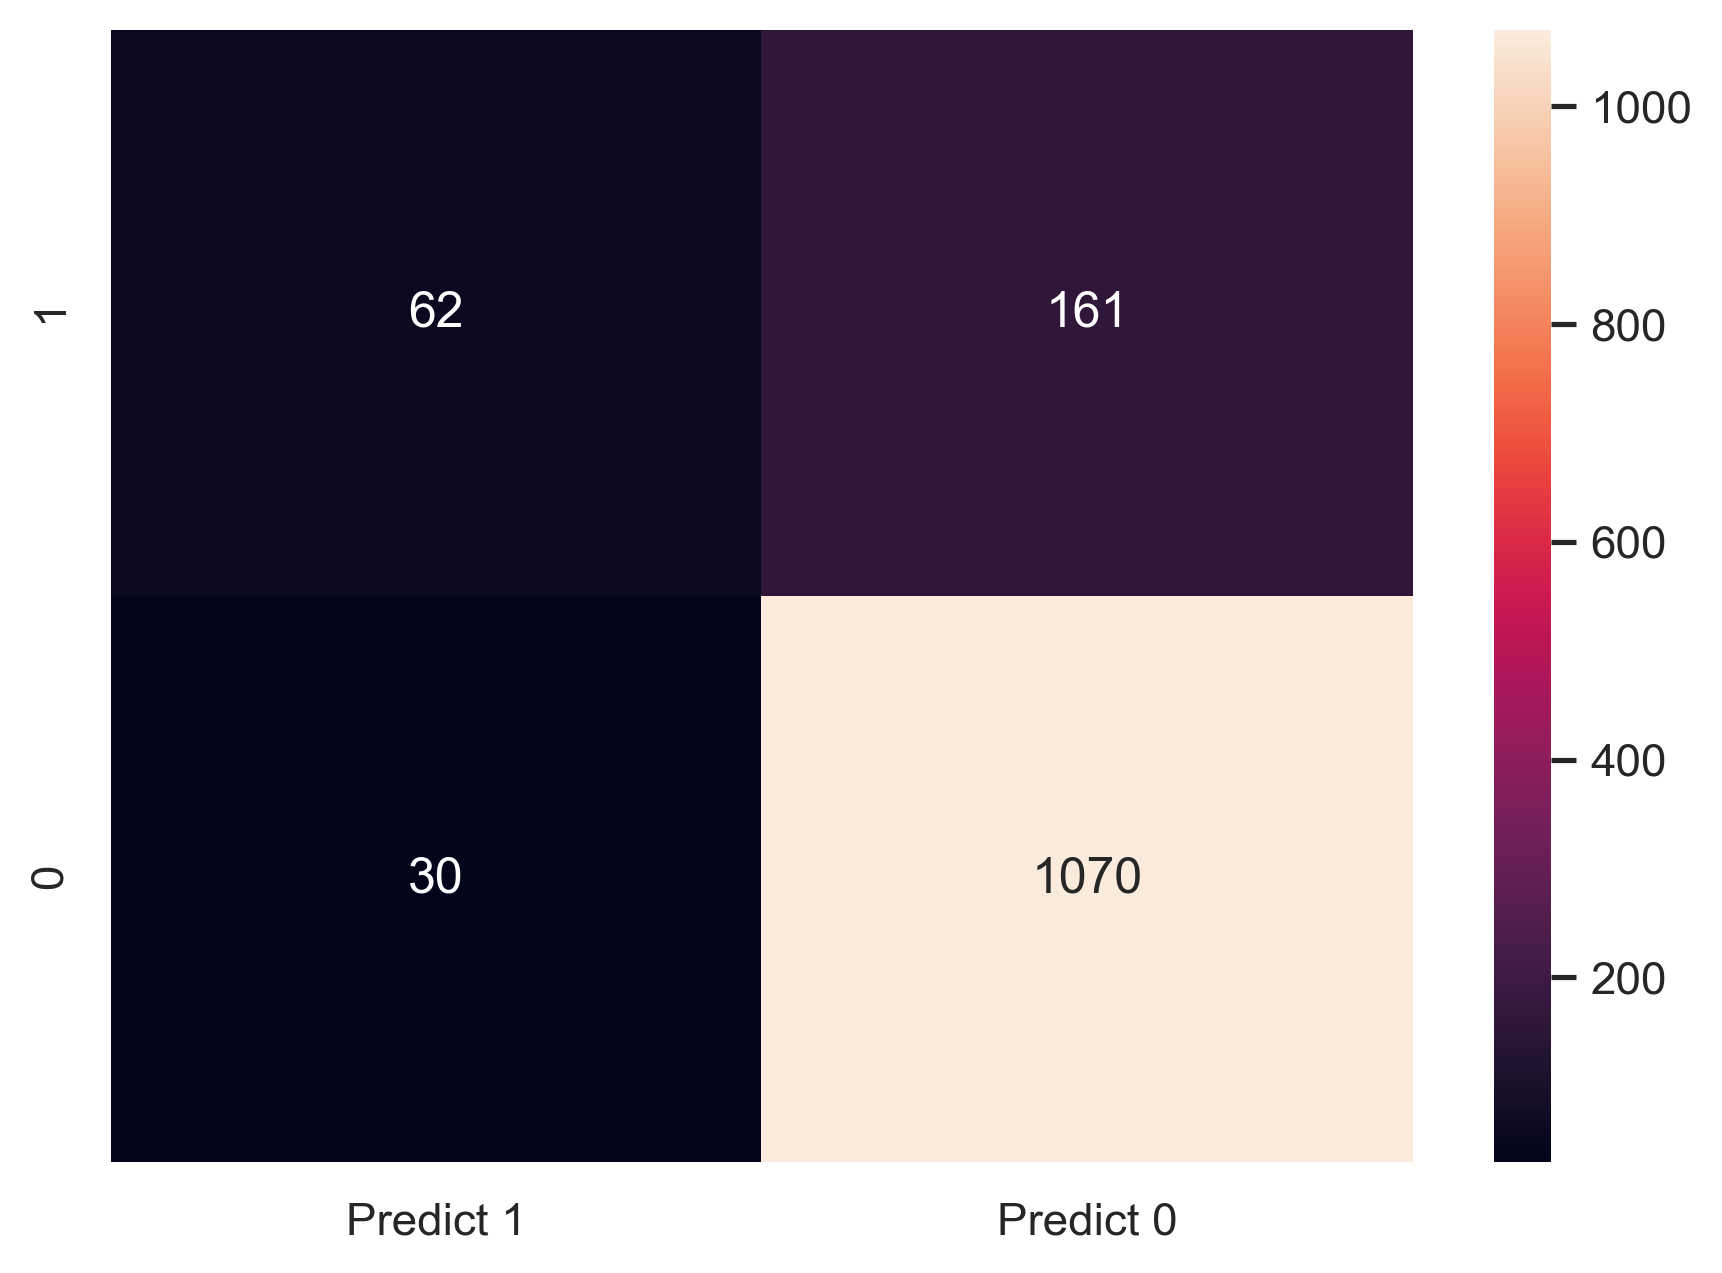

In [142]:
cm = metrics.confusion_matrix(y_test, y_pred4, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## AUC of Adaboosting model

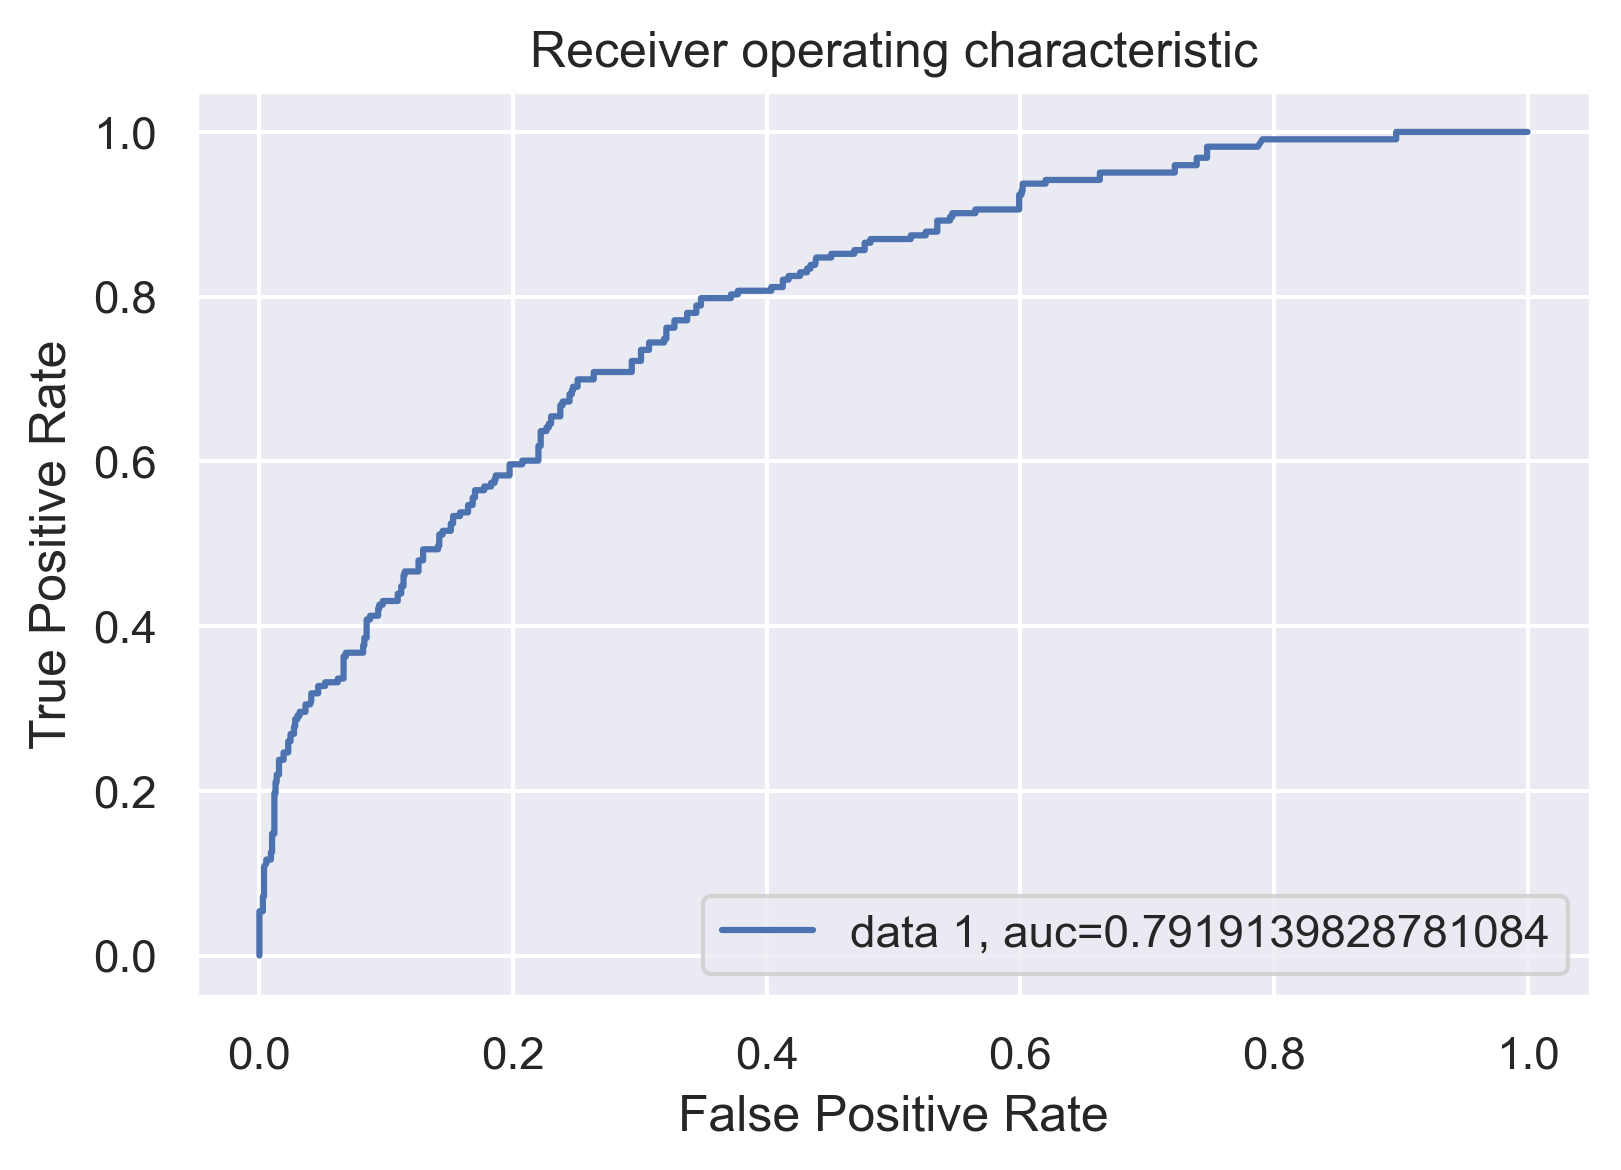

In [143]:
y_pred_proba = abcl.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Random forest classifier

In [144]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(x_train,y_train)
y_pred2 = rf.predict(x_test)

print(classification_report(y_test, y_pred2))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1100
           1       1.00      0.89      0.94       223

    accuracy                           0.98      1323
   macro avg       0.99      0.95      0.97      1323
weighted avg       0.98      0.98      0.98      1323

Accuracy: 0.981859410430839
Precision: 1.0
Recall: 0.8923766816143498


In [145]:
print(rf.score(x_train,y_train))
print(rf.score(x_test,y_test))

1.0
0.981859410430839


## Confusion matrix of Random forest classifier model

<AxesSubplot:>

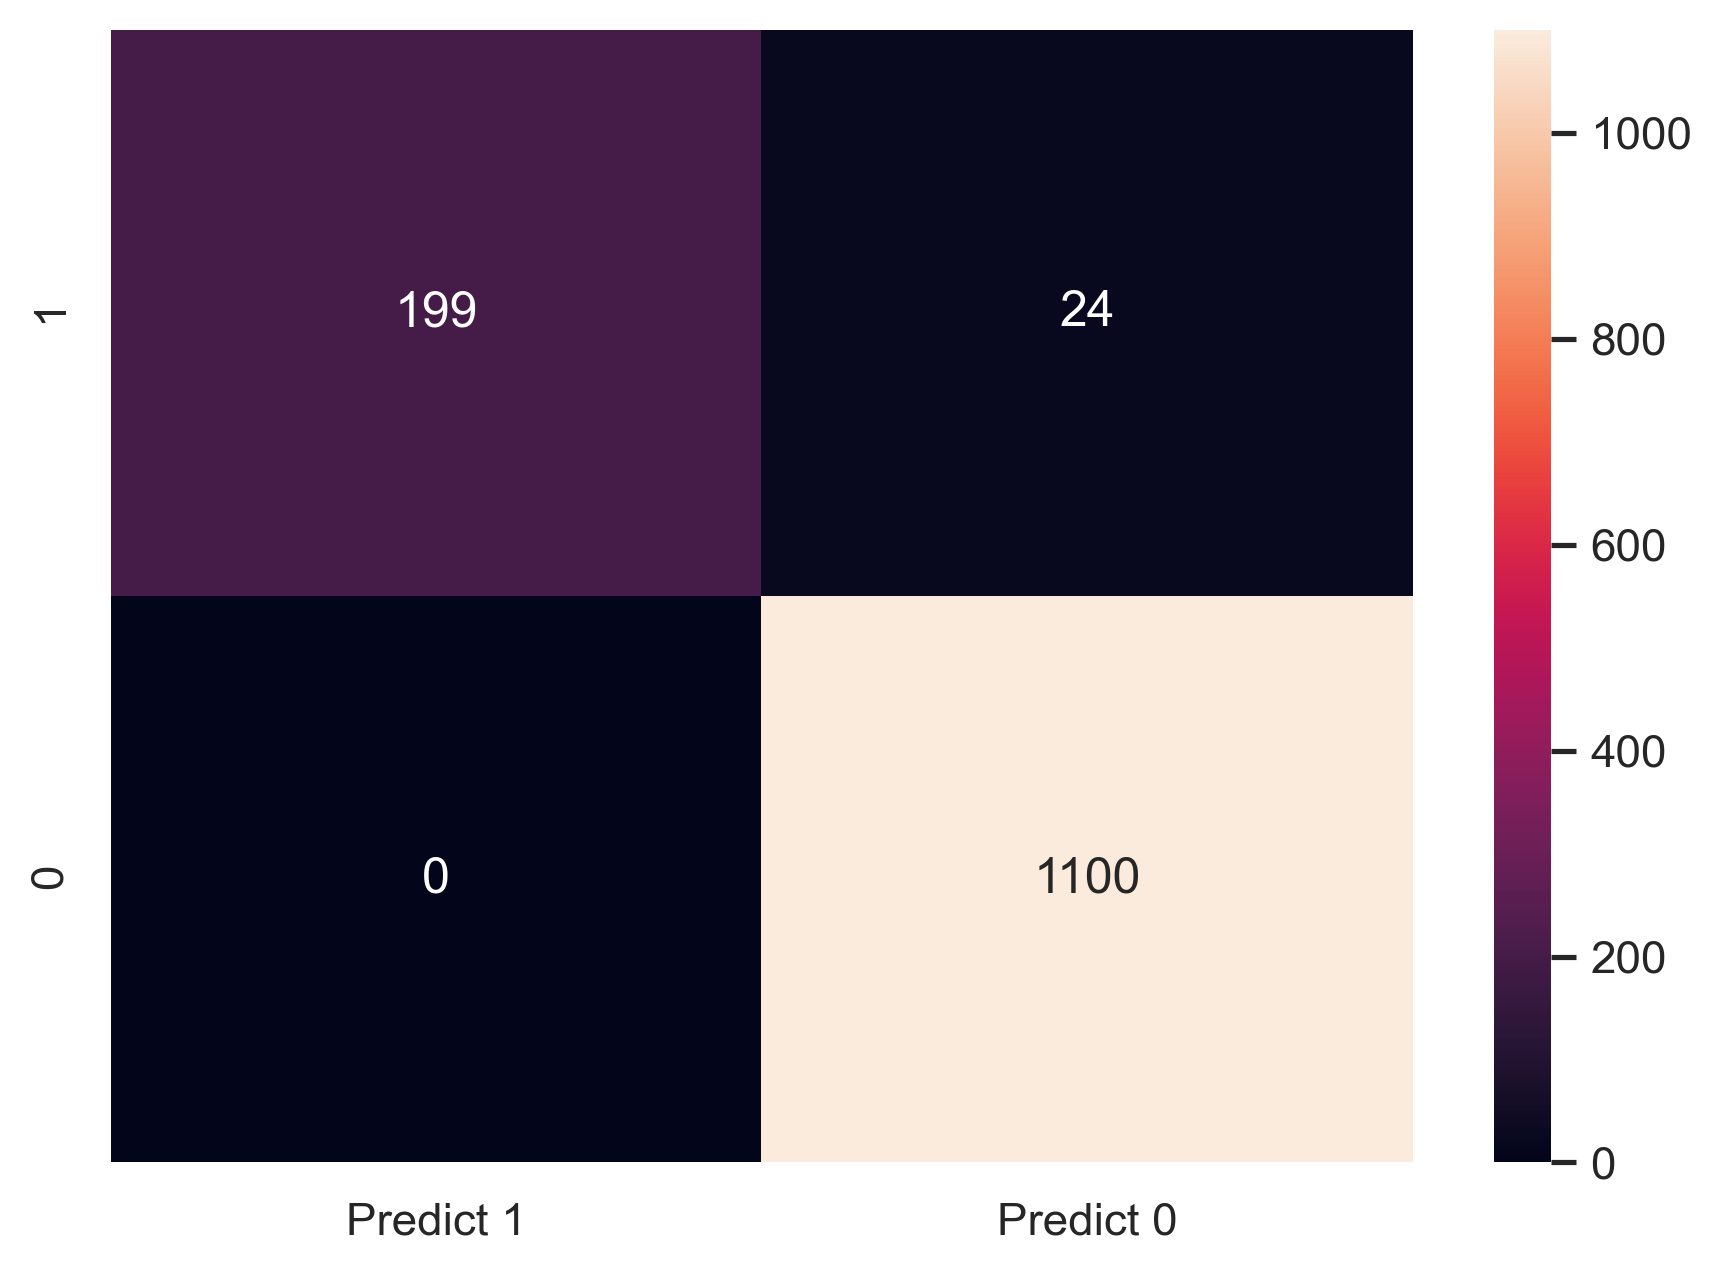

In [146]:
cm = metrics.confusion_matrix(y_test, y_pred2, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## AUC of Random forest classifier model

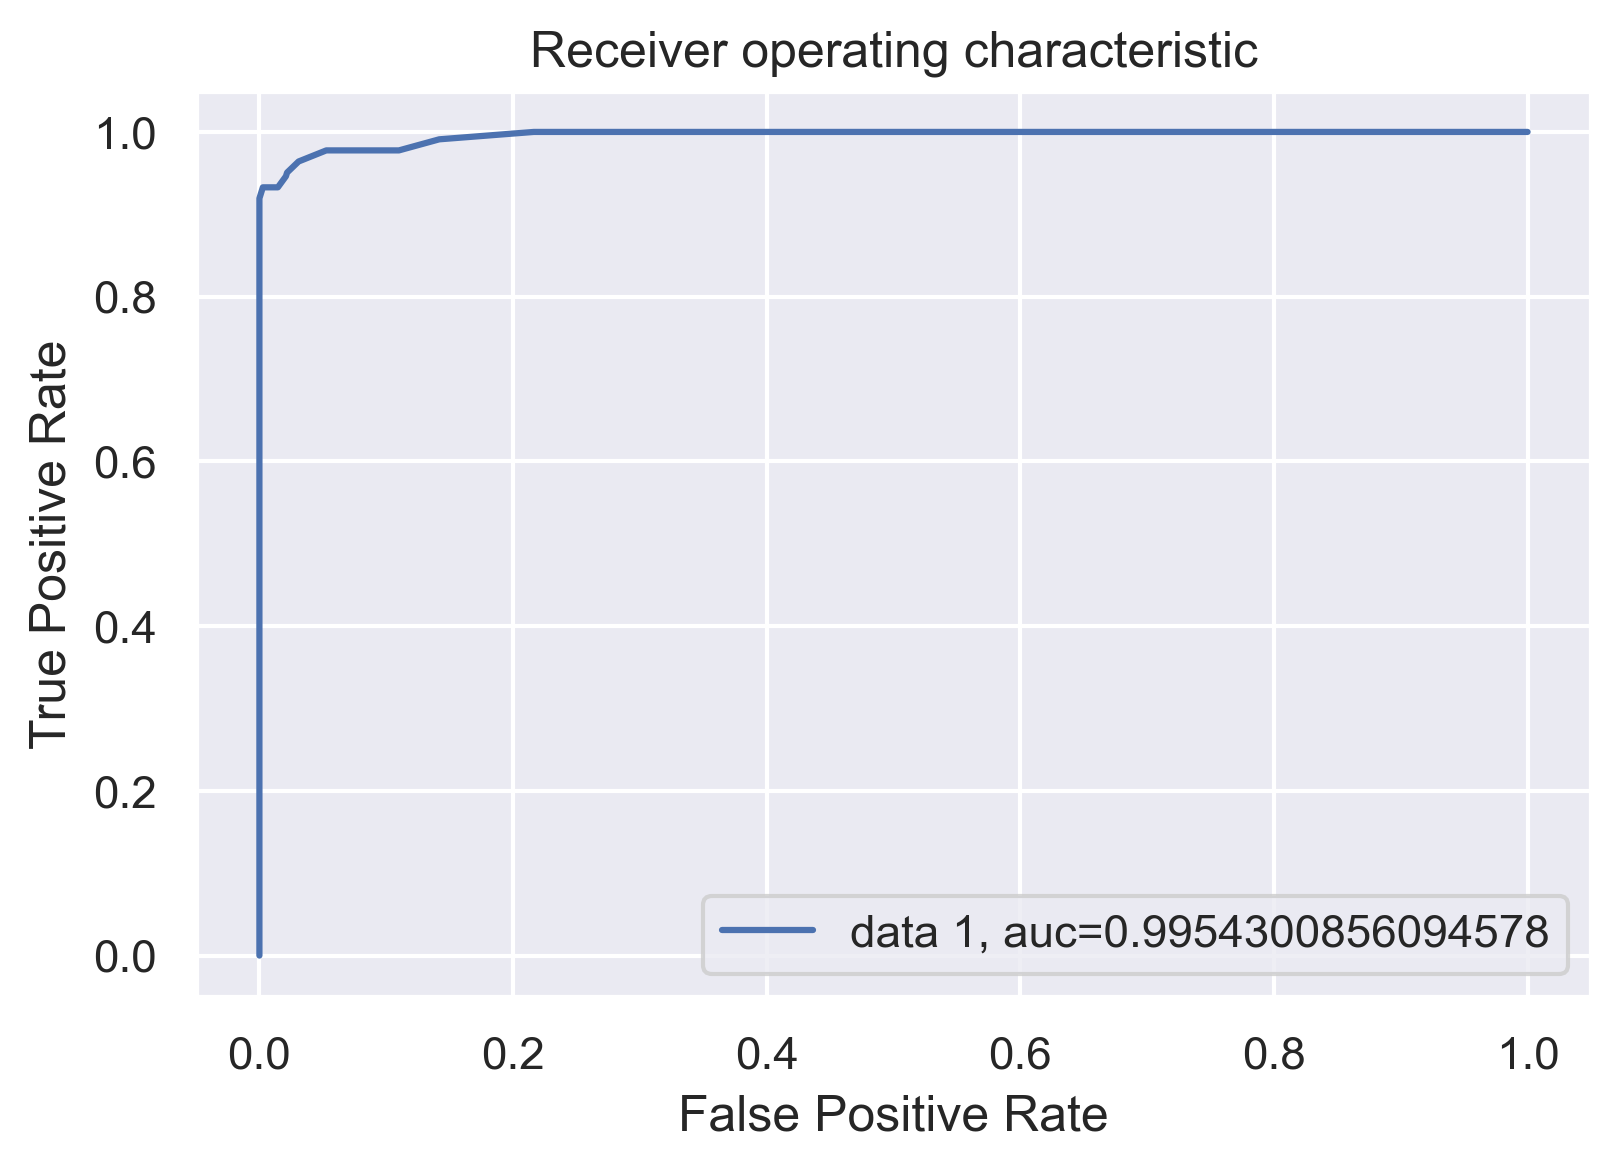

In [147]:
y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# kNN

In [148]:
knn = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)
print("Test accuracy: ",knn.score(x_test, y_test))
print("Train accuracy: ",knn.score(x_train,y_train))

Test accuracy:  0.8390022675736961
Train accuracy:  0.876255264010366


In [149]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1100
           1       0.55      0.24      0.34       223

    accuracy                           0.84      1323
   macro avg       0.71      0.60      0.62      1323
weighted avg       0.81      0.84      0.81      1323



## Confusion Matrix of kNN

<AxesSubplot:>

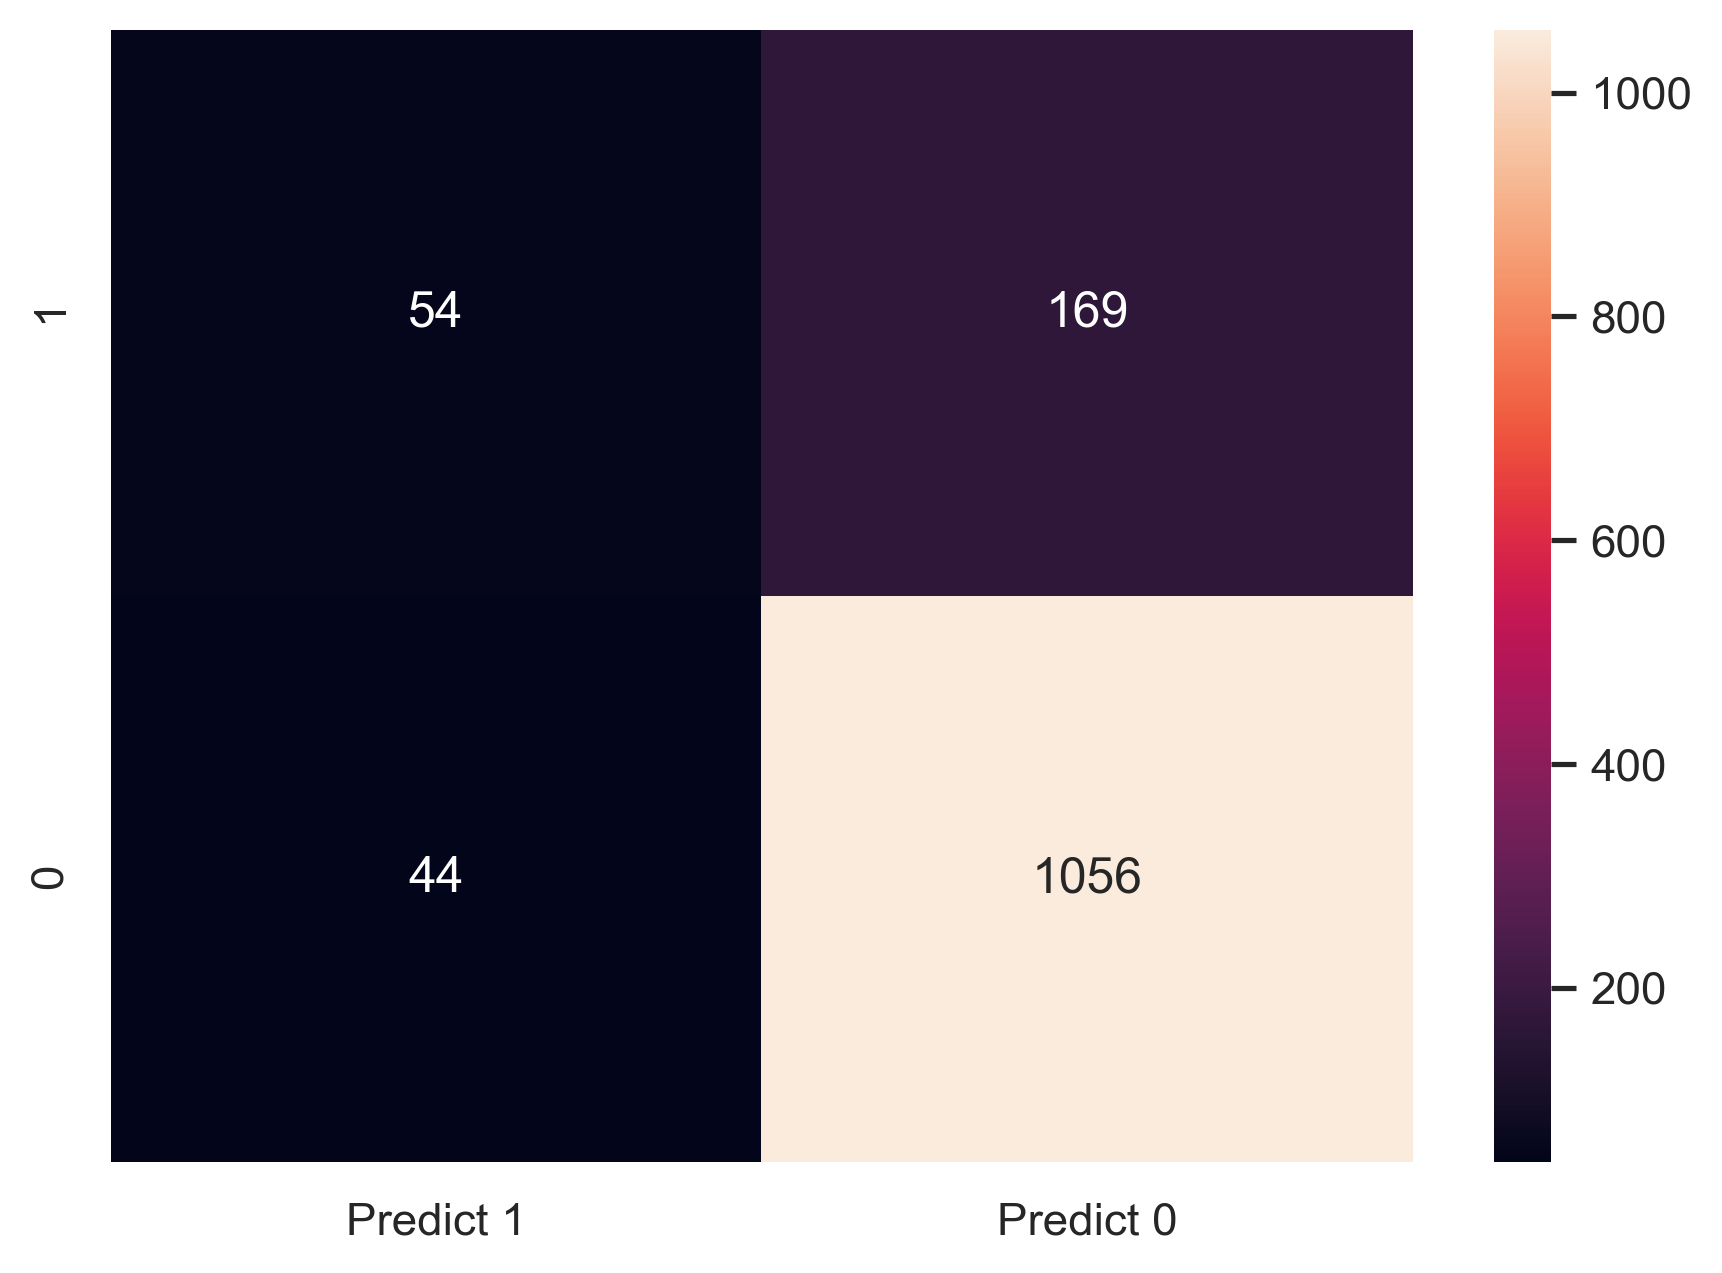

In [150]:
cm = metrics.confusion_matrix(y_test, y_pred_knn, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## AUC of kNN

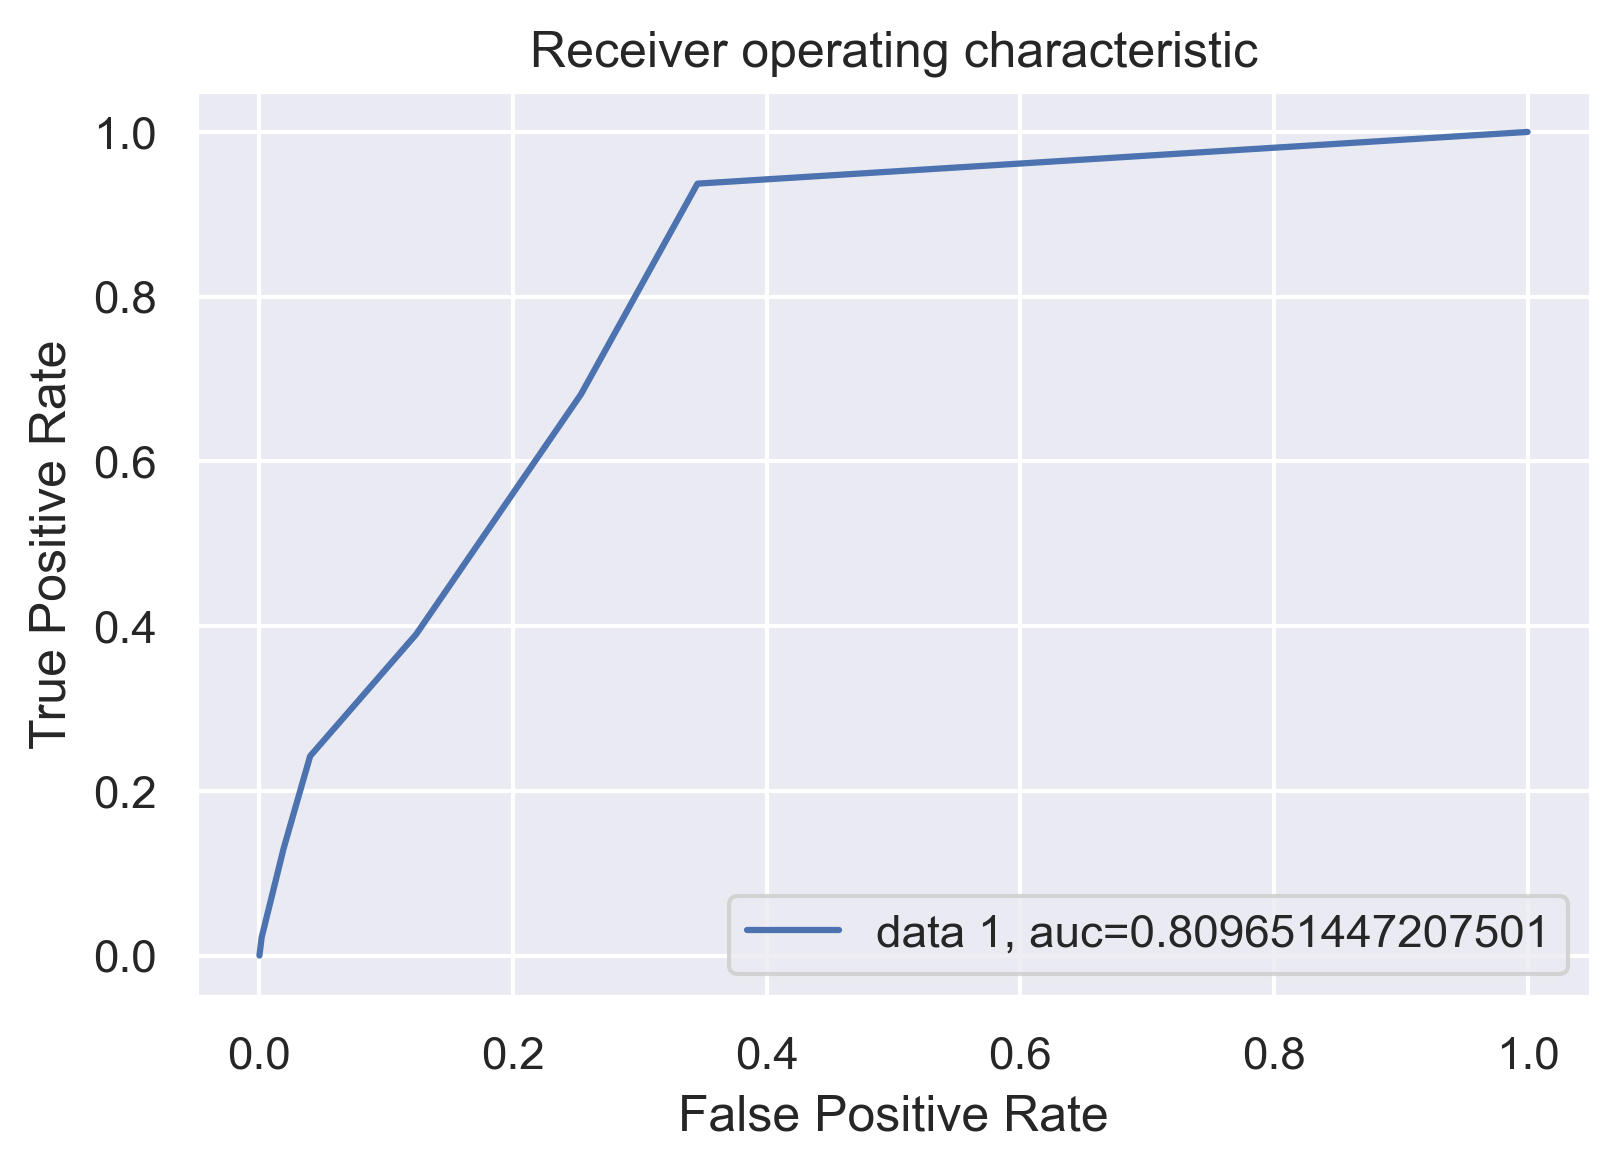

In [151]:
y_pred_proba = knn.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [152]:
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

print("Test accuracy: ",xgb.score(x_test, y_test))
print("Train accuracy: ",xgb.score(x_train,y_train))

[10:14:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test accuracy:  0.9780801209372638
Train accuracy:  1.0


In [153]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1100
           1       1.00      0.87      0.93       223

    accuracy                           0.98      1323
   macro avg       0.99      0.93      0.96      1323
weighted avg       0.98      0.98      0.98      1323



## Confusion Matrix of XGBoost

<AxesSubplot:>

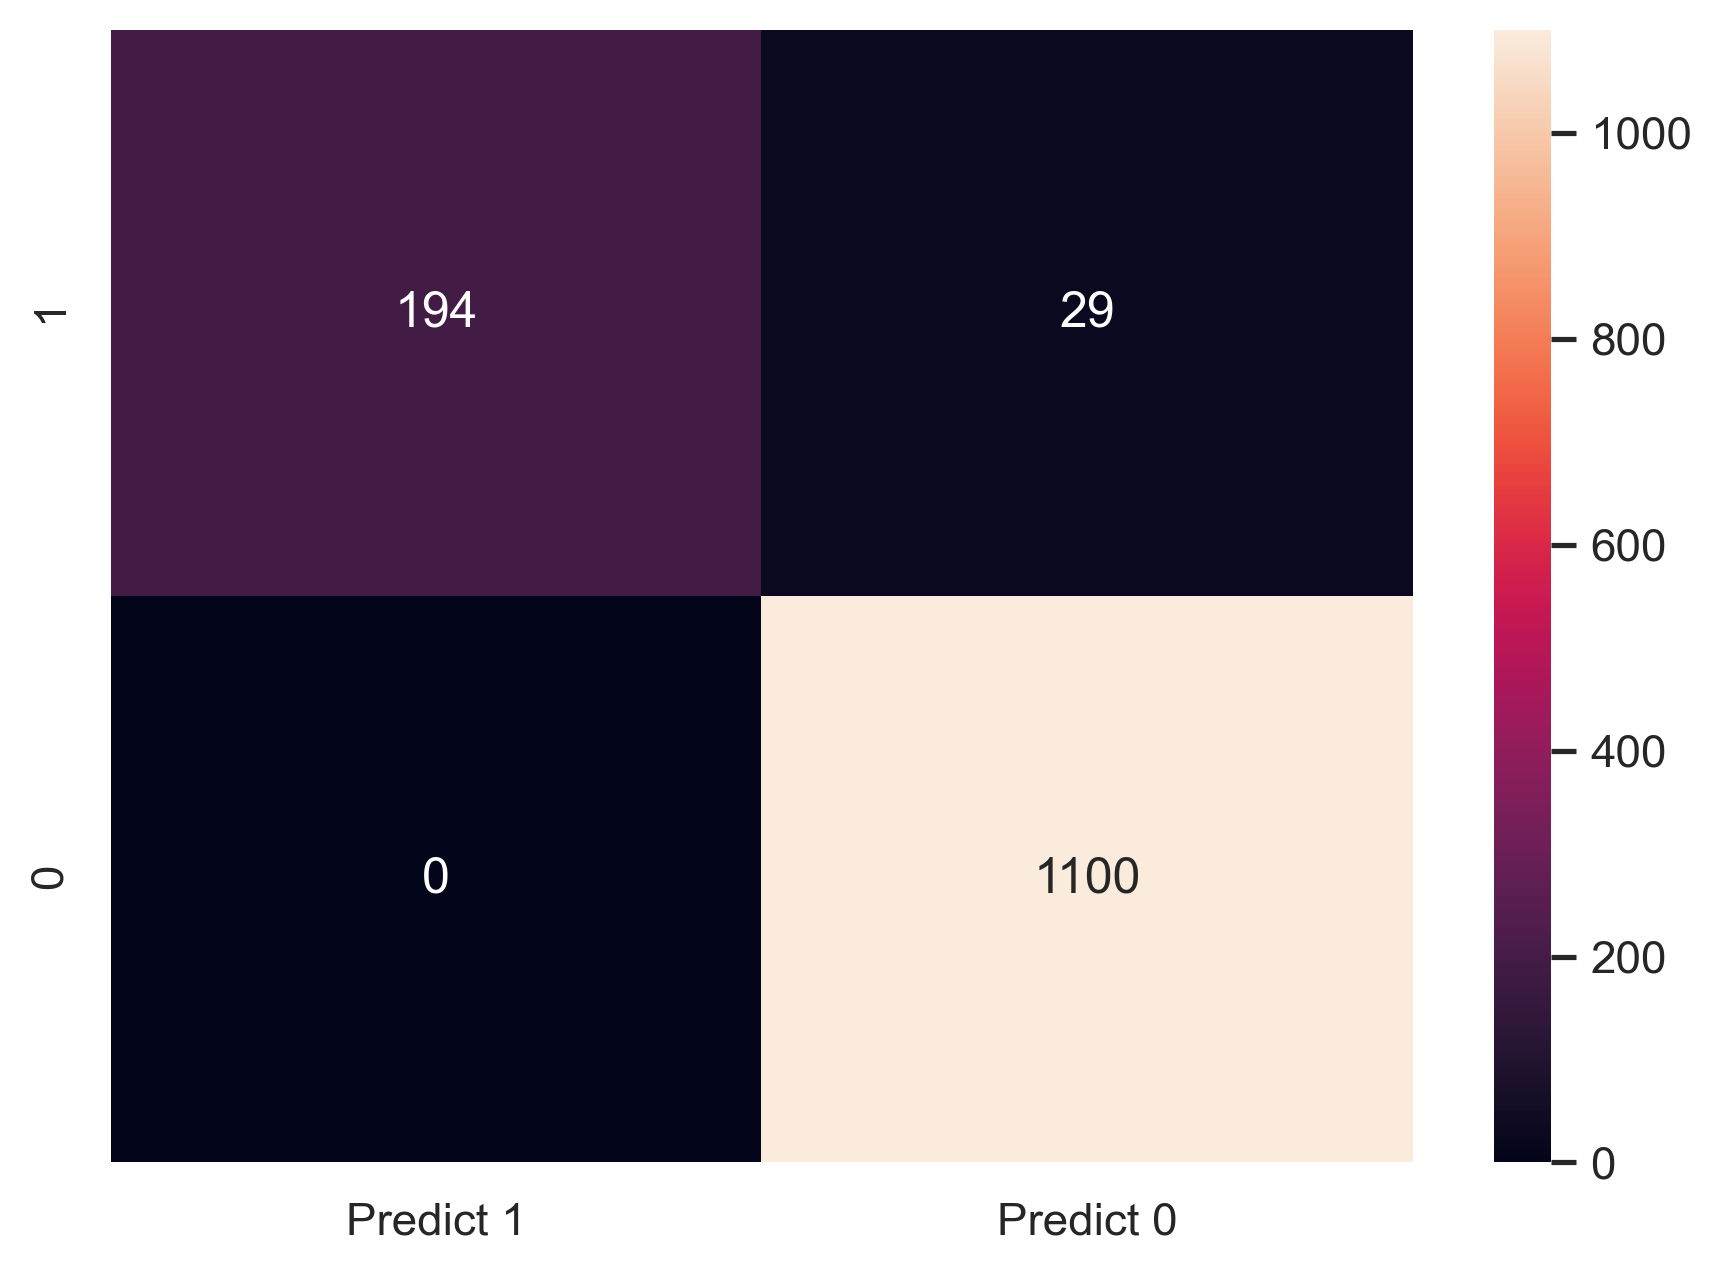

In [154]:
cm = metrics.confusion_matrix(y_test, y_pred_xgb, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## AUC of XGBoost

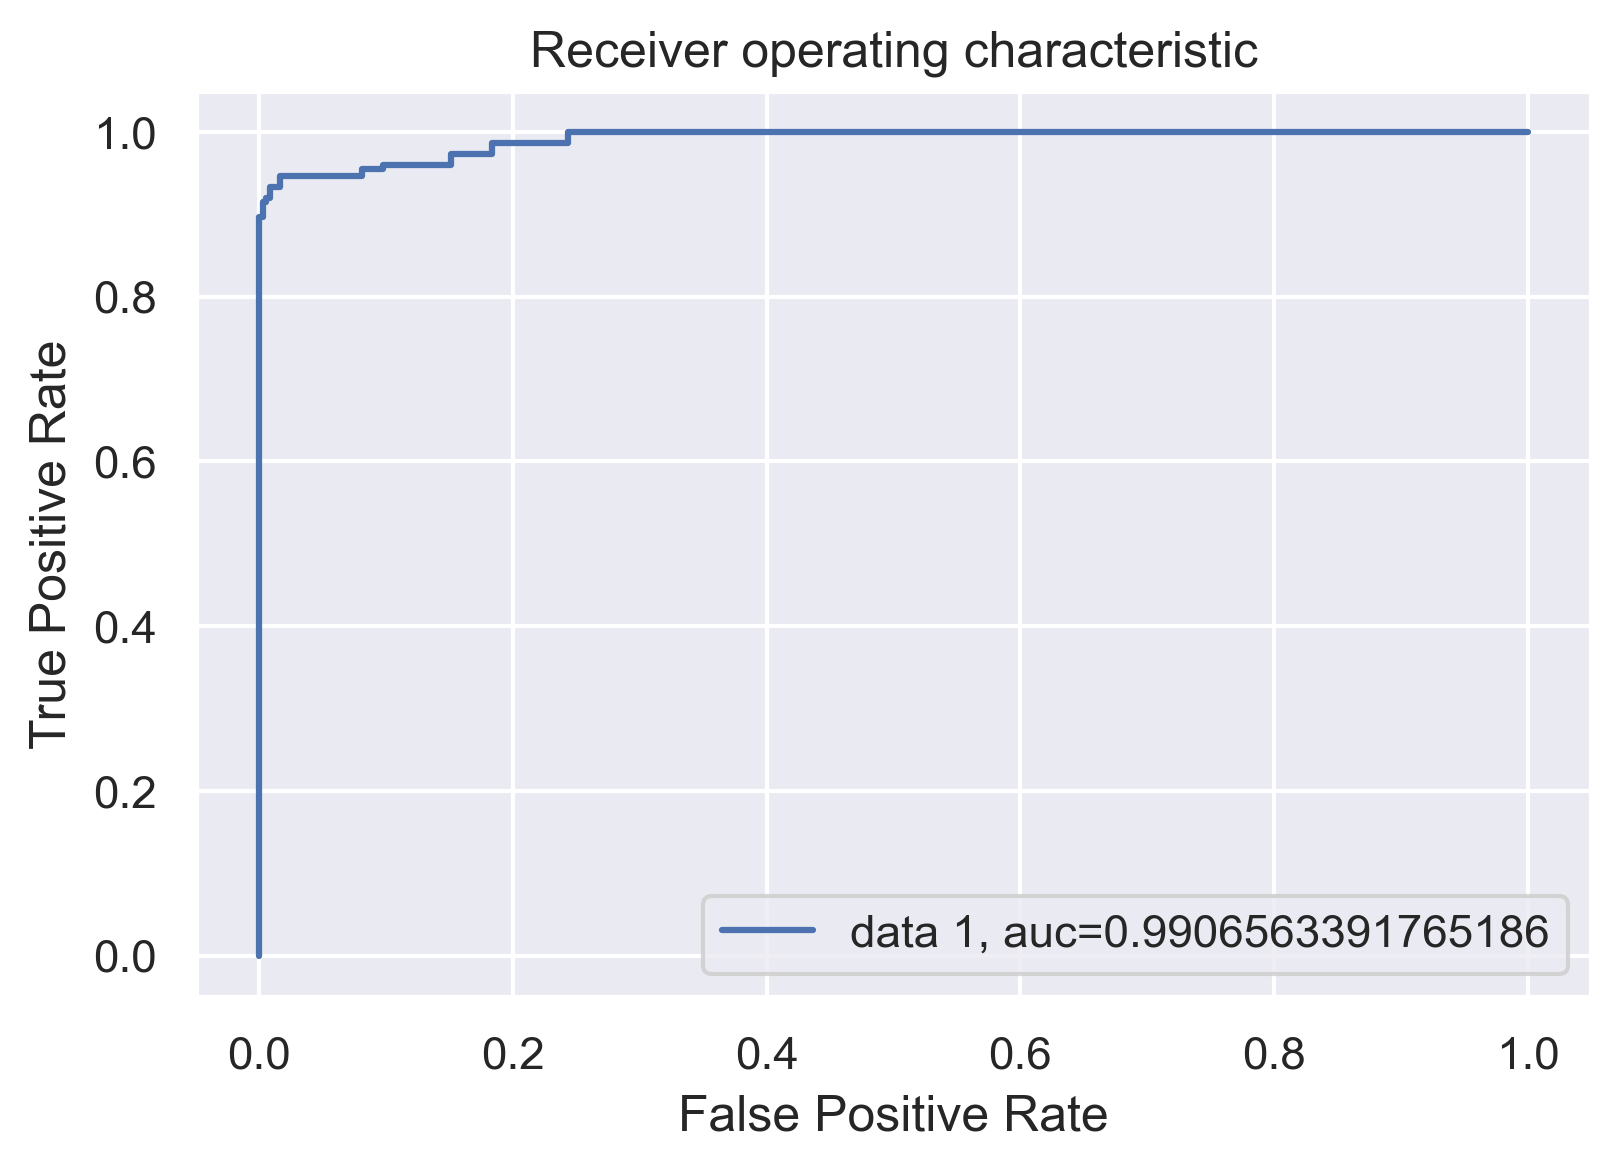

In [155]:
y_pred_proba = xgb.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Support Vector Machine (SVM)

In [156]:
from sklearn import svm
svm = svm.SVC(gamma=0.025, C=2, probability=True)

svm.fit(x_train, y_train)

y_pred_svm = svm.predict(x_test)

print("Test accuracy: ",svm.score(x_test, y_test))
print("Train accuracy: ",svm.score(x_train,y_train))

Test accuracy:  0.8314436885865457
Train accuracy:  0.8419177194687398


In [157]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1100
           1       0.00      0.00      0.00       223

    accuracy                           0.83      1323
   macro avg       0.42      0.50      0.45      1323
weighted avg       0.69      0.83      0.75      1323



## Confusion Matrix of SVM

<AxesSubplot:>

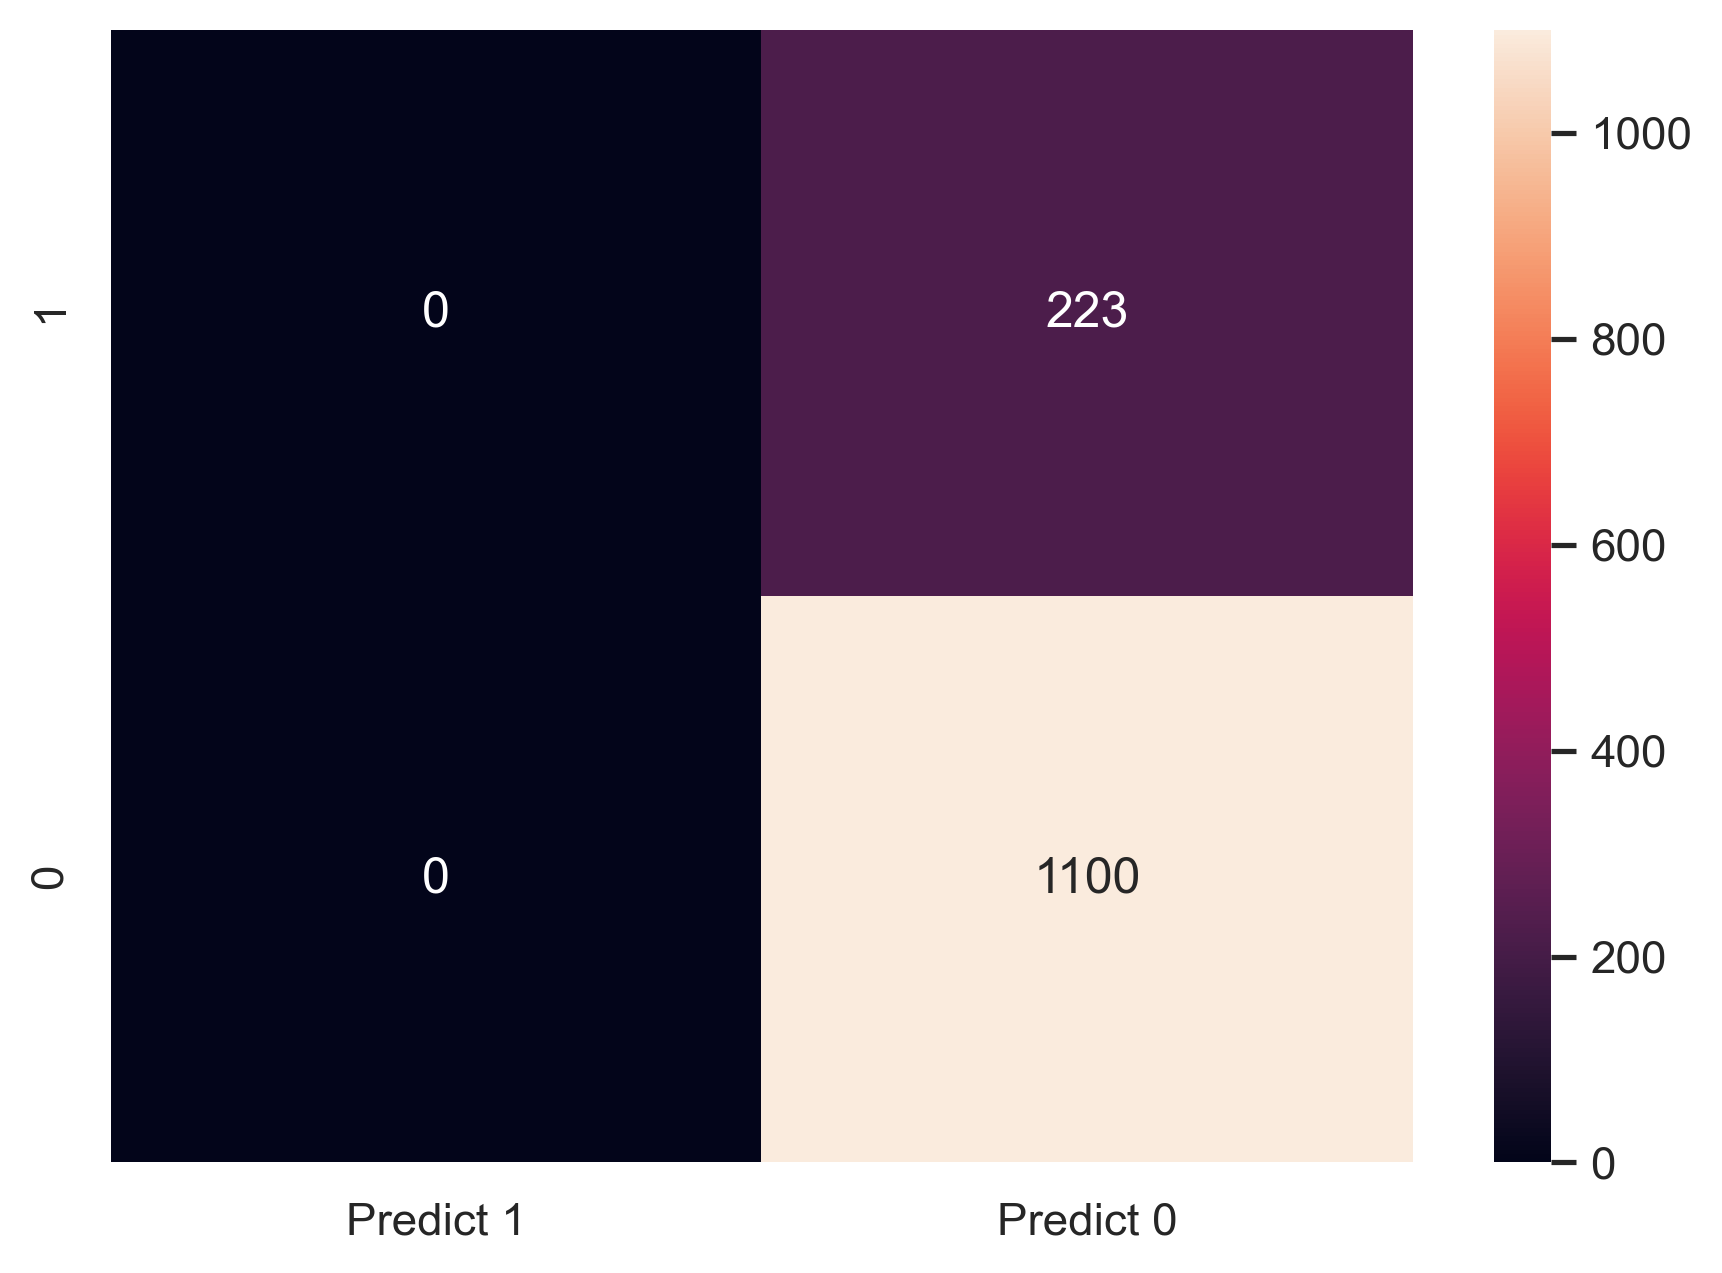

In [158]:
cm = metrics.confusion_matrix(y_test, y_pred_svm, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                         columns = [i for i in ["Predict 1", "Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

## AUC of SVM

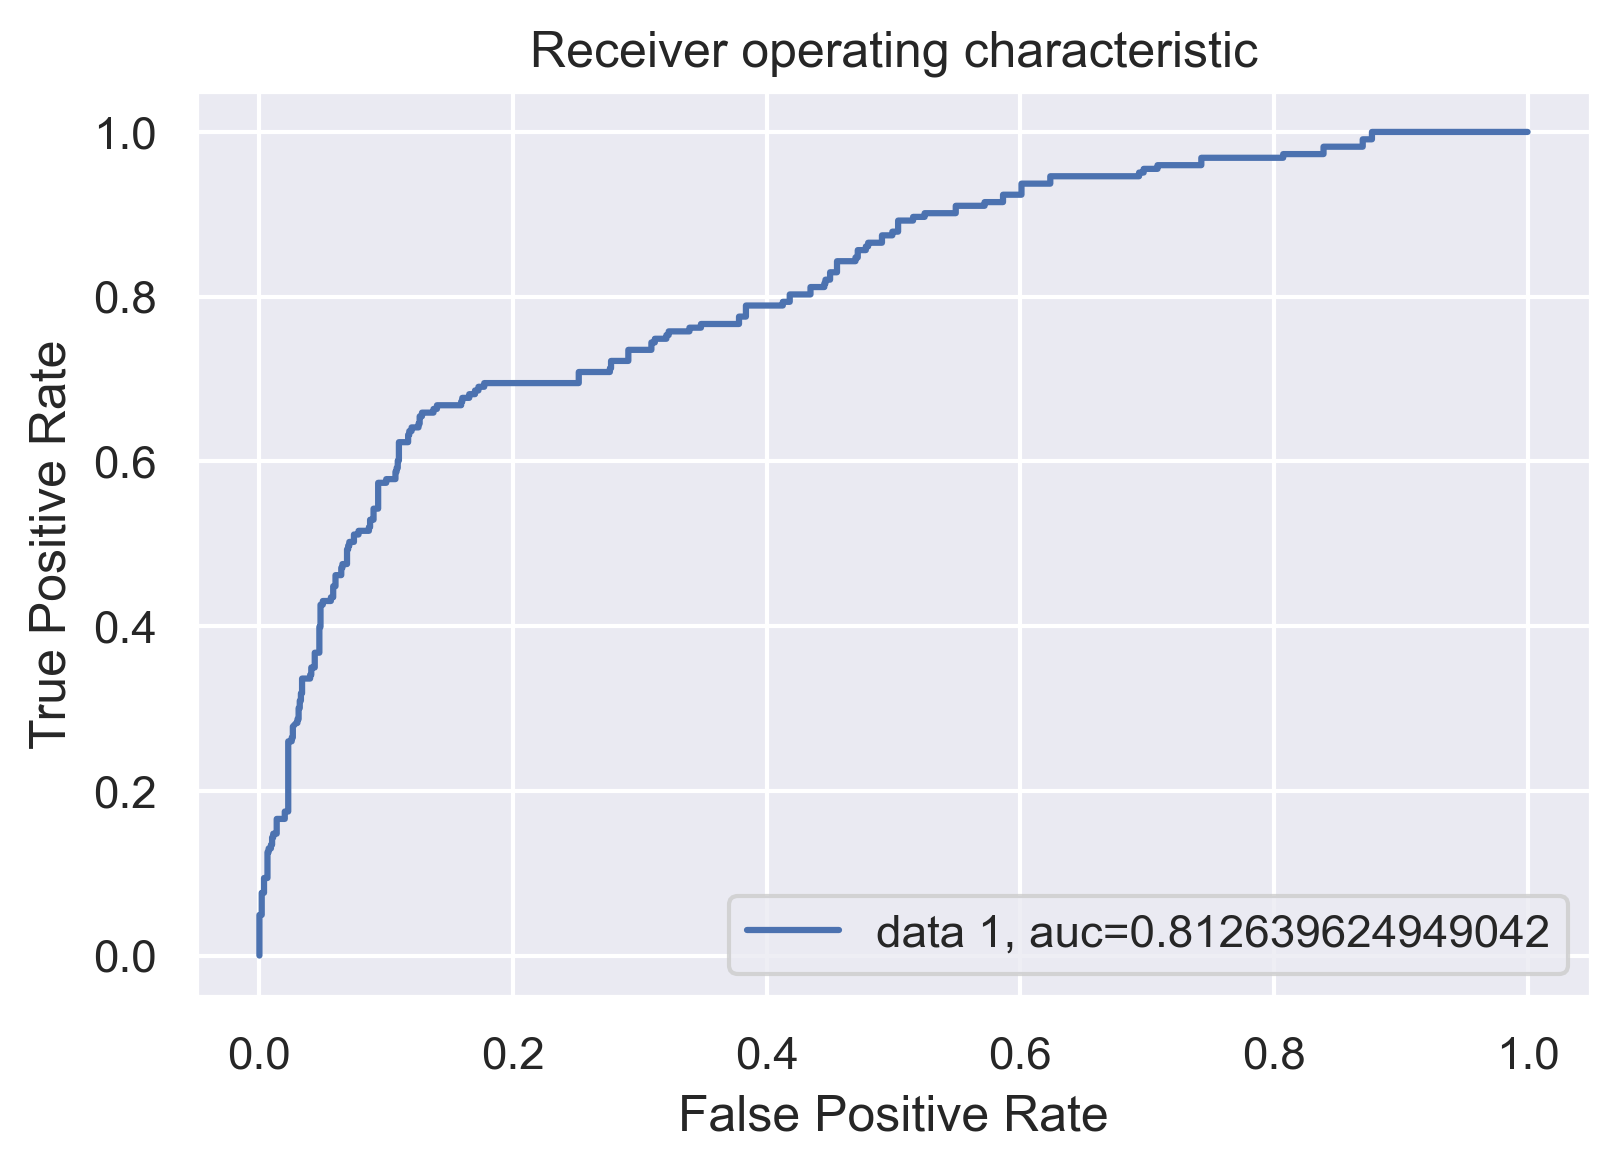

In [159]:
y_pred_proba = svm.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
fpr 
tpr

auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

### Random forest classifier model and Bagging model giving best AUC among all others model. Both are perfect model for this dataset.

## Lets compare Bagging and Random forest model AUC

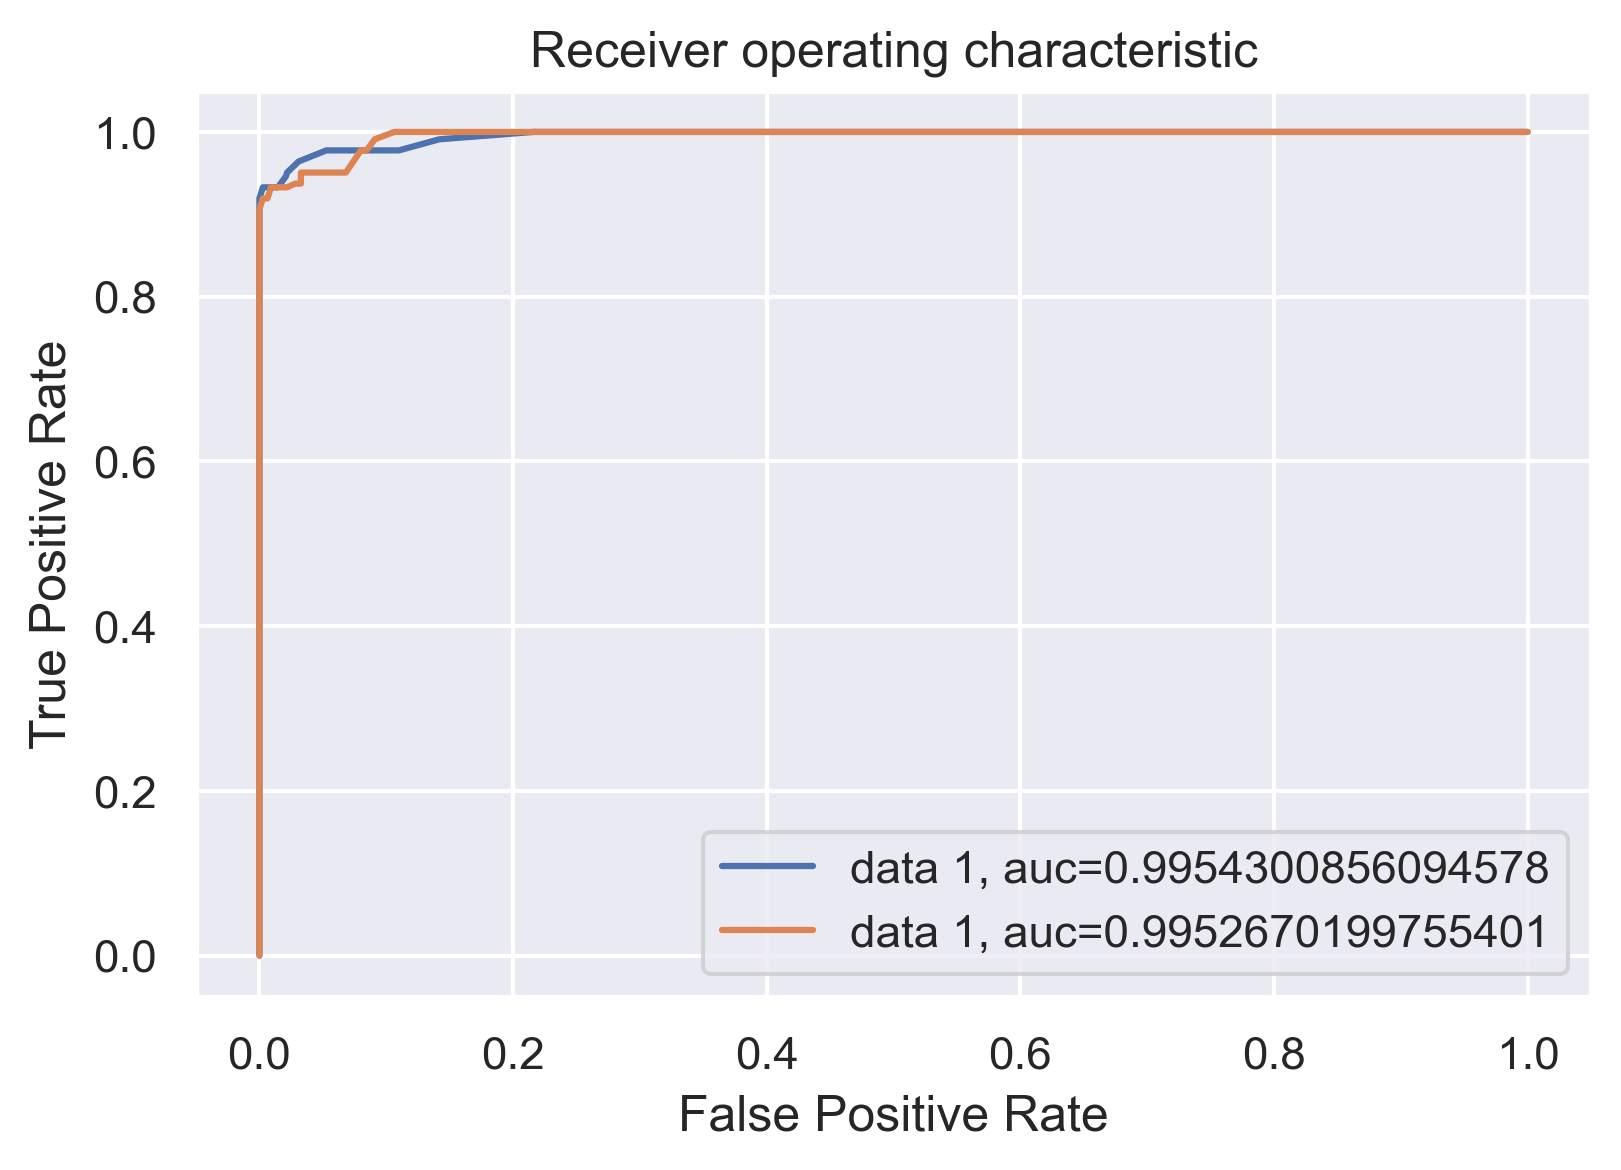

In [163]:
y_pred_proba1 = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba1)
fpr 
tpr

b_y_pred_proba2 = bgcl.predict_proba(x_test)[::,1]
b_fpr, b_tpr, _ = metrics.roc_curve(y_test, b_y_pred_proba2)

auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
auc1
auc2 = metrics.roc_auc_score(y_test, b_y_pred_proba2)
auc2

plt.plot(fpr,tpr,label="data 1, auc="+str(auc1))
plt.plot(b_fpr,b_tpr,label="data 1, auc="+str(auc2))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

# Features importance in making predictions by Random Forest Model

### Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

<AxesSubplot:>

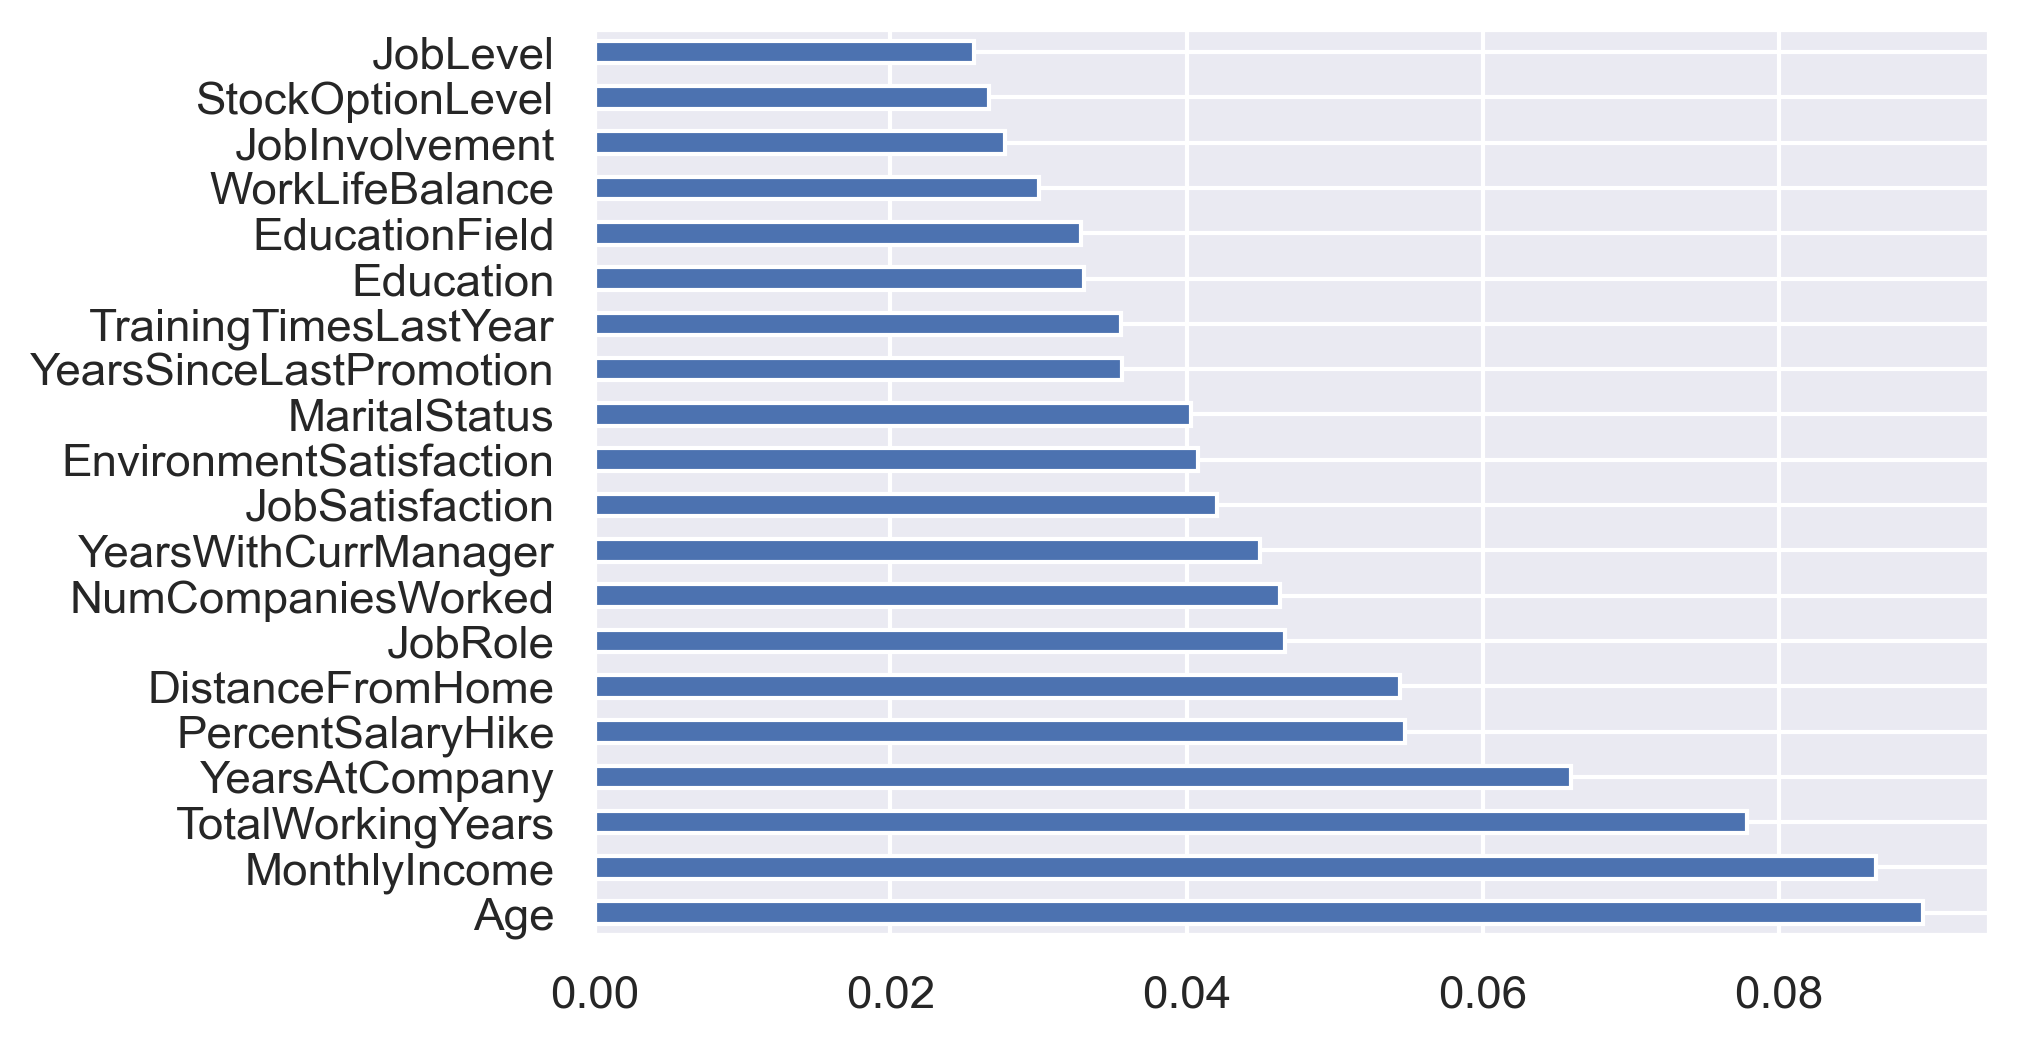

In [161]:
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

In [162]:
x.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

### Random Forest classifier giving more importance or weightage to Age followed by Monthly Income, Total Working Year, Years at Comapany, and Percentage Salary Hike.
### So we can conclude that Major Factors affecting the Attrition of a Comapny is Age, Monthly Income, and Years at Company.

### To curb Attrition rate, Company can increase Monthly Salary of their employees as this is a second major factor which is affecting Attrition rate.
### Although Age is 1st major factor affecting Attrition rate, Company can't do anything related to this factor but Company can especially increase Monthly Salary of particular Age group, age group with high attrition rate i.e. 20-40 age group.